Epoch 1/50
600/600 [==============================] - 4s 6ms/step - loss: 189.1825 - val_loss: 172.0997
Epoch 2/50
600/600 [==============================] - 3s 6ms/step - loss: 169.4930 - val_loss: 168.1420
Epoch 3/50
600/600 [==============================] - 3s 5ms/step - loss: 166.1502 - val_loss: 165.2405
Epoch 4/50
600/600 [==============================] - 3s 6ms/step - loss: 163.8618 - val_loss: 163.3896
Epoch 5/50
600/600 [==============================] - 4s 6ms/step - loss: 162.0770 - val_loss: 161.7472
Epoch 6/50
600/600 [==============================] - 4s 6ms/step - loss: 160.6180 - val_loss: 160.2102
Epoch 7/50
600/600 [==============================] - 4s 6ms/step - loss: 159.4308 - val_loss: 159.2343
Epoch 8/50
600/600 [==============================] - 4s 6ms/step - loss: 158.4788 - val_loss: 158.5536
Epoch 9/50
600/600 [==============================] - 4s 7ms/step - loss: 157.6996 - val_loss: 157.6522
Epoch 10/50
600/600 [==============================] - 4s 7ms/st

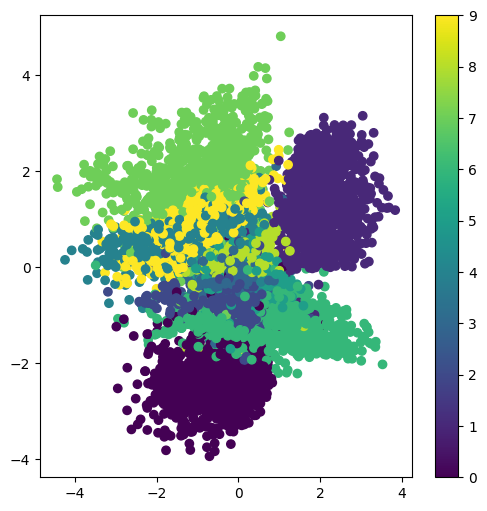

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense, Lambda
from keras.models import Model
from keras import backend as K
from keras.losses import binary_crossentropy
from keras.datasets import mnist

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# VAE parameters
original_dim = 784
intermediate_dim = 256
latent_dim = 2
batch_size = 100
epochs = 50

# Encoder
inputs = Input(shape=(original_dim,))
h = Dense(intermediate_dim, activation='relu')(inputs)
z_mean = Dense(latent_dim)(h)
z_log_var = Dense(latent_dim)(h)

def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

# Decoder
decoder_h = Dense(intermediate_dim, activation='relu')
decoder_mean = Dense(original_dim, activation='sigmoid')
h_decoded = decoder_h(z)
x_decoded_mean = decoder_mean(h_decoded)

# VAE model
vae = Model(inputs, x_decoded_mean)

# Loss
xent_loss = original_dim * binary_crossentropy(inputs, x_decoded_mean)
kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
vae_loss = K.mean(xent_loss + kl_loss)

vae.add_loss(vae_loss)
vae.compile(optimizer='rmsprop')

# Train the VAE
vae.fit(x_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, None))

# Encoder model for visualization
encoder = Model(inputs, z_mean)

# Encode the test dataset
x_test_encoded = encoder.predict(x_test, batch_size=batch_size)

# Visualization
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test)
plt.colorbar()
plt.show()


Epoch 1/50
600/600 [==============================] - 4s 6ms/step - loss: 192.3729 - val_loss: 172.8106
Epoch 2/50
600/600 [==============================] - 3s 5ms/step - loss: 170.1469 - val_loss: 167.9952
Epoch 3/50
600/600 [==============================] - 3s 5ms/step - loss: 165.9384 - val_loss: 164.3528
Epoch 4/50
600/600 [==============================] - 3s 5ms/step - loss: 162.9812 - val_loss: 161.7355
Epoch 5/50
600/600 [==============================] - 3s 6ms/step - loss: 161.0187 - val_loss: 160.0928
Epoch 6/50
600/600 [==============================] - 4s 6ms/step - loss: 159.6027 - val_loss: 158.6891
Epoch 7/50
600/600 [==============================] - 4s 6ms/step - loss: 158.5283 - val_loss: 157.7454
Epoch 8/50
600/600 [==============================] - 4s 6ms/step - loss: 157.6887 - val_loss: 157.2450
Epoch 9/50
600/600 [==============================] - 4s 6ms/step - loss: 156.9513 - val_loss: 156.5666
Epoch 10/50
600/600 [==============================] - 4s 6ms/st

1/1 [==============================] - 0s 31ms/step


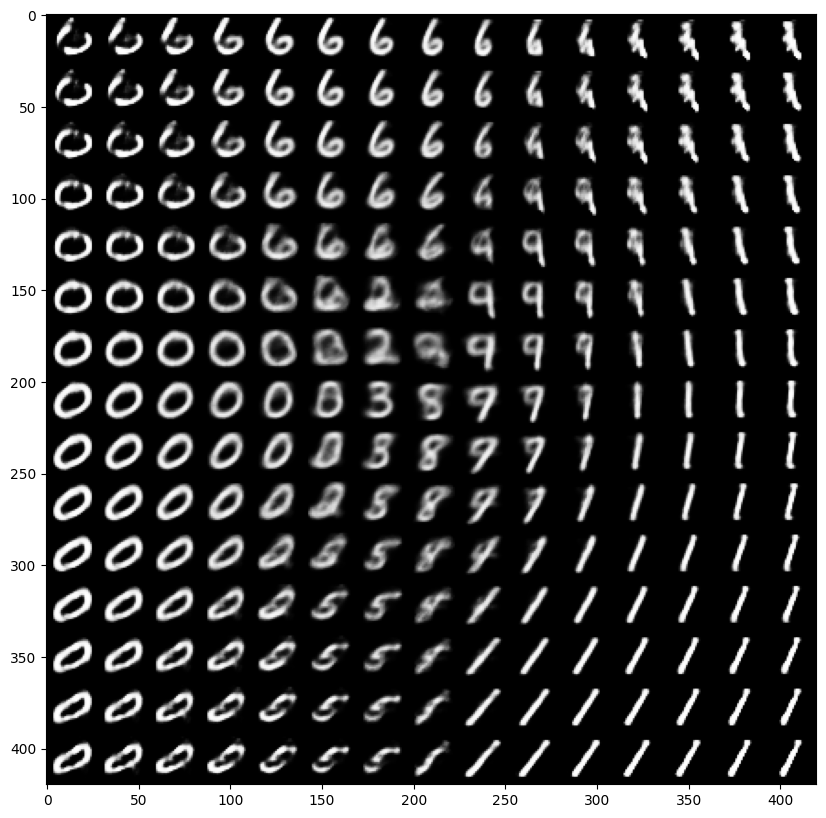

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense, Lambda
from keras.models import Model
from keras import backend as K
from keras.losses import binary_crossentropy
from keras.datasets import mnist

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# VAE parameters
original_dim = 784
intermediate_dim = 256
latent_dim = 2
batch_size = 100
epochs = 50

# Encoder
inputs = Input(shape=(original_dim,))
h = Dense(intermediate_dim, activation='relu')(inputs)
z_mean = Dense(latent_dim)(h)
z_log_var = Dense(latent_dim)(h)

def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

# Decoder
decoder_h = Dense(intermediate_dim, activation='relu')
decoder_mean = Dense(original_dim, activation='sigmoid')
h_decoded = decoder_h(z)
x_decoded_mean = decoder_mean(h_decoded)

# VAE model
vae = Model(inputs, x_decoded_mean)

# Loss
xent_loss = original_dim * binary_crossentropy(inputs, x_decoded_mean)
kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
vae_loss = K.mean(xent_loss + kl_loss)

vae.add_loss(vae_loss)
vae.compile(optimizer='rmsprop')

# Train the VAE
vae.fit(x_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, None))

# Decoder for generating new images
decoder_input = Input(shape=(latent_dim,))
_h_decoded = decoder_h(decoder_input)
_x_decoded_mean = decoder_mean(_h_decoded)
generator = Model(decoder_input, _x_decoded_mean)

# Generate new images
n = 15  # figure with 15x15 images
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
grid_x = np.linspace(-4, 4, n)
grid_y = np.linspace(-4, 4, n)

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = generator.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap='Greys_r')
plt.show()


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense, Lambda
from keras.models import Model
from keras import backend as K
from keras.losses import binary_crossentropy
from keras.datasets import mnist

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# VAE parameters
original_dim = 784
intermediate_dim = 512
latent_dim = 50
batch_size = 100
epochs = 100

# Encoder
inputs = Input(shape=(original_dim,))
h = Dense(intermediate_dim, activation='relu')(inputs)
z_mean = Dense(latent_dim)(h)
z_log_var = Dense(latent_dim)(h)

def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

# Decoder
decoder_h = Dense(intermediate_dim, activation='relu')
decoder_mean = Dense(original_dim, activation='sigmoid')
h_decoded = decoder_h(z)
x_decoded_mean = decoder_mean(h_decoded)

# VAE model
vae = Model(inputs, x_decoded_mean)

# Loss
xent_loss = original_dim * binary_crossentropy(inputs, x_decoded_mean)
kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
vae_loss = K.mean(xent_loss + kl_loss)

vae.add_loss(vae_loss)
vae.compile(optimizer='rmsprop')

# Train the VAE
vae.fit(x_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, None))

# Decoder for generating new images
decoder_input = Input(shape=(latent_dim,))
_h_decoded = decoder_h(decoder_input)
_x_decoded_mean = decoder_mean(_h_decoded)
generator = Model(decoder_input, _x_decoded_mean)


Epoch 1/100
600/600 [==============================] - 11s 18ms/step - loss: 153.7927 - val_loss: 129.8736
Epoch 2/100
600/600 [==============================] - 10s 17ms/step - loss: 123.5315 - val_loss: 116.6260
Epoch 3/100
600/600 [==============================] - 11s 19ms/step - loss: 116.0107 - val_loss: 114.5537
Epoch 4/100
600/600 [==============================] - 12s 19ms/step - loss: 112.5502 - val_loss: 111.2883
Epoch 5/100
600/600 [==============================] - 11s 19ms/step - loss: 110.5328 - val_loss: 109.3041
Epoch 6/100
600/600 [==============================] - 11s 18ms/step - loss: 109.3335 - val_loss: 107.6108
Epoch 7/100
600/600 [==============================] - 12s 20ms/step - loss: 108.3858 - val_loss: 107.3013
Epoch 8/100
600/600 [==============================] - 11s 18ms/step - loss: 107.7495 - val_loss: 106.7243
Epoch 9/100
600/600 [==============================] - 11s 18ms/step - loss: 107.2229 - val_loss: 107.7125
Epoch 10/100
600/600 [===============

Epoch 77/100
600/600 [==============================] - 12s 21ms/step - loss: 102.0334 - val_loss: 102.1989
Epoch 78/100
600/600 [==============================] - 12s 21ms/step - loss: 101.9936 - val_loss: 102.2733
Epoch 79/100
600/600 [==============================] - 13s 21ms/step - loss: 102.0073 - val_loss: 102.1405
Epoch 80/100
600/600 [==============================] - 13s 21ms/step - loss: 101.9438 - val_loss: 102.2122
Epoch 81/100
600/600 [==============================] - 12s 21ms/step - loss: 101.9717 - val_loss: 102.1342
Epoch 82/100
600/600 [==============================] - 13s 21ms/step - loss: 101.9434 - val_loss: 102.1234
Epoch 83/100
600/600 [==============================] - 14s 23ms/step - loss: 101.9233 - val_loss: 102.2894
Epoch 84/100
600/600 [==============================] - 15s 26ms/step - loss: 101.9118 - val_loss: 102.1450
Epoch 85/100
600/600 [==============================] - 17s 29ms/step - loss: 101.9098 - val_loss: 102.3645
Epoch 86/100
600/600 [======

4/4 [==============================] - 0s 3ms/step


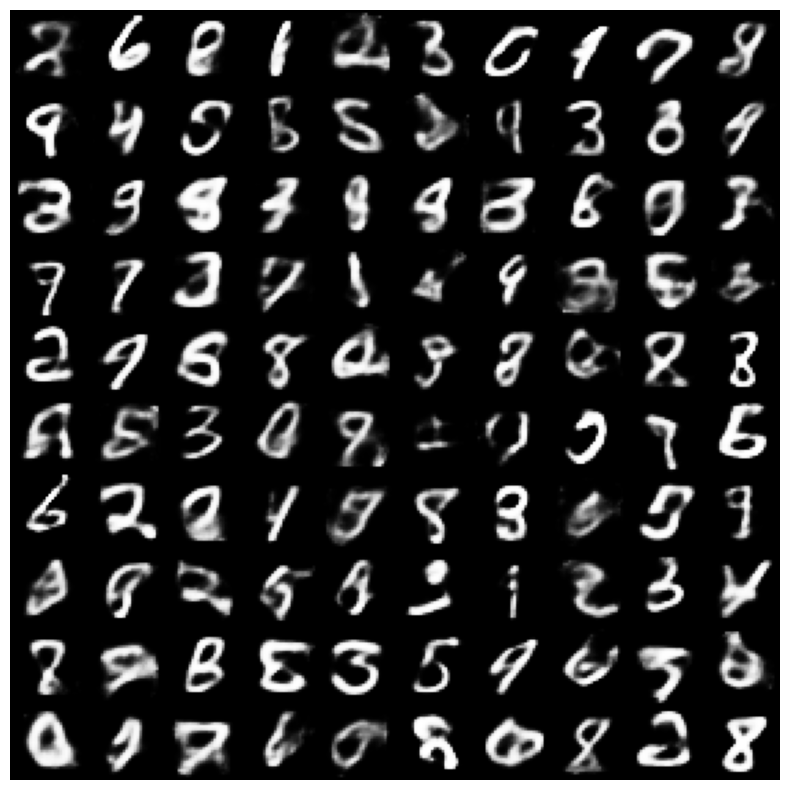

1/1 [==============================] - 0s 44ms/step


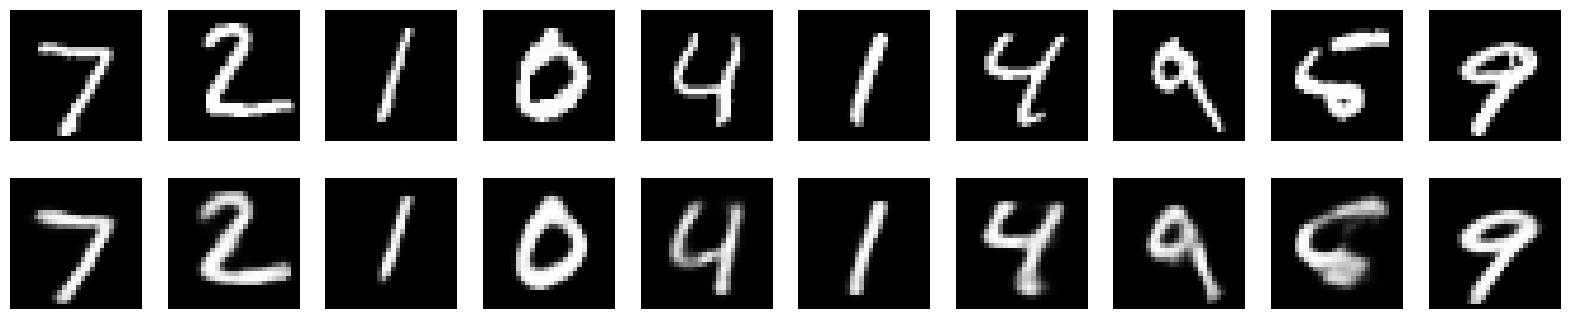

In [8]:
# Generate new images from the latent space
n = 10  # number of images to be generated
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))

# Sample random points in the latent space
z_sample = np.random.normal(size=(n * n, latent_dim))
x_decoded = generator.predict(z_sample)

for i in range(n):
    for j in range(n):
        digit = x_decoded[i * n + j].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap='Greys_r')
plt.axis('off')
plt.show()

# Visualize the original and reconstructed images
n = 10  # number of images to be visualized
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.axis('off')

    # Reconstructed images
    x_reconstructed = vae.predict(np.array([x_test[i]]))
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_reconstructed[0].reshape(28, 28), cmap='gray')
    ax.axis('off')
plt.show()

# If latent_dim is 2, visualize the 2D latent space
if latent_dim == 2:
    encoder = Model(inputs, z_mean)
    x_test_encoded = encoder.predict(x_test, batch_size=batch_size)
    plt.figure(figsize=(8, 6))
    plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test, cmap='viridis')
    plt.colorbar()
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.show()

    

In [1]:
import numpy as np
from keras.layers import Input, Dense, Lambda, Concatenate
from keras.models import Model
from keras import backend as K
from keras.losses import binary_crossentropy
from keras.datasets import mnist

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Convert labels to one-hot encoding
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]

# VAE parameters
original_dim = 784
label_dim = 10
intermediate_dim = 512
latent_dim = 50
batch_size = 100
epochs = 50

# Encoder
inputs = Input(shape=(original_dim,))
labels = Input(shape=(label_dim,))
encoder_input = Concatenate()([inputs, labels])
h = Dense(intermediate_dim, activation='relu')(encoder_input)
z_mean = Dense(latent_dim)(h)
z_log_var = Dense(latent_dim)(h)

def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

# Decoder
decoder_h = Dense(intermediate_dim, activation='relu')
decoder_mean = Dense(original_dim, activation='sigmoid')
h_decoded = decoder_h(Concatenate()([z, labels]))
x_decoded_mean = decoder_mean(h_decoded)

# VAE model
vae = Model([inputs, labels], x_decoded_mean)

# Loss
xent_loss = original_dim * binary_crossentropy(inputs, x_decoded_mean)
kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
vae_loss = K.mean(xent_loss + kl_loss)

vae.add_loss(vae_loss)
vae.compile(optimizer='rmsprop')

# Train the VAE
vae.fit([x_train, y_train], epochs=epochs, batch_size=batch_size, validation_data=([x_test, y_test], None))

# Decoder for generating new images conditioned on labels
decoder_input = Input(shape=(latent_dim,))
decoder_labels = Input(shape=(label_dim,))
_h_decoded = decoder_h(Concatenate()([decoder_input, decoder_labels]))
_x_decoded_mean = decoder_mean(_h_decoded)
generator = Model([decoder_input, decoder_labels], _x_decoded_mean)


Epoch 1/50
600/600 [==============================] - 11s 14ms/step - loss: 151.6028 - val_loss: 126.5148
Epoch 2/50
600/600 [==============================] - 9s 15ms/step - loss: 121.1716 - val_loss: 114.6728
Epoch 3/50
600/600 [==============================] - 9s 15ms/step - loss: 113.3423 - val_loss: 110.1685
Epoch 4/50
600/600 [==============================] - 10s 16ms/step - loss: 109.5729 - val_loss: 107.7195
Epoch 5/50
600/600 [==============================] - 10s 17ms/step - loss: 107.3920 - val_loss: 105.1274
Epoch 6/50
600/600 [==============================] - 10s 17ms/step - loss: 105.9108 - val_loss: 105.9082
Epoch 7/50
600/600 [==============================] - 11s 17ms/step - loss: 104.7961 - val_loss: 103.8211
Epoch 8/50
600/600 [==============================] - 11s 18ms/step - loss: 104.0436 - val_loss: 103.6434
Epoch 9/50
600/600 [==============================] - 11s 19ms/step - loss: 103.4079 - val_loss: 103.8426
Epoch 10/50
600/600 [===========================

1/1 [==============================] - 0s 188ms/step


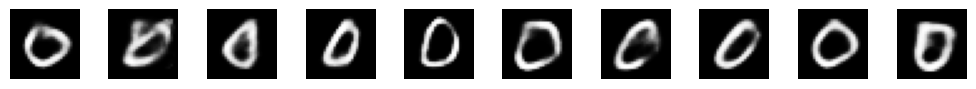

1/1 [==============================] - 0s 20ms/step


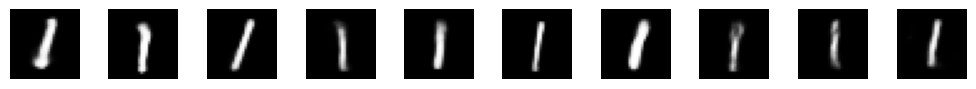

1/1 [==============================] - 0s 21ms/step


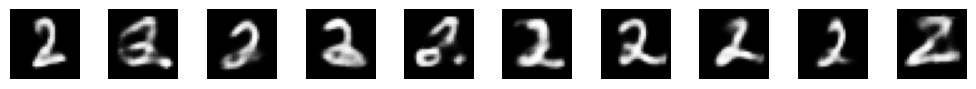

In [2]:
import matplotlib.pyplot as plt

def generate_and_plot_images(generator, label, num_samples=10):
    """Generate images conditioned on the label and plot them."""
    latent_samples = np.random.normal(size=(num_samples, latent_dim))
    labels = np.eye(10)[np.full(num_samples, label)]
    
    generated_images = generator.predict([latent_samples, labels])
    generated_images = generated_images.reshape(num_samples, 28, 28)
    
    plt.figure(figsize=(10, 1))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(generated_images[i], cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Generate and plot images conditioned on specific labels (e.g., 0, 1, 2)
for label in range(3):
    generate_and_plot_images(generator, label)


In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Conv2D, Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Define the encoder
def encoder(input_shape):
    input_img = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = Flatten()(x)
    z_mean = Dense(128)(x)
    z_log_var = Dense(128)(x)
    return Model(input_img, [z_mean, z_log_var])

# Define the decoder
def decoder(latent_dim, input_shape):
    decoder_input = Input(shape=(latent_dim,))
    x = Dense(input_shape[0] * input_shape[1] * input_shape[2])(decoder_input)
    x = Reshape(input_shape)(x)
    x = Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(x)
    decoded = Conv2DTranspose(input_shape[2], (3, 3), activation='sigmoid', padding='same')(x)
    return Model(decoder_input, decoded)

# Define the discriminator
def discriminator(input_shape):
    input_img = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = Flatten()(x)
    validity = Dense(1, activation='sigmoid')(x)
    return Model(input_img, validity)

# Define the VAE-GAN
def vaegan(input_shape, encoder, decoder, discriminator):
    z_dim = 128
    
    # Encoder
    img = Input(shape=input_shape)
    z_mean, z_log_var = encoder(img)
    z = tf.random.normal(shape=(z_dim,), mean=z_mean, stddev=tf.exp(0.5 * z_log_var))
    
    # Decoder
    reconstructed_img = decoder(z)
    
    # Discriminator
    validity = discriminator(reconstructed_img)
    
    return Model(img, [reconstructed_img, validity])

# Hyperparameters
input_shape = (28, 28, 1)
latent_dim = 128
optimizer = Adam(0.0002, 0.5)

# Compile the models
enc = encoder(input_shape)
dec = decoder(latent_dim, input_shape)
disc = discriminator(input_shape)
disc.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
vae_gan = vaegan(input_shape, enc, dec, disc)
vae_gan.compile(loss=['mse', 'binary_crossentropy'], optimizer=optimizer)

# Training loop, data loading, and model saving can be added as needed.


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Conv2D, Conv2DTranspose, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy

# Load MNIST dataset
(x_train, _), (_, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_train = np.expand_dims(x_train, axis=-1)

# Define the encoder
def encoder(input_shape):
    input_img = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = Flatten()(x)
    z_mean = Dense(128)(x)
    z_log_var = Dense(128)(x)
    return Model(input_img, [z_mean, z_log_var])

# Define the decoder
def decoder(latent_dim, input_shape):
    decoder_input = Input(shape=(latent_dim,))
    x = Dense(input_shape[0] * input_shape[1] * input_shape[2])(decoder_input)
    x = Reshape(input_shape)(x)
    x = Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(x)
    decoded = Conv2DTranspose(input_shape[2], (3, 3), activation='sigmoid', padding='same')(x)
    return Model(decoder_input, decoded)

# Define the discriminator
def discriminator(input_shape):
    input_img = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = Flatten()(x)
    validity = Dense(1, activation='sigmoid')(x)
    return Model(input_img, validity)

# Define the VAE-GAN
def vaegan(input_shape, encoder, decoder, discriminator):
    z_dim = 128
    
    # Encoder
    img = Input(shape=input_shape)
    z_mean, z_log_var = encoder(img)
    z = Lambda(lambda args: args[0] + tf.exp(0.5 * args[1]) * tf.random.normal(shape=(z_dim,)))([z_mean, z_log_var])
    
    # Decoder
    reconstructed_img = decoder(z)
    
    # Discriminator
    validity = discriminator(reconstructed_img)
    
    return Model(img, [reconstructed_img, validity])

# Hyperparameters
input_shape = (28, 28, 1)
latent_dim = 128
optimizer = Adam(0.0002, 0.5)

# Compile the models
enc = encoder(input_shape)
dec = decoder(latent_dim, input_shape)
disc = discriminator(input_shape)
disc.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
vae_gan = vaegan(input_shape, enc, dec, disc)
vae_gan.compile(loss=['mse', 'binary_crossentropy'], optimizer=optimizer)

# Training loop
epochs = 10000
batch_size = 64
half_batch = batch_size // 2

for epoch in range(epochs):
    # Train discriminator
    idx = np.random.randint(0, x_train.shape[0], half_batch)
    imgs = x_train[idx]
    reconstructed_imgs, _ = vae_gan.predict(imgs)
    d_loss_real = disc.train_on_batch(imgs, np.ones((half_batch, 1)))
    d_loss_fake = disc.train_on_batch(reconstructed_imgs, np.zeros((half_batch, 1)))
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # Train VAE-GAN
    g_loss = vae_gan.train_on_batch(imgs, [imgs, np.ones((half_batch, 1))])

    # Print the progress
    print(f"{epoch}/{epochs} [D loss: {d_loss[0]} | D accuracy: {100 * d_loss[1]}] [G loss: {g_loss[0]}]")

print("Training complete!")


1/1 [==============================] - 18s 18s/step


KeyError: in user code:

    File "C:\Users\ramch\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\ramch\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\ramch\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\ramch\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1084, in train_step
        self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "C:\Users\ramch\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\optimizers\optimizer.py", line 544, in minimize
        self.apply_gradients(grads_and_vars)
    File "C:\Users\ramch\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\optimizers\optimizer.py", line 1230, in apply_gradients
        return super().apply_gradients(grads_and_vars, name=name)
    File "C:\Users\ramch\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\optimizers\optimizer.py", line 652, in apply_gradients
        iteration = self._internal_apply_gradients(grads_and_vars)
    File "C:\Users\ramch\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\optimizers\optimizer.py", line 1260, in _internal_apply_gradients
        return tf.__internal__.distribute.interim.maybe_merge_call(
    File "C:\Users\ramch\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\optimizers\optimizer.py", line 1352, in _distributed_apply_gradients_fn
        distribution.extended.update(
    File "C:\Users\ramch\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\optimizers\optimizer.py", line 1349, in apply_grad_to_update_var  **
        return self._update_step(grad, var)
    File "C:\Users\ramch\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\optimizers\optimizer.py", line 233, in _update_step
        raise KeyError(

    KeyError: 'The optimizer cannot recognize variable conv2d_2/kernel:0. This usually means you are trying to call the optimizer to update different parts of the model separately. Please call `optimizer.build(variables)` with the full list of trainable variables before the training loop or use legacy optimizer `tf.keras.optimizers.legacy.Adam.'


In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Conv2D, Conv2DTranspose, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.losses import binary_crossentropy

# Load MNIST dataset
(x_train, _), (_, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_train = np.expand_dims(x_train, axis=-1)

latent_dim = 100

# Encoder
def build_encoder():
    encoder_input = Input(shape=(28, 28, 1))
    x = Flatten()(encoder_input)
    x = Dense(512, activation='relu')(x)
    z_mean = Dense(latent_dim)(x)
    z_log_var = Dense(latent_dim)(x)
    return Model(encoder_input, [z_mean, z_log_var])

# Decoder (also acts as GAN's generator)
def build_decoder():
    decoder_input = Input(shape=(latent_dim,))
    x = Dense(512, activation='relu')(decoder_input)
    x = Dense(28 * 28, activation='sigmoid')(x)
    decoder_output = Reshape((28, 28, 1))(x)
    return Model(decoder_input, decoder_output)

# GAN's discriminator
def build_discriminator():
    discriminator_input = Input(shape=(28, 28, 1))
    x = Flatten()(discriminator_input)
    x = Dense(512, activation='relu')(x)
    discriminator_output = Dense(1, activation='sigmoid')(x)
    return Model(discriminator_input, discriminator_output)

# Reparameterization trick
def sampling(args):
    z_mean, z_log_var = args
    batch = tf.shape(z_mean)[0]
    dim = tf.shape(z_mean)[1]
    epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

encoder = build_encoder()
decoder = build_decoder()
discriminator = build_discriminator()

# VAE model
z_mean, z_log_var = encoder.output
z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])
reconstructed_img = decoder(z)
vae = Model(encoder.input, reconstructed_img)

# VAE loss
reconstruction_loss = binary_crossentropy(Flatten()(encoder.input), Flatten()(reconstructed_img))
reconstruction_loss *= 28 * 28
kl_loss = 1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
kl_loss = tf.reduce_sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = tf.reduce_mean(reconstruction_loss + kl_loss)

# Compile VAE
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')

# Compile discriminator
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# GAN combined model
z_gen = Input(shape=(latent_dim,))
img_gen = decoder(z_gen)
discriminator.trainable = False
validity = discriminator(img_gen)
combined = Model(z_gen, validity)
combined.compile(loss='binary_crossentropy', optimizer='adam')

# Train VAE-GAN
epochs = 10000
batch_size = 64
half_batch = batch_size // 2

for epoch in range(epochs):
    # Train discriminator
    idx = np.random.randint(0, x_train.shape[0], half_batch)
    imgs = x_train[idx]
    noise = np.random.normal(0, 1, (half_batch, latent_dim))
    gen_imgs = decoder.predict(noise)
    d_loss_real = discriminator.train_on_batch(imgs, np.ones((half_batch, 1)))
    d_loss_fake = discriminator.train_on_batch(gen_imgs, np.zeros((half_batch, 1)))
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # Train generator
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    valid_y = np.array([1] * batch_size)
    g_loss = combined.train_on_batch(noise, valid_y)

    # Train VAE
    vae_loss = vae.train_on_batch(imgs, imgs)

    print(f"{epoch}/{epochs} [D loss: {d_loss[0]} | D accuracy: {100 * d_loss[1]}] [G loss: {g_loss}] [VAE loss: {vae_loss}]")

print("Training complete!")


1/1 [==============================] - 4s 4s/step
0/10000 [D loss: 2.2649849951267242 | D accuracy: 43.75] [G loss: 0.6232225298881531] [VAE loss: 565.075927734375]
1/1 [==============================] - 0s 19ms/step
1/10000 [D loss: 0.21801504492759705 | D accuracy: 100.0] [G loss: 3.660834312438965] [VAE loss: 519.1002807617188]
1/1 [==============================] - 0s 19ms/step
2/10000 [D loss: 0.14152585063129663 | D accuracy: 100.0] [G loss: 5.463266372680664] [VAE loss: 482.6943359375]
1/1 [==============================] - 0s 16ms/step
3/10000 [D loss: 0.1640644147992134 | D accuracy: 100.0] [G loss: 5.844693183898926] [VAE loss: 444.9505920410156]
1/1 [==============================] - 0s 17ms/step
4/10000 [D loss: 0.11974665382876992 | D accuracy: 100.0] [G loss: 5.487644195556641] [VAE loss: 406.226318359375]
1/1 [==============================] - 0s 32ms/step
5/10000 [D loss: 0.07521762698888779 | D accuracy: 100.0] [G loss: 4.555873394012451] [VAE loss: 382.5148620605469]


1/1 [==============================] - 0s 31ms/step
48/10000 [D loss: 0.349754273891449 | D accuracy: 93.75] [G loss: 1.3505678176879883] [VAE loss: 238.2134246826172]
1/1 [==============================] - 0s 13ms/step
49/10000 [D loss: 0.40248359739780426 | D accuracy: 92.1875] [G loss: 1.348100185394287] [VAE loss: 236.13133239746094]
1/1 [==============================] - 0s 22ms/step
50/10000 [D loss: 0.4045761674642563 | D accuracy: 87.5] [G loss: 1.3122098445892334] [VAE loss: 243.83749389648438]
1/1 [==============================] - 0s 39ms/step
51/10000 [D loss: 0.3619762361049652 | D accuracy: 95.3125] [G loss: 1.4295402765274048] [VAE loss: 244.8099365234375]
1/1 [==============================] - 0s 31ms/step
52/10000 [D loss: 0.3921269625425339 | D accuracy: 90.625] [G loss: 1.404863715171814] [VAE loss: 245.97642517089844]
1/1 [==============================] - 0s 16ms/step
53/10000 [D loss: 0.42578302323818207 | D accuracy: 87.5] [G loss: 1.3392672538757324] [VAE loss: 

1/1 [==============================] - 0s 16ms/step
96/10000 [D loss: 0.23380132019519806 | D accuracy: 90.625] [G loss: 2.3304312229156494] [VAE loss: 272.5596923828125]
1/1 [==============================] - 0s 31ms/step
97/10000 [D loss: 0.26216381788253784 | D accuracy: 89.0625] [G loss: 2.3783326148986816] [VAE loss: 266.63714599609375]
1/1 [==============================] - 0s 16ms/step
98/10000 [D loss: 0.2716166228055954 | D accuracy: 90.625] [G loss: 2.170654296875] [VAE loss: 259.7896728515625]
1/1 [==============================] - 0s 36ms/step
99/10000 [D loss: 0.2748320698738098 | D accuracy: 96.875] [G loss: 2.1490390300750732] [VAE loss: 273.2079162597656]
1/1 [==============================] - 0s 31ms/step
100/10000 [D loss: 0.36007778346538544 | D accuracy: 84.375] [G loss: 2.489065170288086] [VAE loss: 265.44097900390625]
1/1 [==============================] - 0s 33ms/step
101/10000 [D loss: 0.34728197753429413 | D accuracy: 89.0625] [G loss: 2.622535467147827] [VAE l

1/1 [==============================] - 0s 16ms/step
144/10000 [D loss: 0.3115435093641281 | D accuracy: 82.8125] [G loss: 3.0789361000061035] [VAE loss: 225.54171752929688]
1/1 [==============================] - 0s 31ms/step
145/10000 [D loss: 0.2817106246948242 | D accuracy: 89.0625] [G loss: 3.2513699531555176] [VAE loss: 255.0337677001953]
1/1 [==============================] - 0s 31ms/step
146/10000 [D loss: 0.16784021258354187 | D accuracy: 96.875] [G loss: 2.8732738494873047] [VAE loss: 254.47584533691406]
1/1 [==============================] - 0s 31ms/step
147/10000 [D loss: 0.4183414876461029 | D accuracy: 85.9375] [G loss: 2.835031509399414] [VAE loss: 228.16854858398438]
1/1 [==============================] - 0s 23ms/step
148/10000 [D loss: 0.270927831530571 | D accuracy: 87.5] [G loss: 3.4100186824798584] [VAE loss: 235.13720703125]
1/1 [==============================] - 0s 41ms/step
149/10000 [D loss: 0.2773011364042759 | D accuracy: 90.625] [G loss: 3.4434714317321777] [VA

1/1 [==============================] - 0s 31ms/step
192/10000 [D loss: 0.33449479937553406 | D accuracy: 84.375] [G loss: 2.87039852142334] [VAE loss: 225.14073181152344]
1/1 [==============================] - 0s 17ms/step
193/10000 [D loss: 0.2724093943834305 | D accuracy: 89.0625] [G loss: 2.7549264430999756] [VAE loss: 214.86024475097656]
1/1 [==============================] - 0s 32ms/step
194/10000 [D loss: 0.36768878996372223 | D accuracy: 81.25] [G loss: 2.611706256866455] [VAE loss: 225.69601440429688]
1/1 [==============================] - 0s 33ms/step
195/10000 [D loss: 0.5618997514247894 | D accuracy: 78.125] [G loss: 2.247246742248535] [VAE loss: 224.70230102539062]
1/1 [==============================] - 0s 32ms/step
196/10000 [D loss: 0.36814629286527634 | D accuracy: 85.9375] [G loss: 2.542174816131592] [VAE loss: 229.6338348388672]
1/1 [==============================] - 0s 34ms/step
197/10000 [D loss: 0.31697599589824677 | D accuracy: 90.625] [G loss: 2.4959168434143066] 

1/1 [==============================] - 0s 38ms/step
240/10000 [D loss: 0.39523670077323914 | D accuracy: 85.9375] [G loss: 2.7873218059539795] [VAE loss: 238.6136474609375]
1/1 [==============================] - 0s 28ms/step
241/10000 [D loss: 0.3653657138347626 | D accuracy: 79.6875] [G loss: 2.4398880004882812] [VAE loss: 211.71109008789062]
1/1 [==============================] - 0s 31ms/step
242/10000 [D loss: 0.367960587143898 | D accuracy: 84.375] [G loss: 2.2401211261749268] [VAE loss: 201.811767578125]
1/1 [==============================] - 0s 32ms/step
243/10000 [D loss: 0.348916195333004 | D accuracy: 82.8125] [G loss: 2.0941076278686523] [VAE loss: 209.09786987304688]
1/1 [==============================] - 0s 41ms/step
244/10000 [D loss: 0.4896846413612366 | D accuracy: 75.0] [G loss: 2.1224217414855957] [VAE loss: 214.89056396484375]
1/1 [==============================] - 0s 43ms/step
245/10000 [D loss: 0.26029960438609123 | D accuracy: 92.1875] [G loss: 2.4621174335479736] 

1/1 [==============================] - 0s 38ms/step
288/10000 [D loss: 0.16626736894249916 | D accuracy: 95.3125] [G loss: 2.4170751571655273] [VAE loss: 205.21112060546875]
1/1 [==============================] - 0s 44ms/step
289/10000 [D loss: 0.178296260535717 | D accuracy: 95.3125] [G loss: 2.402985095977783] [VAE loss: 192.31393432617188]
1/1 [==============================] - 0s 41ms/step
290/10000 [D loss: 0.2666955515742302 | D accuracy: 89.0625] [G loss: 2.999582290649414] [VAE loss: 194.4913330078125]
1/1 [==============================] - 0s 36ms/step
291/10000 [D loss: 0.12927867472171783 | D accuracy: 98.4375] [G loss: 2.9969711303710938] [VAE loss: 200.13241577148438]
1/1 [==============================] - 0s 37ms/step
292/10000 [D loss: 0.1557496413588524 | D accuracy: 95.3125] [G loss: 2.8530635833740234] [VAE loss: 198.48318481445312]
1/1 [==============================] - 0s 29ms/step
293/10000 [D loss: 0.18342187255620956 | D accuracy: 90.625] [G loss: 2.8330583572387

1/1 [==============================] - 0s 45ms/step
336/10000 [D loss: 0.15924465656280518 | D accuracy: 98.4375] [G loss: 1.969875454902649] [VAE loss: 193.4696044921875]
1/1 [==============================] - 0s 30ms/step
337/10000 [D loss: 0.21241086162626743 | D accuracy: 92.1875] [G loss: 2.1351590156555176] [VAE loss: 196.77952575683594]
1/1 [==============================] - 0s 45ms/step
338/10000 [D loss: 0.13166958093643188 | D accuracy: 98.4375] [G loss: 2.4840166568756104] [VAE loss: 183.94143676757812]
1/1 [==============================] - 0s 26ms/step
339/10000 [D loss: 0.20821864902973175 | D accuracy: 95.3125] [G loss: 2.1245474815368652] [VAE loss: 188.43405151367188]
1/1 [==============================] - 0s 31ms/step
340/10000 [D loss: 0.3208570182323456 | D accuracy: 85.9375] [G loss: 1.8670624494552612] [VAE loss: 189.02157592773438]
1/1 [==============================] - 0s 29ms/step
341/10000 [D loss: 0.25004276633262634 | D accuracy: 92.1875] [G loss: 1.62643051

383/10000 [D loss: 0.22572484612464905 | D accuracy: 92.1875] [G loss: 1.7943181991577148] [VAE loss: 182.37655639648438]
1/1 [==============================] - 0s 16ms/step
384/10000 [D loss: 0.20801427215337753 | D accuracy: 92.1875] [G loss: 1.7913732528686523] [VAE loss: 179.69256591796875]
1/1 [==============================] - 0s 30ms/step
385/10000 [D loss: 0.2568371072411537 | D accuracy: 92.1875] [G loss: 1.7589988708496094] [VAE loss: 180.54176330566406]
1/1 [==============================] - 0s 31ms/step
386/10000 [D loss: 0.20367448776960373 | D accuracy: 96.875] [G loss: 1.7349978685379028] [VAE loss: 198.9254150390625]
1/1 [==============================] - 0s 29ms/step
387/10000 [D loss: 0.2346809357404709 | D accuracy: 92.1875] [G loss: 1.579050064086914] [VAE loss: 196.0931396484375]
1/1 [==============================] - 0s 49ms/step
388/10000 [D loss: 0.20034905150532722 | D accuracy: 93.75] [G loss: 1.7155698537826538] [VAE loss: 192.43922424316406]
1/1 [===========

1/1 [==============================] - 0s 39ms/step
431/10000 [D loss: 0.19850888848304749 | D accuracy: 95.3125] [G loss: 2.3795313835144043] [VAE loss: 188.99374389648438]
1/1 [==============================] - 0s 40ms/step
432/10000 [D loss: 0.20155266672372818 | D accuracy: 95.3125] [G loss: 2.1037306785583496] [VAE loss: 189.27032470703125]
1/1 [==============================] - 0s 39ms/step
433/10000 [D loss: 0.273715615272522 | D accuracy: 89.0625] [G loss: 2.2036352157592773] [VAE loss: 177.24017333984375]
1/1 [==============================] - 0s 30ms/step
434/10000 [D loss: 0.2842250391840935 | D accuracy: 87.5] [G loss: 2.023587703704834] [VAE loss: 191.09719848632812]
1/1 [==============================] - 0s 40ms/step
435/10000 [D loss: 0.22101035714149475 | D accuracy: 93.75] [G loss: 2.0809803009033203] [VAE loss: 189.79681396484375]
1/1 [==============================] - 0s 34ms/step
436/10000 [D loss: 0.3064112812280655 | D accuracy: 87.5] [G loss: 2.1190614700317383] 

1/1 [==============================] - 0s 37ms/step
479/10000 [D loss: 0.22533142566680908 | D accuracy: 95.3125] [G loss: 2.13851261138916] [VAE loss: 189.56678771972656]
1/1 [==============================] - 0s 31ms/step
480/10000 [D loss: 0.305351123213768 | D accuracy: 92.1875] [G loss: 1.9293317794799805] [VAE loss: 189.88095092773438]
1/1 [==============================] - 0s 30ms/step
481/10000 [D loss: 0.2925526648759842 | D accuracy: 87.5] [G loss: 2.1094777584075928] [VAE loss: 172.98486328125]
1/1 [==============================] - 0s 29ms/step
482/10000 [D loss: 0.26811203360557556 | D accuracy: 89.0625] [G loss: 2.3124566078186035] [VAE loss: 162.533203125]
1/1 [==============================] - 0s 26ms/step
483/10000 [D loss: 0.27062688022851944 | D accuracy: 90.625] [G loss: 2.073683500289917] [VAE loss: 191.36410522460938]
1/1 [==============================] - 0s 31ms/step
484/10000 [D loss: 0.3461136221885681 | D accuracy: 90.625] [G loss: 2.001145124435425] [VAE los

1/1 [==============================] - 0s 27ms/step
527/10000 [D loss: 0.2650529742240906 | D accuracy: 89.0625] [G loss: 2.6939072608947754] [VAE loss: 195.63648986816406]
1/1 [==============================] - 0s 39ms/step
528/10000 [D loss: 0.20582646131515503 | D accuracy: 95.3125] [G loss: 2.9490537643432617] [VAE loss: 188.56834411621094]
1/1 [==============================] - 0s 41ms/step
529/10000 [D loss: 0.22603312879800797 | D accuracy: 90.625] [G loss: 2.568908452987671] [VAE loss: 201.34347534179688]
1/1 [==============================] - 0s 31ms/step
530/10000 [D loss: 0.2198912277817726 | D accuracy: 93.75] [G loss: 2.2467384338378906] [VAE loss: 198.09915161132812]
1/1 [==============================] - 0s 31ms/step
531/10000 [D loss: 0.5413155555725098 | D accuracy: 78.125] [G loss: 2.338304042816162] [VAE loss: 197.98031616210938]
1/1 [==============================] - 0s 31ms/step
532/10000 [D loss: 0.23160913586616516 | D accuracy: 93.75] [G loss: 2.1467599868774414

1/1 [==============================] - 0s 41ms/step
575/10000 [D loss: 0.34552590548992157 | D accuracy: 89.0625] [G loss: 2.8966312408447266] [VAE loss: 201.5093994140625]
1/1 [==============================] - 0s 29ms/step
576/10000 [D loss: 0.27607952058315277 | D accuracy: 89.0625] [G loss: 2.7180144786834717] [VAE loss: 197.1355438232422]
1/1 [==============================] - 0s 31ms/step
577/10000 [D loss: 0.4334041178226471 | D accuracy: 82.8125] [G loss: 2.71071457862854] [VAE loss: 196.08096313476562]
1/1 [==============================] - 0s 18ms/step
578/10000 [D loss: 0.34439636766910553 | D accuracy: 87.5] [G loss: 2.7021121978759766] [VAE loss: 197.31661987304688]
1/1 [==============================] - 0s 32ms/step
579/10000 [D loss: 0.1777629256248474 | D accuracy: 95.3125] [G loss: 2.665426254272461] [VAE loss: 203.98468017578125]
1/1 [==============================] - 0s 26ms/step
580/10000 [D loss: 0.16062131524085999 | D accuracy: 95.3125] [G loss: 3.024679660797119

1/1 [==============================] - 0s 33ms/step
623/10000 [D loss: 0.3138538748025894 | D accuracy: 89.0625] [G loss: 2.426321506500244] [VAE loss: 196.85848999023438]
1/1 [==============================] - 0s 32ms/step
624/10000 [D loss: 0.23604881763458252 | D accuracy: 95.3125] [G loss: 2.6852476596832275] [VAE loss: 172.09249877929688]
1/1 [==============================] - 0s 37ms/step
625/10000 [D loss: 0.1823011189699173 | D accuracy: 95.3125] [G loss: 2.726273536682129] [VAE loss: 200.10267639160156]
1/1 [==============================] - 0s 41ms/step
626/10000 [D loss: 0.41961680352687836 | D accuracy: 78.125] [G loss: 2.5022659301757812] [VAE loss: 186.51480102539062]
1/1 [==============================] - 0s 32ms/step
627/10000 [D loss: 0.35597188025712967 | D accuracy: 85.9375] [G loss: 2.121208906173706] [VAE loss: 186.7108154296875]
1/1 [==============================] - 0s 34ms/step
628/10000 [D loss: 0.3329910337924957 | D accuracy: 84.375] [G loss: 2.43093872070312

1/1 [==============================] - 0s 37ms/step
671/10000 [D loss: 0.4289722144603729 | D accuracy: 84.375] [G loss: 2.1186959743499756] [VAE loss: 184.1226043701172]
1/1 [==============================] - 0s 37ms/step
672/10000 [D loss: 0.467642143368721 | D accuracy: 73.4375] [G loss: 1.808243751525879] [VAE loss: 177.68603515625]
1/1 [==============================] - 0s 34ms/step
673/10000 [D loss: 0.28222163766622543 | D accuracy: 92.1875] [G loss: 2.3928334712982178] [VAE loss: 187.0548095703125]
1/1 [==============================] - 0s 34ms/step
674/10000 [D loss: 0.25386080145835876 | D accuracy: 92.1875] [G loss: 2.689793586730957] [VAE loss: 192.69906616210938]
1/1 [==============================] - 0s 29ms/step
675/10000 [D loss: 0.2062387615442276 | D accuracy: 90.625] [G loss: 2.9369349479675293] [VAE loss: 175.7034149169922]
1/1 [==============================] - 0s 37ms/step
676/10000 [D loss: 0.33740201592445374 | D accuracy: 85.9375] [G loss: 2.5191915035247803] [

1/1 [==============================] - 0s 43ms/step
719/10000 [D loss: 0.465177446603775 | D accuracy: 81.25] [G loss: 2.0782041549682617] [VAE loss: 205.70822143554688]
1/1 [==============================] - 0s 30ms/step
720/10000 [D loss: 0.24757042527198792 | D accuracy: 92.1875] [G loss: 2.3309874534606934] [VAE loss: 172.82901000976562]
1/1 [==============================] - 0s 20ms/step
721/10000 [D loss: 0.3055257946252823 | D accuracy: 89.0625] [G loss: 2.099276542663574] [VAE loss: 184.02835083007812]
1/1 [==============================] - 0s 30ms/step
722/10000 [D loss: 0.45784175395965576 | D accuracy: 82.8125] [G loss: 1.730262041091919] [VAE loss: 199.79464721679688]
1/1 [==============================] - 0s 25ms/step
723/10000 [D loss: 0.36966201663017273 | D accuracy: 84.375] [G loss: 1.4421356916427612] [VAE loss: 182.82460021972656]
1/1 [==============================] - 0s 29ms/step
724/10000 [D loss: 0.3006986081600189 | D accuracy: 87.5] [G loss: 1.9177985191345215]

1/1 [==============================] - 0s 30ms/step
767/10000 [D loss: 0.22281213104724884 | D accuracy: 93.75] [G loss: 2.4187264442443848] [VAE loss: 181.97879028320312]
1/1 [==============================] - 0s 38ms/step
768/10000 [D loss: 0.23252587765455246 | D accuracy: 92.1875] [G loss: 2.6001973152160645] [VAE loss: 178.95367431640625]
1/1 [==============================] - 0s 16ms/step
769/10000 [D loss: 0.23013611137866974 | D accuracy: 92.1875] [G loss: 2.8645687103271484] [VAE loss: 195.14013671875]
1/1 [==============================] - 0s 37ms/step
770/10000 [D loss: 0.22328118979930878 | D accuracy: 92.1875] [G loss: 3.1315817832946777] [VAE loss: 193.0591583251953]
1/1 [==============================] - 0s 29ms/step
771/10000 [D loss: 0.29737041890621185 | D accuracy: 87.5] [G loss: 2.855658769607544] [VAE loss: 183.09786987304688]
1/1 [==============================] - 0s 26ms/step
772/10000 [D loss: 0.23688285797834396 | D accuracy: 92.1875] [G loss: 2.141694068908691

1/1 [==============================] - 0s 34ms/step
815/10000 [D loss: 0.4217199981212616 | D accuracy: 84.375] [G loss: 1.594322681427002] [VAE loss: 163.609375]
1/1 [==============================] - 0s 28ms/step
816/10000 [D loss: 0.31365395337343216 | D accuracy: 89.0625] [G loss: 1.515684962272644] [VAE loss: 185.08935546875]
1/1 [==============================] - 0s 39ms/step
817/10000 [D loss: 0.49746327102184296 | D accuracy: 70.3125] [G loss: 1.9869461059570312] [VAE loss: 165.3612518310547]
1/1 [==============================] - 0s 34ms/step
818/10000 [D loss: 0.21332970261573792 | D accuracy: 95.3125] [G loss: 2.336484670639038] [VAE loss: 187.68699645996094]
1/1 [==============================] - 0s 31ms/step
819/10000 [D loss: 0.30254972726106644 | D accuracy: 87.5] [G loss: 2.3234105110168457] [VAE loss: 168.36399841308594]
1/1 [==============================] - 0s 30ms/step
820/10000 [D loss: 0.4408799409866333 | D accuracy: 78.125] [G loss: 1.9585157632827759] [VAE loss

1/1 [==============================] - 0s 44ms/step
863/10000 [D loss: 0.26972872763872147 | D accuracy: 92.1875] [G loss: 2.206972122192383] [VAE loss: 179.7001953125]
1/1 [==============================] - 0s 29ms/step
864/10000 [D loss: 0.39990347623825073 | D accuracy: 81.25] [G loss: 2.687819242477417] [VAE loss: 183.11016845703125]
1/1 [==============================] - 0s 39ms/step
865/10000 [D loss: 0.267936572432518 | D accuracy: 92.1875] [G loss: 2.7146449089050293] [VAE loss: 188.17108154296875]
1/1 [==============================] - 0s 28ms/step
866/10000 [D loss: 0.2286384478211403 | D accuracy: 90.625] [G loss: 2.6638383865356445] [VAE loss: 189.13067626953125]
1/1 [==============================] - 0s 28ms/step
867/10000 [D loss: 0.33598941564559937 | D accuracy: 82.8125] [G loss: 2.2518043518066406] [VAE loss: 152.0727081298828]
1/1 [==============================] - 0s 30ms/step
868/10000 [D loss: 0.3563532829284668 | D accuracy: 81.25] [G loss: 1.7662451267242432] [VA

1/1 [==============================] - 0s 43ms/step
911/10000 [D loss: 0.4759570211172104 | D accuracy: 76.5625] [G loss: 1.4466359615325928] [VAE loss: 178.7901611328125]
1/1 [==============================] - 0s 37ms/step
912/10000 [D loss: 0.2759440839290619 | D accuracy: 90.625] [G loss: 1.4652557373046875] [VAE loss: 169.09552001953125]
1/1 [==============================] - 0s 32ms/step
913/10000 [D loss: 0.5068087577819824 | D accuracy: 82.8125] [G loss: 1.7485599517822266] [VAE loss: 178.2730712890625]
1/1 [==============================] - 0s 32ms/step
914/10000 [D loss: 0.24686190485954285 | D accuracy: 90.625] [G loss: 1.8769047260284424] [VAE loss: 170.12664794921875]
1/1 [==============================] - 0s 36ms/step
915/10000 [D loss: 0.315202459692955 | D accuracy: 89.0625] [G loss: 2.2546935081481934] [VAE loss: 180.958740234375]
1/1 [==============================] - 0s 32ms/step
916/10000 [D loss: 0.383397713303566 | D accuracy: 89.0625] [G loss: 2.436297655105591] [

1/1 [==============================] - 0s 31ms/step
959/10000 [D loss: 0.2845645919442177 | D accuracy: 87.5] [G loss: 2.0802316665649414] [VAE loss: 177.28244018554688]
1/1 [==============================] - 0s 27ms/step
960/10000 [D loss: 0.26798170804977417 | D accuracy: 92.1875] [G loss: 2.7311789989471436] [VAE loss: 173.09957885742188]
1/1 [==============================] - 0s 31ms/step
961/10000 [D loss: 0.34441810846328735 | D accuracy: 85.9375] [G loss: 2.4587035179138184] [VAE loss: 171.03150939941406]
1/1 [==============================] - 0s 31ms/step
962/10000 [D loss: 0.2642439603805542 | D accuracy: 87.5] [G loss: 2.8227288722991943] [VAE loss: 174.70050048828125]
1/1 [==============================] - 0s 32ms/step
963/10000 [D loss: 0.3067195788025856 | D accuracy: 85.9375] [G loss: 2.348393440246582] [VAE loss: 179.94155883789062]
1/1 [==============================] - 0s 31ms/step
964/10000 [D loss: 0.44096338748931885 | D accuracy: 79.6875] [G loss: 2.264929294586181

1/1 [==============================] - 0s 31ms/step
1007/10000 [D loss: 0.5324885249137878 | D accuracy: 75.0] [G loss: 1.5382815599441528] [VAE loss: 176.62673950195312]
1/1 [==============================] - 0s 29ms/step
1008/10000 [D loss: 0.4883413016796112 | D accuracy: 76.5625] [G loss: 1.777019739151001] [VAE loss: 172.06109619140625]
1/1 [==============================] - 0s 39ms/step
1009/10000 [D loss: 0.37355682253837585 | D accuracy: 84.375] [G loss: 1.9242217540740967] [VAE loss: 173.01087951660156]
1/1 [==============================] - 0s 30ms/step
1010/10000 [D loss: 0.3648859113454819 | D accuracy: 81.25] [G loss: 2.010629415512085] [VAE loss: 182.55125427246094]
1/1 [==============================] - 0s 34ms/step
1011/10000 [D loss: 0.3302183598279953 | D accuracy: 81.25] [G loss: 2.036381721496582] [VAE loss: 178.69131469726562]
1/1 [==============================] - 0s 36ms/step
1012/10000 [D loss: 0.4740975499153137 | D accuracy: 82.8125] [G loss: 1.955716371536254

1/1 [==============================] - 0s 34ms/step
1055/10000 [D loss: 0.2714263051748276 | D accuracy: 90.625] [G loss: 2.3418173789978027] [VAE loss: 170.57003784179688]
1/1 [==============================] - 0s 29ms/step
1056/10000 [D loss: 0.5269694328308105 | D accuracy: 70.3125] [G loss: 1.7860989570617676] [VAE loss: 157.36663818359375]
1/1 [==============================] - 0s 36ms/step
1057/10000 [D loss: 0.2476191595196724 | D accuracy: 90.625] [G loss: 1.4885060787200928] [VAE loss: 173.362548828125]
1/1 [==============================] - 0s 31ms/step
1058/10000 [D loss: 0.4678884744644165 | D accuracy: 84.375] [G loss: 1.349610686302185] [VAE loss: 155.69137573242188]
1/1 [==============================] - 0s 39ms/step
1059/10000 [D loss: 0.4948185682296753 | D accuracy: 78.125] [G loss: 1.449302077293396] [VAE loss: 165.864501953125]
1/1 [==============================] - 0s 16ms/step
1060/10000 [D loss: 0.30567531287670135 | D accuracy: 87.5] [G loss: 2.1219513416290283]

1/1 [==============================] - 0s 36ms/step
1103/10000 [D loss: 0.38933396339416504 | D accuracy: 81.25] [G loss: 1.6300508975982666] [VAE loss: 173.60647583007812]
1/1 [==============================] - 0s 31ms/step
1104/10000 [D loss: 0.5753134787082672 | D accuracy: 75.0] [G loss: 1.7130813598632812] [VAE loss: 165.50637817382812]
1/1 [==============================] - 0s 37ms/step
1105/10000 [D loss: 0.2860111743211746 | D accuracy: 85.9375] [G loss: 1.821561574935913] [VAE loss: 171.24977111816406]
1/1 [==============================] - 0s 31ms/step
1106/10000 [D loss: 0.2459927201271057 | D accuracy: 89.0625] [G loss: 2.237067222595215] [VAE loss: 166.68679809570312]
1/1 [==============================] - 0s 29ms/step
1107/10000 [D loss: 0.17441065981984138 | D accuracy: 95.3125] [G loss: 2.1895341873168945] [VAE loss: 168.7453155517578]
1/1 [==============================] - 0s 36ms/step
1108/10000 [D loss: 0.29339541494846344 | D accuracy: 85.9375] [G loss: 2.4373207092

1/1 [==============================] - 0s 31ms/step
1151/10000 [D loss: 0.36716173589229584 | D accuracy: 82.8125] [G loss: 2.127122402191162] [VAE loss: 175.32568359375]
1/1 [==============================] - 0s 31ms/step
1152/10000 [D loss: 0.2853483334183693 | D accuracy: 92.1875] [G loss: 2.2820091247558594] [VAE loss: 168.80921936035156]
1/1 [==============================] - 0s 27ms/step
1153/10000 [D loss: 0.40726377069950104 | D accuracy: 82.8125] [G loss: 2.043883800506592] [VAE loss: 179.55731201171875]
1/1 [==============================] - 0s 32ms/step
1154/10000 [D loss: 0.3162790387868881 | D accuracy: 90.625] [G loss: 1.763617753982544] [VAE loss: 184.28558349609375]
1/1 [==============================] - 0s 19ms/step
1155/10000 [D loss: 0.3478676825761795 | D accuracy: 79.6875] [G loss: 2.2577590942382812] [VAE loss: 172.767578125]
1/1 [==============================] - 0s 26ms/step
1156/10000 [D loss: 0.31854213029146194 | D accuracy: 81.25] [G loss: 2.190232753753662]

1/1 [==============================] - 0s 36ms/step
1199/10000 [D loss: 0.4479719400405884 | D accuracy: 79.6875] [G loss: 1.6219090223312378] [VAE loss: 169.7480926513672]
1/1 [==============================] - 0s 15ms/step
1200/10000 [D loss: 0.32038281857967377 | D accuracy: 85.9375] [G loss: 1.90359628200531] [VAE loss: 167.50543212890625]
1/1 [==============================] - 0s 35ms/step
1201/10000 [D loss: 0.2744954824447632 | D accuracy: 87.5] [G loss: 2.0207483768463135] [VAE loss: 178.21844482421875]
1/1 [==============================] - 0s 26ms/step
1202/10000 [D loss: 0.4111121892929077 | D accuracy: 75.0] [G loss: 2.387803316116333] [VAE loss: 161.14637756347656]
1/1 [==============================] - 0s 31ms/step
1203/10000 [D loss: 0.3628885746002197 | D accuracy: 82.8125] [G loss: 2.4298040866851807] [VAE loss: 167.42430114746094]
1/1 [==============================] - 0s 37ms/step
1204/10000 [D loss: 0.2894067093729973 | D accuracy: 89.0625] [G loss: 2.57554292678833

1/1 [==============================] - 0s 35ms/step
1247/10000 [D loss: 0.48933833837509155 | D accuracy: 76.5625] [G loss: 1.977554202079773] [VAE loss: 167.22779846191406]
1/1 [==============================] - 0s 37ms/step
1248/10000 [D loss: 0.2754540592432022 | D accuracy: 90.625] [G loss: 1.748373031616211] [VAE loss: 184.5559844970703]
1/1 [==============================] - 0s 29ms/step
1249/10000 [D loss: 0.3646515756845474 | D accuracy: 82.8125] [G loss: 2.1836585998535156] [VAE loss: 172.42835998535156]
1/1 [==============================] - 0s 31ms/step
1250/10000 [D loss: 0.35562124848365784 | D accuracy: 85.9375] [G loss: 2.4392125606536865] [VAE loss: 158.38446044921875]
1/1 [==============================] - 0s 30ms/step
1251/10000 [D loss: 0.3264540582895279 | D accuracy: 87.5] [G loss: 2.4852190017700195] [VAE loss: 159.5406494140625]
1/1 [==============================] - 0s 32ms/step
1252/10000 [D loss: 0.24935906380414963 | D accuracy: 90.625] [G loss: 2.35848879814

1294/10000 [D loss: 0.30944593250751495 | D accuracy: 87.5] [G loss: 1.9425853490829468] [VAE loss: 178.37420654296875]
1/1 [==============================] - 0s 18ms/step
1295/10000 [D loss: 0.40208600461483 | D accuracy: 81.25] [G loss: 1.788710355758667] [VAE loss: 159.41116333007812]
1/1 [==============================] - 0s 29ms/step
1296/10000 [D loss: 0.42440006136894226 | D accuracy: 82.8125] [G loss: 1.6732407808303833] [VAE loss: 176.2874298095703]
1/1 [==============================] - 0s 33ms/step
1297/10000 [D loss: 0.2647263780236244 | D accuracy: 93.75] [G loss: 1.7630963325500488] [VAE loss: 184.462890625]
1/1 [==============================] - 0s 31ms/step
1298/10000 [D loss: 0.3763013035058975 | D accuracy: 81.25] [G loss: 1.8369046449661255] [VAE loss: 172.43948364257812]
1/1 [==============================] - 0s 40ms/step
1299/10000 [D loss: 0.28343476355075836 | D accuracy: 85.9375] [G loss: 2.4866206645965576] [VAE loss: 176.608642578125]
1/1 [====================

1/1 [==============================] - 0s 33ms/step
1342/10000 [D loss: 0.5167809724807739 | D accuracy: 75.0] [G loss: 2.0387885570526123] [VAE loss: 169.60728454589844]
1/1 [==============================] - 0s 34ms/step
1343/10000 [D loss: 0.5010484457015991 | D accuracy: 79.6875] [G loss: 1.8262739181518555] [VAE loss: 170.64505004882812]
1/1 [==============================] - 0s 37ms/step
1344/10000 [D loss: 0.38638605177402496 | D accuracy: 81.25] [G loss: 1.7500801086425781] [VAE loss: 160.98907470703125]
1/1 [==============================] - 0s 17ms/step
1345/10000 [D loss: 0.4120027720928192 | D accuracy: 84.375] [G loss: 1.825561285018921] [VAE loss: 158.7117462158203]
1/1 [==============================] - 0s 26ms/step
1346/10000 [D loss: 0.32268933951854706 | D accuracy: 84.375] [G loss: 1.885246992111206] [VAE loss: 165.01663208007812]
1/1 [==============================] - 0s 27ms/step
1347/10000 [D loss: 0.21695824712514877 | D accuracy: 92.1875] [G loss: 1.787462472915

1/1 [==============================] - 0s 31ms/step
1390/10000 [D loss: 0.24237994849681854 | D accuracy: 89.0625] [G loss: 2.3504862785339355] [VAE loss: 168.38616943359375]
1/1 [==============================] - 0s 34ms/step
1391/10000 [D loss: 0.36189016699790955 | D accuracy: 82.8125] [G loss: 2.2207698822021484] [VAE loss: 161.93118286132812]
1/1 [==============================] - 0s 30ms/step
1392/10000 [D loss: 0.31296904385089874 | D accuracy: 84.375] [G loss: 2.1493265628814697] [VAE loss: 162.23806762695312]
1/1 [==============================] - 0s 30ms/step
1393/10000 [D loss: 0.18316765129566193 | D accuracy: 96.875] [G loss: 2.719964027404785] [VAE loss: 161.58453369140625]
1/1 [==============================] - 0s 26ms/step
1394/10000 [D loss: 0.19899854063987732 | D accuracy: 95.3125] [G loss: 2.655691623687744] [VAE loss: 177.75904846191406]
1/1 [==============================] - 0s 29ms/step
1395/10000 [D loss: 0.334021620452404 | D accuracy: 85.9375] [G loss: 2.50210

1/1 [==============================] - 0s 31ms/step
1438/10000 [D loss: 0.270437553524971 | D accuracy: 87.5] [G loss: 2.3598241806030273] [VAE loss: 175.29978942871094]
1/1 [==============================] - 0s 31ms/step
1439/10000 [D loss: 0.37989574670791626 | D accuracy: 84.375] [G loss: 2.2182154655456543] [VAE loss: 158.26629638671875]
1/1 [==============================] - 0s 31ms/step
1440/10000 [D loss: 0.3335197865962982 | D accuracy: 82.8125] [G loss: 1.9595013856887817] [VAE loss: 162.63131713867188]
1/1 [==============================] - 0s 31ms/step
1441/10000 [D loss: 0.24536806344985962 | D accuracy: 89.0625] [G loss: 2.10703182220459] [VAE loss: 160.99078369140625]
1/1 [==============================] - 0s 31ms/step
1442/10000 [D loss: 0.19737881422042847 | D accuracy: 89.0625] [G loss: 2.285411834716797] [VAE loss: 165.51609802246094]
1/1 [==============================] - 0s 31ms/step
1443/10000 [D loss: 0.17492759972810745 | D accuracy: 95.3125] [G loss: 2.524252414

1/1 [==============================] - 0s 30ms/step
1486/10000 [D loss: 0.31478704512119293 | D accuracy: 90.625] [G loss: 2.15432071685791] [VAE loss: 155.967529296875]
1/1 [==============================] - 0s 25ms/step
1487/10000 [D loss: 0.2719723880290985 | D accuracy: 92.1875] [G loss: 1.9445128440856934] [VAE loss: 161.20181274414062]
1/1 [==============================] - 0s 40ms/step
1488/10000 [D loss: 0.28922238945961 | D accuracy: 89.0625] [G loss: 1.9800386428833008] [VAE loss: 166.28536987304688]
1/1 [==============================] - 0s 32ms/step
1489/10000 [D loss: 0.3064650073647499 | D accuracy: 87.5] [G loss: 1.874091625213623] [VAE loss: 173.681640625]
1/1 [==============================] - 0s 25ms/step
1490/10000 [D loss: 0.2956293672323227 | D accuracy: 84.375] [G loss: 1.8817815780639648] [VAE loss: 162.93722534179688]
1/1 [==============================] - 0s 21ms/step
1491/10000 [D loss: 0.28841379284858704 | D accuracy: 89.0625] [G loss: 1.9842960834503174] [V

1/1 [==============================] - 0s 34ms/step
1534/10000 [D loss: 0.4127769321203232 | D accuracy: 78.125] [G loss: 2.1899428367614746] [VAE loss: 158.84494018554688]
1/1 [==============================] - 0s 32ms/step
1535/10000 [D loss: 0.3800051212310791 | D accuracy: 85.9375] [G loss: 1.873504638671875] [VAE loss: 159.84793090820312]
1/1 [==============================] - 0s 38ms/step
1536/10000 [D loss: 0.44426459074020386 | D accuracy: 81.25] [G loss: 1.9928232431411743] [VAE loss: 162.43899536132812]
1/1 [==============================] - 0s 31ms/step
1537/10000 [D loss: 0.4567736089229584 | D accuracy: 76.5625] [G loss: 1.9565398693084717] [VAE loss: 161.71070861816406]
1/1 [==============================] - 0s 32ms/step
1538/10000 [D loss: 0.3868560791015625 | D accuracy: 84.375] [G loss: 2.1994287967681885] [VAE loss: 163.4078369140625]
1/1 [==============================] - 0s 33ms/step
1539/10000 [D loss: 0.35672518610954285 | D accuracy: 82.8125] [G loss: 2.046473979

1/1 [==============================] - 0s 32ms/step
1582/10000 [D loss: 0.3909311592578888 | D accuracy: 79.6875] [G loss: 2.1071362495422363] [VAE loss: 174.47789001464844]
1/1 [==============================] - 0s 26ms/step
1583/10000 [D loss: 0.39070063829421997 | D accuracy: 82.8125] [G loss: 2.3026013374328613] [VAE loss: 148.266845703125]
1/1 [==============================] - 0s 33ms/step
1584/10000 [D loss: 0.39857998490333557 | D accuracy: 78.125] [G loss: 2.185049533843994] [VAE loss: 160.99740600585938]
1/1 [==============================] - 0s 32ms/step
1585/10000 [D loss: 0.4600646197795868 | D accuracy: 75.0] [G loss: 1.9366137981414795] [VAE loss: 164.400634765625]
1/1 [==============================] - 0s 31ms/step
1586/10000 [D loss: 0.4360676258802414 | D accuracy: 78.125] [G loss: 1.9020321369171143] [VAE loss: 154.90228271484375]
1/1 [==============================] - 0s 37ms/step
1587/10000 [D loss: 0.27791033685207367 | D accuracy: 89.0625] [G loss: 1.700645327568

1/1 [==============================] - 0s 31ms/step
1630/10000 [D loss: 0.2718729302287102 | D accuracy: 93.75] [G loss: 2.0107438564300537] [VAE loss: 160.1688232421875]
1/1 [==============================] - 0s 32ms/step
1631/10000 [D loss: 0.4335545301437378 | D accuracy: 85.9375] [G loss: 1.939690113067627] [VAE loss: 158.26211547851562]
1/1 [==============================] - 0s 28ms/step
1632/10000 [D loss: 0.4298108220100403 | D accuracy: 82.8125] [G loss: 1.833981990814209] [VAE loss: 159.92164611816406]
1/1 [==============================] - 0s 26ms/step
1633/10000 [D loss: 0.4291578233242035 | D accuracy: 79.6875] [G loss: 1.9191100597381592] [VAE loss: 165.6741943359375]
1/1 [==============================] - 0s 32ms/step
1634/10000 [D loss: 0.3009045720100403 | D accuracy: 89.0625] [G loss: 1.637442946434021] [VAE loss: 156.62100219726562]
1/1 [==============================] - 0s 26ms/step
1635/10000 [D loss: 0.29443106055259705 | D accuracy: 87.5] [G loss: 1.75508427619934

1/1 [==============================] - 0s 36ms/step
1678/10000 [D loss: 0.27759846299886703 | D accuracy: 90.625] [G loss: 2.282179832458496] [VAE loss: 172.4939727783203]
1/1 [==============================] - 0s 31ms/step
1679/10000 [D loss: 0.5998241752386093 | D accuracy: 76.5625] [G loss: 2.242931842803955] [VAE loss: 153.4119110107422]
1/1 [==============================] - 0s 32ms/step
1680/10000 [D loss: 0.33609629422426224 | D accuracy: 85.9375] [G loss: 1.9704355001449585] [VAE loss: 167.89288330078125]
1/1 [==============================] - 0s 31ms/step
1681/10000 [D loss: 0.3509014993906021 | D accuracy: 85.9375] [G loss: 2.1051130294799805] [VAE loss: 160.47756958007812]
1/1 [==============================] - 0s 30ms/step
1682/10000 [D loss: 0.2547939717769623 | D accuracy: 90.625] [G loss: 2.477832317352295] [VAE loss: 174.93724060058594]
1/1 [==============================] - 0s 32ms/step
1683/10000 [D loss: 0.37673652172088623 | D accuracy: 79.6875] [G loss: 2.735680103

1/1 [==============================] - 0s 24ms/step
1726/10000 [D loss: 0.32670196890830994 | D accuracy: 85.9375] [G loss: 2.2101998329162598] [VAE loss: 160.17715454101562]
1/1 [==============================] - 0s 30ms/step
1727/10000 [D loss: 0.3967575430870056 | D accuracy: 81.25] [G loss: 2.404902935028076] [VAE loss: 157.52932739257812]
1/1 [==============================] - 0s 31ms/step
1728/10000 [D loss: 0.3698052689433098 | D accuracy: 84.375] [G loss: 2.1433770656585693] [VAE loss: 174.94471740722656]
1/1 [==============================] - 0s 22ms/step
1729/10000 [D loss: 0.3399680405855179 | D accuracy: 82.8125] [G loss: 1.6969990730285645] [VAE loss: 168.21804809570312]
1/1 [==============================] - 0s 32ms/step
1730/10000 [D loss: 0.2802221104502678 | D accuracy: 85.9375] [G loss: 1.8036596775054932] [VAE loss: 162.9327392578125]
1/1 [==============================] - 0s 33ms/step
1731/10000 [D loss: 0.353558212518692 | D accuracy: 82.8125] [G loss: 1.4675760269

1/1 [==============================] - 0s 31ms/step
1774/10000 [D loss: 0.4259321987628937 | D accuracy: 79.6875] [G loss: 1.7387778759002686] [VAE loss: 162.0417022705078]
1/1 [==============================] - 0s 36ms/step
1775/10000 [D loss: 0.45650531351566315 | D accuracy: 78.125] [G loss: 1.8850200176239014] [VAE loss: 165.61050415039062]
1/1 [==============================] - 0s 31ms/step
1776/10000 [D loss: 0.365859717130661 | D accuracy: 84.375] [G loss: 2.2110064029693604] [VAE loss: 154.9089813232422]
1/1 [==============================] - 0s 32ms/step
1777/10000 [D loss: 0.26764145493507385 | D accuracy: 92.1875] [G loss: 2.148144006729126] [VAE loss: 164.177978515625]
1/1 [==============================] - 0s 32ms/step
1778/10000 [D loss: 0.5034795105457306 | D accuracy: 75.0] [G loss: 2.1694765090942383] [VAE loss: 169.68772888183594]
1/1 [==============================] - 0s 27ms/step
1779/10000 [D loss: 0.599639356136322 | D accuracy: 73.4375] [G loss: 2.041629314422607

1/1 [==============================] - 0s 37ms/step
1822/10000 [D loss: 0.47794994711875916 | D accuracy: 81.25] [G loss: 1.7119085788726807] [VAE loss: 158.938720703125]
1/1 [==============================] - 0s 32ms/step
1823/10000 [D loss: 0.48202691972255707 | D accuracy: 71.875] [G loss: 1.7127928733825684] [VAE loss: 159.90060424804688]
1/1 [==============================] - 0s 31ms/step
1824/10000 [D loss: 0.47525668144226074 | D accuracy: 79.6875] [G loss: 1.7727595567703247] [VAE loss: 158.98089599609375]
1/1 [==============================] - 0s 37ms/step
1825/10000 [D loss: 0.36873701214790344 | D accuracy: 85.9375] [G loss: 1.9986252784729004] [VAE loss: 165.67904663085938]
1/1 [==============================] - 0s 28ms/step
1826/10000 [D loss: 0.27784885466098785 | D accuracy: 89.0625] [G loss: 2.129033088684082] [VAE loss: 169.9203338623047]
1/1 [==============================] - 0s 33ms/step
1827/10000 [D loss: 0.3980305939912796 | D accuracy: 84.375] [G loss: 2.47724723

1/1 [==============================] - 0s 37ms/step
1870/10000 [D loss: 0.40585818886756897 | D accuracy: 81.25] [G loss: 2.1775357723236084] [VAE loss: 183.72906494140625]
1/1 [==============================] - 0s 34ms/step
1871/10000 [D loss: 0.31452491879463196 | D accuracy: 87.5] [G loss: 2.3051557540893555] [VAE loss: 172.62161254882812]
1/1 [==============================] - 0s 41ms/step
1872/10000 [D loss: 0.4360544830560684 | D accuracy: 79.6875] [G loss: 2.3464088439941406] [VAE loss: 162.52041625976562]
1/1 [==============================] - 0s 32ms/step
1873/10000 [D loss: 0.31708280742168427 | D accuracy: 85.9375] [G loss: 2.0486812591552734] [VAE loss: 151.33139038085938]
1/1 [==============================] - 0s 35ms/step
1874/10000 [D loss: 0.3522346466779709 | D accuracy: 85.9375] [G loss: 2.2712903022766113] [VAE loss: 170.1881103515625]
1/1 [==============================] - 0s 47ms/step
1875/10000 [D loss: 0.43959638476371765 | D accuracy: 81.25] [G loss: 2.066197156

1/1 [==============================] - 0s 31ms/step
1918/10000 [D loss: 0.2657984495162964 | D accuracy: 85.9375] [G loss: 2.4673476219177246] [VAE loss: 166.41311645507812]
1/1 [==============================] - 0s 31ms/step
1919/10000 [D loss: 0.4983108937740326 | D accuracy: 78.125] [G loss: 2.2602953910827637] [VAE loss: 162.3463897705078]
1/1 [==============================] - 0s 31ms/step
1920/10000 [D loss: 0.4294279217720032 | D accuracy: 85.9375] [G loss: 1.8072696924209595] [VAE loss: 151.58273315429688]
1/1 [==============================] - 0s 49ms/step
1921/10000 [D loss: 0.3499189168214798 | D accuracy: 81.25] [G loss: 1.7422034740447998] [VAE loss: 161.46865844726562]
1/1 [==============================] - 0s 33ms/step
1922/10000 [D loss: 0.4027983695268631 | D accuracy: 78.125] [G loss: 1.6831154823303223] [VAE loss: 153.64987182617188]
1/1 [==============================] - 0s 45ms/step
1923/10000 [D loss: 0.3604494631290436 | D accuracy: 82.8125] [G loss: 2.0171179771

1/1 [==============================] - 0s 47ms/step
1966/10000 [D loss: 0.4064132124185562 | D accuracy: 85.9375] [G loss: 2.408345937728882] [VAE loss: 171.80133056640625]
1/1 [==============================] - 0s 33ms/step
1967/10000 [D loss: 0.3238896131515503 | D accuracy: 84.375] [G loss: 2.357661724090576] [VAE loss: 149.7422332763672]
1/1 [==============================] - 0s 35ms/step
1968/10000 [D loss: 0.6478710472583771 | D accuracy: 68.75] [G loss: 2.216427803039551] [VAE loss: 156.07801818847656]
1/1 [==============================] - 0s 32ms/step
1969/10000 [D loss: 0.440777949988842 | D accuracy: 81.25] [G loss: 2.258997917175293] [VAE loss: 154.24456787109375]
1/1 [==============================] - 0s 31ms/step
1970/10000 [D loss: 0.30009445548057556 | D accuracy: 89.0625] [G loss: 1.8962278366088867] [VAE loss: 166.75033569335938]
1/1 [==============================] - 0s 32ms/step
1971/10000 [D loss: 0.4304584413766861 | D accuracy: 78.125] [G loss: 1.5784225463867188

1/1 [==============================] - 0s 22ms/step
2014/10000 [D loss: 0.41412846744060516 | D accuracy: 79.6875] [G loss: 2.204906940460205] [VAE loss: 163.665771484375]
1/1 [==============================] - 0s 39ms/step
2015/10000 [D loss: 0.25313012301921844 | D accuracy: 92.1875] [G loss: 2.8979945182800293] [VAE loss: 163.97750854492188]
1/1 [==============================] - 0s 32ms/step
2016/10000 [D loss: 0.41968314349651337 | D accuracy: 82.8125] [G loss: 2.6742665767669678] [VAE loss: 156.06494140625]
1/1 [==============================] - 0s 35ms/step
2017/10000 [D loss: 0.3374616801738739 | D accuracy: 84.375] [G loss: 2.2690773010253906] [VAE loss: 145.58274841308594]
1/1 [==============================] - 0s 34ms/step
2018/10000 [D loss: 0.496575266122818 | D accuracy: 78.125] [G loss: 1.7085275650024414] [VAE loss: 157.2210693359375]
1/1 [==============================] - 0s 44ms/step
2019/10000 [D loss: 0.30386316776275635 | D accuracy: 87.5] [G loss: 1.55656552314758

1/1 [==============================] - 0s 35ms/step
2062/10000 [D loss: 0.3233610838651657 | D accuracy: 82.8125] [G loss: 2.3917908668518066] [VAE loss: 174.0831298828125]
1/1 [==============================] - 0s 36ms/step
2063/10000 [D loss: 0.48023590445518494 | D accuracy: 79.6875] [G loss: 1.9651247262954712] [VAE loss: 160.53646850585938]
1/1 [==============================] - 0s 27ms/step
2064/10000 [D loss: 0.3913257420063019 | D accuracy: 81.25] [G loss: 1.8952306509017944] [VAE loss: 146.36968994140625]
1/1 [==============================] - 0s 19ms/step
2065/10000 [D loss: 0.30419793725013733 | D accuracy: 89.0625] [G loss: 1.8484361171722412] [VAE loss: 159.06321716308594]
1/1 [==============================] - 0s 26ms/step
2066/10000 [D loss: 0.5890734791755676 | D accuracy: 78.125] [G loss: 1.9390515089035034] [VAE loss: 161.89791870117188]
1/1 [==============================] - 0s 23ms/step
2067/10000 [D loss: 0.3879324793815613 | D accuracy: 79.6875] [G loss: 2.0393829

1/1 [==============================] - 0s 28ms/step
2110/10000 [D loss: 0.3527670204639435 | D accuracy: 82.8125] [G loss: 1.5443799495697021] [VAE loss: 154.68307495117188]
1/1 [==============================] - 0s 34ms/step
2111/10000 [D loss: 0.4066143184900284 | D accuracy: 82.8125] [G loss: 1.9411900043487549] [VAE loss: 162.71343994140625]
1/1 [==============================] - 0s 32ms/step
2112/10000 [D loss: 0.49404530227184296 | D accuracy: 79.6875] [G loss: 2.1505794525146484] [VAE loss: 149.99307250976562]
1/1 [==============================] - 0s 36ms/step
2113/10000 [D loss: 0.3177920877933502 | D accuracy: 89.0625] [G loss: 2.2513508796691895] [VAE loss: 167.02481079101562]
1/1 [==============================] - 0s 29ms/step
2114/10000 [D loss: 0.3503449261188507 | D accuracy: 85.9375] [G loss: 2.317650556564331] [VAE loss: 164.1577606201172]
1/1 [==============================] - 0s 31ms/step
2115/10000 [D loss: 0.48283395171165466 | D accuracy: 78.125] [G loss: 2.298005

1/1 [==============================] - 0s 33ms/step
2158/10000 [D loss: 0.32380861043930054 | D accuracy: 89.0625] [G loss: 2.2705135345458984] [VAE loss: 156.01861572265625]
1/1 [==============================] - 0s 30ms/step
2159/10000 [D loss: 0.2671821564435959 | D accuracy: 92.1875] [G loss: 2.1692752838134766] [VAE loss: 154.09979248046875]
1/1 [==============================] - 0s 37ms/step
2160/10000 [D loss: 0.395980566740036 | D accuracy: 84.375] [G loss: 1.950453281402588] [VAE loss: 154.363037109375]
1/1 [==============================] - 0s 37ms/step
2161/10000 [D loss: 0.34610670804977417 | D accuracy: 82.8125] [G loss: 2.078465461730957] [VAE loss: 161.35952758789062]
1/1 [==============================] - 0s 42ms/step
2162/10000 [D loss: 0.45462554693222046 | D accuracy: 81.25] [G loss: 2.2110657691955566] [VAE loss: 165.56417846679688]
1/1 [==============================] - 0s 29ms/step
2163/10000 [D loss: 0.26484255492687225 | D accuracy: 95.3125] [G loss: 2.067921876

1/1 [==============================] - 0s 32ms/step
2206/10000 [D loss: 0.48411300778388977 | D accuracy: 78.125] [G loss: 2.6865038871765137] [VAE loss: 162.19290161132812]
1/1 [==============================] - 0s 32ms/step
2207/10000 [D loss: 0.34897471964359283 | D accuracy: 87.5] [G loss: 2.361142158508301] [VAE loss: 164.13780212402344]
1/1 [==============================] - 0s 28ms/step
2208/10000 [D loss: 0.3720942586660385 | D accuracy: 85.9375] [G loss: 1.9570949077606201] [VAE loss: 153.14874267578125]
1/1 [==============================] - 0s 40ms/step
2209/10000 [D loss: 0.3468203693628311 | D accuracy: 82.8125] [G loss: 1.9644372463226318] [VAE loss: 156.91677856445312]
1/1 [==============================] - 0s 33ms/step
2210/10000 [D loss: 0.2658417150378227 | D accuracy: 87.5] [G loss: 2.0340123176574707] [VAE loss: 155.78768920898438]
1/1 [==============================] - 0s 32ms/step
2211/10000 [D loss: 0.37428387999534607 | D accuracy: 82.8125] [G loss: 2.1723332405

1/1 [==============================] - 0s 36ms/step
2254/10000 [D loss: 0.4079309403896332 | D accuracy: 84.375] [G loss: 2.3457324504852295] [VAE loss: 153.74288940429688]
1/1 [==============================] - 0s 36ms/step
2255/10000 [D loss: 0.3321728929877281 | D accuracy: 87.5] [G loss: 2.3558096885681152] [VAE loss: 157.4702606201172]
1/1 [==============================] - 0s 28ms/step
2256/10000 [D loss: 0.3971220850944519 | D accuracy: 81.25] [G loss: 2.558734178543091] [VAE loss: 155.90499877929688]
1/1 [==============================] - 0s 28ms/step
2257/10000 [D loss: 0.26116158068180084 | D accuracy: 93.75] [G loss: 2.336545467376709] [VAE loss: 168.12457275390625]
1/1 [==============================] - 0s 32ms/step
2258/10000 [D loss: 0.401340052485466 | D accuracy: 84.375] [G loss: 2.0275065898895264] [VAE loss: 158.15545654296875]
1/1 [==============================] - 0s 17ms/step
2259/10000 [D loss: 0.5160743445158005 | D accuracy: 79.6875] [G loss: 2.110978364944458] 

1/1 [==============================] - 0s 32ms/step
2302/10000 [D loss: 0.47772154211997986 | D accuracy: 79.6875] [G loss: 1.8573410511016846] [VAE loss: 153.49703979492188]
1/1 [==============================] - 0s 34ms/step
2303/10000 [D loss: 0.561763197183609 | D accuracy: 71.875] [G loss: 1.6059346199035645] [VAE loss: 163.74563598632812]
1/1 [==============================] - 0s 40ms/step
2304/10000 [D loss: 0.4736325591802597 | D accuracy: 75.0] [G loss: 1.9909672737121582] [VAE loss: 150.53302001953125]
1/1 [==============================] - 0s 31ms/step
2305/10000 [D loss: 0.3569730967283249 | D accuracy: 85.9375] [G loss: 2.089189052581787] [VAE loss: 163.58023071289062]
1/1 [==============================] - 0s 34ms/step
2306/10000 [D loss: 0.21656115353107452 | D accuracy: 93.75] [G loss: 1.8083267211914062] [VAE loss: 159.67764282226562]
1/1 [==============================] - 0s 32ms/step
2307/10000 [D loss: 0.33544598519802094 | D accuracy: 87.5] [G loss: 1.8690354824066

1/1 [==============================] - 0s 51ms/step
2350/10000 [D loss: 0.35860367119312286 | D accuracy: 82.8125] [G loss: 2.0162134170532227] [VAE loss: 144.100341796875]
1/1 [==============================] - 0s 32ms/step
2351/10000 [D loss: 0.4043612480163574 | D accuracy: 84.375] [G loss: 1.9057679176330566] [VAE loss: 153.6578369140625]
1/1 [==============================] - 0s 31ms/step
2352/10000 [D loss: 0.39826247096061707 | D accuracy: 82.8125] [G loss: 1.8693808317184448] [VAE loss: 163.552734375]
1/1 [==============================] - 0s 31ms/step
2353/10000 [D loss: 0.36331526935100555 | D accuracy: 87.5] [G loss: 2.099242925643921] [VAE loss: 152.91595458984375]
1/1 [==============================] - 0s 43ms/step
2354/10000 [D loss: 0.35740241408348083 | D accuracy: 87.5] [G loss: 1.9188920259475708] [VAE loss: 153.3772430419922]
1/1 [==============================] - 0s 32ms/step
2355/10000 [D loss: 0.41250577569007874 | D accuracy: 76.5625] [G loss: 2.1867146492004395]

1/1 [==============================] - 0s 48ms/step
2398/10000 [D loss: 0.4358322322368622 | D accuracy: 81.25] [G loss: 1.877591609954834] [VAE loss: 159.07359313964844]
1/1 [==============================] - 0s 34ms/step
2399/10000 [D loss: 0.39314858615398407 | D accuracy: 79.6875] [G loss: 2.1692442893981934] [VAE loss: 147.96438598632812]
1/1 [==============================] - 0s 32ms/step
2400/10000 [D loss: 0.28695469349622726 | D accuracy: 87.5] [G loss: 2.0425448417663574] [VAE loss: 160.04867553710938]
1/1 [==============================] - 0s 34ms/step
2401/10000 [D loss: 0.3025479316711426 | D accuracy: 87.5] [G loss: 1.9288458824157715] [VAE loss: 165.68072509765625]
1/1 [==============================] - 0s 32ms/step
2402/10000 [D loss: 0.4239582121372223 | D accuracy: 78.125] [G loss: 2.2177438735961914] [VAE loss: 156.67471313476562]
1/1 [==============================] - 0s 33ms/step
2403/10000 [D loss: 0.49195802211761475 | D accuracy: 78.125] [G loss: 2.1124899387359

1/1 [==============================] - 0s 31ms/step
2446/10000 [D loss: 0.35426048934459686 | D accuracy: 81.25] [G loss: 1.693369746208191] [VAE loss: 157.73504638671875]
1/1 [==============================] - 0s 31ms/step
2447/10000 [D loss: 0.5067867040634155 | D accuracy: 70.3125] [G loss: 1.8399977684020996] [VAE loss: 154.50637817382812]
1/1 [==============================] - 0s 31ms/step
2448/10000 [D loss: 0.3258458152413368 | D accuracy: 89.0625] [G loss: 2.1488871574401855] [VAE loss: 157.76214599609375]
1/1 [==============================] - 0s 31ms/step
2449/10000 [D loss: 0.31730715185403824 | D accuracy: 84.375] [G loss: 2.146559000015259] [VAE loss: 157.02178955078125]
1/1 [==============================] - 0s 31ms/step
2450/10000 [D loss: 0.3372470885515213 | D accuracy: 82.8125] [G loss: 2.113220691680908] [VAE loss: 169.00204467773438]
1/1 [==============================] - 0s 31ms/step
2451/10000 [D loss: 0.3428918421268463 | D accuracy: 79.6875] [G loss: 2.031898975

1/1 [==============================] - 0s 32ms/step
2494/10000 [D loss: 0.36334995925426483 | D accuracy: 85.9375] [G loss: 1.853710651397705] [VAE loss: 136.26846313476562]
1/1 [==============================] - 0s 34ms/step
2495/10000 [D loss: 0.2957766503095627 | D accuracy: 85.9375] [G loss: 2.0097358226776123] [VAE loss: 148.39064025878906]
1/1 [==============================] - 0s 34ms/step
2496/10000 [D loss: 0.258615106344223 | D accuracy: 92.1875] [G loss: 2.1788647174835205] [VAE loss: 169.2215576171875]
1/1 [==============================] - 0s 32ms/step
2497/10000 [D loss: 0.33252330124378204 | D accuracy: 89.0625] [G loss: 2.64552640914917] [VAE loss: 152.40078735351562]
1/1 [==============================] - 0s 34ms/step
2498/10000 [D loss: 0.30837660282850266 | D accuracy: 89.0625] [G loss: 2.4952545166015625] [VAE loss: 154.27618408203125]
1/1 [==============================] - 0s 34ms/step
2499/10000 [D loss: 0.2773595303297043 | D accuracy: 89.0625] [G loss: 2.2363357

1/1 [==============================] - 0s 31ms/step
2542/10000 [D loss: 0.2746697813272476 | D accuracy: 87.5] [G loss: 2.289449691772461] [VAE loss: 157.50909423828125]
1/1 [==============================] - 0s 27ms/step
2543/10000 [D loss: 0.5081743150949478 | D accuracy: 79.6875] [G loss: 1.8774166107177734] [VAE loss: 164.98287963867188]
1/1 [==============================] - 0s 31ms/step
2544/10000 [D loss: 0.34161369502544403 | D accuracy: 82.8125] [G loss: 1.8017735481262207] [VAE loss: 155.34457397460938]
1/1 [==============================] - 0s 34ms/step
2545/10000 [D loss: 0.32119152694940567 | D accuracy: 85.9375] [G loss: 2.223142623901367] [VAE loss: 151.19061279296875]
1/1 [==============================] - 0s 33ms/step
2546/10000 [D loss: 0.39386631548404694 | D accuracy: 84.375] [G loss: 2.389768600463867] [VAE loss: 163.99859619140625]
1/1 [==============================] - 0s 43ms/step
2547/10000 [D loss: 0.32859884202480316 | D accuracy: 85.9375] [G loss: 2.31382513

2589/10000 [D loss: 0.45071807503700256 | D accuracy: 76.5625] [G loss: 2.006809711456299] [VAE loss: 137.59381103515625]
1/1 [==============================] - 0s 27ms/step
2590/10000 [D loss: 0.5789037346839905 | D accuracy: 73.4375] [G loss: 1.9786933660507202] [VAE loss: 157.93252563476562]
1/1 [==============================] - 0s 33ms/step
2591/10000 [D loss: 0.49575790762901306 | D accuracy: 75.0] [G loss: 2.0068533420562744] [VAE loss: 151.40237426757812]
1/1 [==============================] - 0s 31ms/step
2592/10000 [D loss: 0.37865951657295227 | D accuracy: 85.9375] [G loss: 1.9329414367675781] [VAE loss: 158.5423126220703]
1/1 [==============================] - 0s 23ms/step
2593/10000 [D loss: 0.3838413804769516 | D accuracy: 79.6875] [G loss: 2.2738184928894043] [VAE loss: 150.07492065429688]
1/1 [==============================] - 0s 37ms/step
2594/10000 [D loss: 0.3100464642047882 | D accuracy: 89.0625] [G loss: 1.9465928077697754] [VAE loss: 158.31695556640625]
1/1 [=====

1/1 [==============================] - 0s 38ms/step
2637/10000 [D loss: 0.49125605821609497 | D accuracy: 71.875] [G loss: 1.6164733171463013] [VAE loss: 150.49392700195312]
1/1 [==============================] - 0s 21ms/step
2638/10000 [D loss: 0.5337415337562561 | D accuracy: 78.125] [G loss: 1.8150845766067505] [VAE loss: 145.86846923828125]
1/1 [==============================] - 0s 37ms/step
2639/10000 [D loss: 0.32489584386348724 | D accuracy: 85.9375] [G loss: 1.9590775966644287] [VAE loss: 148.45608520507812]
1/1 [==============================] - 0s 33ms/step
2640/10000 [D loss: 0.4923165887594223 | D accuracy: 76.5625] [G loss: 1.9700770378112793] [VAE loss: 150.20851135253906]
1/1 [==============================] - 0s 33ms/step
2641/10000 [D loss: 0.6062321960926056 | D accuracy: 73.4375] [G loss: 2.25178599357605] [VAE loss: 160.59678649902344]
1/1 [==============================] - 0s 37ms/step
2642/10000 [D loss: 0.5075732618570328 | D accuracy: 75.0] [G loss: 1.8645300865

1/1 [==============================] - 0s 28ms/step
2685/10000 [D loss: 0.2932819724082947 | D accuracy: 89.0625] [G loss: 2.014069080352783] [VAE loss: 159.2639923095703]
1/1 [==============================] - 0s 34ms/step
2686/10000 [D loss: 0.28934986889362335 | D accuracy: 84.375] [G loss: 1.7406516075134277] [VAE loss: 150.11904907226562]
1/1 [==============================] - 0s 30ms/step
2687/10000 [D loss: 0.33618925511837006 | D accuracy: 84.375] [G loss: 2.4435980319976807] [VAE loss: 153.85366821289062]
1/1 [==============================] - 0s 34ms/step
2688/10000 [D loss: 0.32134319841861725 | D accuracy: 82.8125] [G loss: 1.9640201330184937] [VAE loss: 153.72256469726562]
1/1 [==============================] - 0s 29ms/step
2689/10000 [D loss: 0.2980450540781021 | D accuracy: 90.625] [G loss: 1.852012038230896] [VAE loss: 158.5479736328125]
1/1 [==============================] - 0s 34ms/step
2690/10000 [D loss: 0.4601905047893524 | D accuracy: 78.125] [G loss: 1.9413824081

1/1 [==============================] - 0s 35ms/step
2733/10000 [D loss: 0.42834819853305817 | D accuracy: 79.6875] [G loss: 1.7639617919921875] [VAE loss: 170.8964385986328]
1/1 [==============================] - 0s 20ms/step
2734/10000 [D loss: 0.49777549505233765 | D accuracy: 76.5625] [G loss: 1.5985808372497559] [VAE loss: 156.35458374023438]
1/1 [==============================] - 0s 34ms/step
2735/10000 [D loss: 0.3991893380880356 | D accuracy: 81.25] [G loss: 1.7523317337036133] [VAE loss: 154.21417236328125]
1/1 [==============================] - 0s 34ms/step
2736/10000 [D loss: 0.2764102816581726 | D accuracy: 95.3125] [G loss: 2.018951654434204] [VAE loss: 163.41127014160156]
1/1 [==============================] - 0s 26ms/step
2737/10000 [D loss: 0.2497309297323227 | D accuracy: 87.5] [G loss: 2.661036491394043] [VAE loss: 166.18397521972656]
1/1 [==============================] - 0s 38ms/step
2738/10000 [D loss: 0.527693122625351 | D accuracy: 78.125] [G loss: 2.3578929901123

1/1 [==============================] - 0s 23ms/step
2781/10000 [D loss: 0.3586461991071701 | D accuracy: 81.25] [G loss: 2.2238810062408447] [VAE loss: 136.98878479003906]
1/1 [==============================] - 0s 20ms/step
2782/10000 [D loss: 0.4791470766067505 | D accuracy: 71.875] [G loss: 2.1571812629699707] [VAE loss: 145.21627807617188]
1/1 [==============================] - 0s 36ms/step
2783/10000 [D loss: 0.3956690579652786 | D accuracy: 82.8125] [G loss: 1.8390517234802246] [VAE loss: 151.41957092285156]
1/1 [==============================] - 0s 34ms/step
2784/10000 [D loss: 0.41060690581798553 | D accuracy: 82.8125] [G loss: 2.116572618484497] [VAE loss: 153.12074279785156]
1/1 [==============================] - 0s 35ms/step
2785/10000 [D loss: 0.3426951617002487 | D accuracy: 87.5] [G loss: 1.9935966730117798] [VAE loss: 150.66807556152344]
1/1 [==============================] - 0s 31ms/step
2786/10000 [D loss: 0.3915836811065674 | D accuracy: 84.375] [G loss: 1.780075311660

1/1 [==============================] - 0s 33ms/step
2829/10000 [D loss: 0.38059791922569275 | D accuracy: 84.375] [G loss: 1.9101111888885498] [VAE loss: 145.95944213867188]
1/1 [==============================] - 0s 33ms/step
2830/10000 [D loss: 0.3394670784473419 | D accuracy: 87.5] [G loss: 1.712796688079834] [VAE loss: 157.6012725830078]
1/1 [==============================] - 0s 33ms/step
2831/10000 [D loss: 0.4300992339849472 | D accuracy: 76.5625] [G loss: 1.751446008682251] [VAE loss: 156.98983764648438]
1/1 [==============================] - 0s 34ms/step
2832/10000 [D loss: 0.3306552991271019 | D accuracy: 85.9375] [G loss: 2.02036714553833] [VAE loss: 141.02212524414062]
1/1 [==============================] - 0s 33ms/step
2833/10000 [D loss: 0.2312169000506401 | D accuracy: 95.3125] [G loss: 2.307236909866333] [VAE loss: 156.0640411376953]
1/1 [==============================] - 0s 33ms/step
2834/10000 [D loss: 0.3924209475517273 | D accuracy: 84.375] [G loss: 2.164396047592163]

2876/10000 [D loss: 0.2725810781121254 | D accuracy: 87.5] [G loss: 2.2524218559265137] [VAE loss: 161.77484130859375]
1/1 [==============================] - 0s 24ms/step
2877/10000 [D loss: 0.3791228085756302 | D accuracy: 85.9375] [G loss: 2.1358373165130615] [VAE loss: 140.66464233398438]
1/1 [==============================] - 0s 20ms/step
2878/10000 [D loss: 0.3553121089935303 | D accuracy: 84.375] [G loss: 2.0242490768432617] [VAE loss: 146.8038330078125]
1/1 [==============================] - 0s 23ms/step
2879/10000 [D loss: 0.5998589396476746 | D accuracy: 76.5625] [G loss: 1.989999771118164] [VAE loss: 148.73995971679688]
1/1 [==============================] - 0s 28ms/step
2880/10000 [D loss: 0.38395608961582184 | D accuracy: 81.25] [G loss: 1.6144921779632568] [VAE loss: 141.4709014892578]
1/1 [==============================] - 0s 22ms/step
2881/10000 [D loss: 0.3246675431728363 | D accuracy: 89.0625] [G loss: 2.001026153564453] [VAE loss: 165.6475372314453]
1/1 [=============

1/1 [==============================] - 0s 50ms/step
2924/10000 [D loss: 0.28496692329645157 | D accuracy: 93.75] [G loss: 2.3205032348632812] [VAE loss: 147.71499633789062]
1/1 [==============================] - 0s 17ms/step
2925/10000 [D loss: 0.392141729593277 | D accuracy: 84.375] [G loss: 2.0510430335998535] [VAE loss: 150.3763427734375]
1/1 [==============================] - 0s 33ms/step
2926/10000 [D loss: 0.39993420243263245 | D accuracy: 81.25] [G loss: 1.8572134971618652] [VAE loss: 146.40469360351562]
1/1 [==============================] - 0s 33ms/step
2927/10000 [D loss: 0.44097594916820526 | D accuracy: 85.9375] [G loss: 1.8309783935546875] [VAE loss: 147.47808837890625]
1/1 [==============================] - 0s 33ms/step
2928/10000 [D loss: 0.36073656380176544 | D accuracy: 82.8125] [G loss: 1.9273573160171509] [VAE loss: 142.606201171875]
1/1 [==============================] - 0s 33ms/step
2929/10000 [D loss: 0.46749773621559143 | D accuracy: 73.4375] [G loss: 2.178449153

1/1 [==============================] - 0s 31ms/step
2972/10000 [D loss: 0.5778475999832153 | D accuracy: 71.875] [G loss: 1.9388680458068848] [VAE loss: 150.3387908935547]
1/1 [==============================] - 0s 31ms/step
2973/10000 [D loss: 0.36988338828086853 | D accuracy: 87.5] [G loss: 1.6279819011688232] [VAE loss: 150.78790283203125]
1/1 [==============================] - 0s 31ms/step
2974/10000 [D loss: 0.27591143548488617 | D accuracy: 92.1875] [G loss: 1.6500401496887207] [VAE loss: 155.28042602539062]
1/1 [==============================] - 0s 31ms/step
2975/10000 [D loss: 0.46880535781383514 | D accuracy: 82.8125] [G loss: 1.5972697734832764] [VAE loss: 130.76805114746094]
1/1 [==============================] - 0s 31ms/step
2976/10000 [D loss: 0.3474152833223343 | D accuracy: 82.8125] [G loss: 1.7876653671264648] [VAE loss: 144.51747131347656]
1/1 [==============================] - 0s 31ms/step
2977/10000 [D loss: 0.341485895216465 | D accuracy: 85.9375] [G loss: 1.80932974

1/1 [==============================] - 0s 31ms/step
3020/10000 [D loss: 0.4547087848186493 | D accuracy: 81.25] [G loss: 1.9998090267181396] [VAE loss: 144.01609802246094]
1/1 [==============================] - 0s 17ms/step
3021/10000 [D loss: 0.27812808007001877 | D accuracy: 92.1875] [G loss: 1.7680308818817139] [VAE loss: 147.87094116210938]
1/1 [==============================] - 0s 31ms/step
3022/10000 [D loss: 0.2629966139793396 | D accuracy: 92.1875] [G loss: 1.9113844633102417] [VAE loss: 148.17288208007812]
1/1 [==============================] - 0s 31ms/step
3023/10000 [D loss: 0.532013788819313 | D accuracy: 73.4375] [G loss: 1.7777047157287598] [VAE loss: 157.208984375]
1/1 [==============================] - 0s 22ms/step
3024/10000 [D loss: 0.45672693848609924 | D accuracy: 71.875] [G loss: 2.028075695037842] [VAE loss: 153.1600341796875]
1/1 [==============================] - 0s 31ms/step
3025/10000 [D loss: 0.4512311965227127 | D accuracy: 76.5625] [G loss: 2.25179505348205

3067/10000 [D loss: 0.33998510241508484 | D accuracy: 78.125] [G loss: 2.418182373046875] [VAE loss: 156.09304809570312]
1/1 [==============================] - 0s 62ms/step
3068/10000 [D loss: 0.25337761640548706 | D accuracy: 93.75] [G loss: 2.2796895503997803] [VAE loss: 154.8338623046875]
1/1 [==============================] - 0s 52ms/step
3069/10000 [D loss: 0.42967045307159424 | D accuracy: 81.25] [G loss: 2.1684718132019043] [VAE loss: 136.425048828125]
1/1 [==============================] - 0s 47ms/step
3070/10000 [D loss: 0.4523092657327652 | D accuracy: 81.25] [G loss: 2.0465550422668457] [VAE loss: 149.94845581054688]
1/1 [==============================] - 0s 41ms/step
3071/10000 [D loss: 0.5689525753259659 | D accuracy: 75.0] [G loss: 1.6698379516601562] [VAE loss: 151.11752319335938]
1/1 [==============================] - 0s 42ms/step
3072/10000 [D loss: 0.31097105145454407 | D accuracy: 85.9375] [G loss: 1.8871581554412842] [VAE loss: 143.2256622314453]
1/1 [==============

1/1 [==============================] - 0s 31ms/step
3115/10000 [D loss: 0.3390809893608093 | D accuracy: 82.8125] [G loss: 1.9703333377838135] [VAE loss: 152.86080932617188]
1/1 [==============================] - 0s 31ms/step
3116/10000 [D loss: 0.2832353338599205 | D accuracy: 90.625] [G loss: 2.3044841289520264] [VAE loss: 155.68045043945312]
1/1 [==============================] - 0s 14ms/step
3117/10000 [D loss: 0.45023803412914276 | D accuracy: 79.6875] [G loss: 1.9850153923034668] [VAE loss: 141.0772247314453]
1/1 [==============================] - 0s 31ms/step
3118/10000 [D loss: 0.3999597132205963 | D accuracy: 81.25] [G loss: 1.9588943719863892] [VAE loss: 137.17727661132812]
1/1 [==============================] - 0s 31ms/step
3119/10000 [D loss: 0.34215326607227325 | D accuracy: 85.9375] [G loss: 1.567093849182129] [VAE loss: 152.779052734375]
1/1 [==============================] - 0s 27ms/step
3120/10000 [D loss: 0.29944584518671036 | D accuracy: 84.375] [G loss: 1.9008657932

1/1 [==============================] - 0s 36ms/step
3163/10000 [D loss: 0.27338962256908417 | D accuracy: 90.625] [G loss: 1.981829047203064] [VAE loss: 135.89024353027344]
1/1 [==============================] - 0s 39ms/step
3164/10000 [D loss: 0.40691855549812317 | D accuracy: 87.5] [G loss: 2.1403534412384033] [VAE loss: 150.9303741455078]
1/1 [==============================] - 0s 45ms/step
3165/10000 [D loss: 0.3338818997144699 | D accuracy: 87.5] [G loss: 2.4353606700897217] [VAE loss: 141.8236083984375]
1/1 [==============================] - 0s 35ms/step
3166/10000 [D loss: 0.46828457713127136 | D accuracy: 78.125] [G loss: 1.9627048969268799] [VAE loss: 147.67718505859375]
1/1 [==============================] - 0s 43ms/step
3167/10000 [D loss: 0.30885960161685944 | D accuracy: 82.8125] [G loss: 2.1957993507385254] [VAE loss: 152.7374267578125]
1/1 [==============================] - 0s 33ms/step
3168/10000 [D loss: 0.3760679364204407 | D accuracy: 81.25] [G loss: 2.115543365478515

1/1 [==============================] - 0s 31ms/step
3211/10000 [D loss: 0.4181045889854431 | D accuracy: 81.25] [G loss: 2.1806116104125977] [VAE loss: 138.18548583984375]
1/1 [==============================] - 0s 31ms/step
3212/10000 [D loss: 0.38491423428058624 | D accuracy: 79.6875] [G loss: 1.7501118183135986] [VAE loss: 140.97482299804688]
1/1 [==============================] - 0s 31ms/step
3213/10000 [D loss: 0.42760033905506134 | D accuracy: 78.125] [G loss: 1.6964764595031738] [VAE loss: 138.1514434814453]
1/1 [==============================] - 0s 31ms/step
3214/10000 [D loss: 0.45310458540916443 | D accuracy: 75.0] [G loss: 1.435941457748413] [VAE loss: 149.4231414794922]
1/1 [==============================] - 0s 31ms/step
3215/10000 [D loss: 0.37375128269195557 | D accuracy: 82.8125] [G loss: 1.8473625183105469] [VAE loss: 161.07919311523438]
1/1 [==============================] - 0s 31ms/step
3216/10000 [D loss: 0.3703887611627579 | D accuracy: 81.25] [G loss: 1.785680413246

1/1 [==============================] - 0s 31ms/step
3259/10000 [D loss: 0.3217034339904785 | D accuracy: 84.375] [G loss: 2.382509231567383] [VAE loss: 146.655517578125]
1/1 [==============================] - 0s 31ms/step
3260/10000 [D loss: 0.26726288348436356 | D accuracy: 89.0625] [G loss: 2.245007276535034] [VAE loss: 151.6356201171875]
1/1 [==============================] - 0s 31ms/step
3261/10000 [D loss: 0.3475864380598068 | D accuracy: 84.375] [G loss: 2.16375470161438] [VAE loss: 154.0823974609375]
1/1 [==============================] - 0s 58ms/step
3262/10000 [D loss: 0.36967772245407104 | D accuracy: 84.375] [G loss: 1.8708162307739258] [VAE loss: 140.94190979003906]
1/1 [==============================] - 0s 47ms/step
3263/10000 [D loss: 0.3992907404899597 | D accuracy: 84.375] [G loss: 1.864522933959961] [VAE loss: 144.07261657714844]
1/1 [==============================] - 0s 31ms/step
3264/10000 [D loss: 0.3728686422109604 | D accuracy: 84.375] [G loss: 1.6368180513381958]

1/1 [==============================] - 0s 31ms/step
3307/10000 [D loss: 0.41931453347206116 | D accuracy: 79.6875] [G loss: 2.033200263977051] [VAE loss: 150.049560546875]
1/1 [==============================] - 0s 31ms/step
3308/10000 [D loss: 0.2879648804664612 | D accuracy: 89.0625] [G loss: 1.6721481084823608] [VAE loss: 136.66896057128906]
1/1 [==============================] - 0s 31ms/step
3309/10000 [D loss: 0.4149552583694458 | D accuracy: 79.6875] [G loss: 1.4655194282531738] [VAE loss: 137.3660888671875]
1/1 [==============================] - 0s 31ms/step
3310/10000 [D loss: 0.3252899646759033 | D accuracy: 82.8125] [G loss: 1.6005098819732666] [VAE loss: 142.27157592773438]
1/1 [==============================] - 0s 16ms/step
3311/10000 [D loss: 0.4146435856819153 | D accuracy: 84.375] [G loss: 1.9673857688903809] [VAE loss: 142.67965698242188]
1/1 [==============================] - 0s 31ms/step
3312/10000 [D loss: 0.4819912314414978 | D accuracy: 75.0] [G loss: 2.032367944717

1/1 [==============================] - 0s 36ms/step
3355/10000 [D loss: 0.41564859449863434 | D accuracy: 79.6875] [G loss: 1.8534893989562988] [VAE loss: 135.39468383789062]
1/1 [==============================] - 0s 47ms/step
3356/10000 [D loss: 0.2847844138741493 | D accuracy: 89.0625] [G loss: 2.4903509616851807] [VAE loss: 147.00469970703125]
1/1 [==============================] - 0s 31ms/step
3357/10000 [D loss: 0.4365699291229248 | D accuracy: 81.25] [G loss: 2.338486671447754] [VAE loss: 143.84039306640625]
1/1 [==============================] - 0s 16ms/step
3358/10000 [D loss: 0.16370392590761185 | D accuracy: 96.875] [G loss: 2.135777473449707] [VAE loss: 143.01853942871094]
1/1 [==============================] - 0s 31ms/step
3359/10000 [D loss: 0.3116515576839447 | D accuracy: 87.5] [G loss: 2.264601230621338] [VAE loss: 142.6179656982422]
1/1 [==============================] - 0s 31ms/step
3360/10000 [D loss: 0.2728467732667923 | D accuracy: 92.1875] [G loss: 2.2833223342895

1/1 [==============================] - 0s 34ms/step
3403/10000 [D loss: 0.4202791750431061 | D accuracy: 81.25] [G loss: 1.9647818803787231] [VAE loss: 143.14764404296875]
1/1 [==============================] - 0s 36ms/step
3404/10000 [D loss: 0.47111865878105164 | D accuracy: 78.125] [G loss: 1.7726202011108398] [VAE loss: 149.3142852783203]
1/1 [==============================] - 0s 31ms/step
3405/10000 [D loss: 0.24962875247001648 | D accuracy: 90.625] [G loss: 1.823500633239746] [VAE loss: 144.75115966796875]
1/1 [==============================] - 0s 37ms/step
3406/10000 [D loss: 0.38089127838611603 | D accuracy: 82.8125] [G loss: 1.9950859546661377] [VAE loss: 138.3927001953125]
1/1 [==============================] - 0s 31ms/step
3407/10000 [D loss: 0.3356335759162903 | D accuracy: 84.375] [G loss: 1.9826018810272217] [VAE loss: 142.89373779296875]
1/1 [==============================] - 0s 51ms/step
3408/10000 [D loss: 0.4959321916103363 | D accuracy: 71.875] [G loss: 2.09889364242

1/1 [==============================] - 0s 41ms/step
3451/10000 [D loss: 0.33637651801109314 | D accuracy: 84.375] [G loss: 1.2749080657958984] [VAE loss: 144.35708618164062]
1/1 [==============================] - 0s 38ms/step
3452/10000 [D loss: 0.4936796724796295 | D accuracy: 76.5625] [G loss: 1.4840682744979858] [VAE loss: 145.1729736328125]
1/1 [==============================] - 0s 50ms/step
3453/10000 [D loss: 0.419405996799469 | D accuracy: 78.125] [G loss: 1.8098244667053223] [VAE loss: 141.84902954101562]
1/1 [==============================] - 0s 34ms/step
3454/10000 [D loss: 0.3879133313894272 | D accuracy: 78.125] [G loss: 2.191795587539673] [VAE loss: 145.62261962890625]
1/1 [==============================] - 0s 33ms/step
3455/10000 [D loss: 0.2771913409233093 | D accuracy: 89.0625] [G loss: 2.5106382369995117] [VAE loss: 134.20452880859375]
1/1 [==============================] - 0s 16ms/step
3456/10000 [D loss: 0.32785764336586 | D accuracy: 85.9375] [G loss: 2.628615379333

1/1 [==============================] - 0s 61ms/step
3499/10000 [D loss: 0.478063628077507 | D accuracy: 71.875] [G loss: 1.787746548652649] [VAE loss: 134.53384399414062]
1/1 [==============================] - 0s 31ms/step
3500/10000 [D loss: 0.37287263572216034 | D accuracy: 84.375] [G loss: 1.9882949590682983] [VAE loss: 135.03746032714844]
1/1 [==============================] - 0s 46ms/step
3501/10000 [D loss: 0.3505350798368454 | D accuracy: 82.8125] [G loss: 2.0876288414001465] [VAE loss: 145.8060302734375]
1/1 [==============================] - 0s 31ms/step
3502/10000 [D loss: 0.4666261672973633 | D accuracy: 76.5625] [G loss: 1.5700788497924805] [VAE loss: 148.2253875732422]
1/1 [==============================] - 0s 47ms/step
3503/10000 [D loss: 0.4258987009525299 | D accuracy: 84.375] [G loss: 1.7017385959625244] [VAE loss: 160.14816284179688]
1/1 [==============================] - 0s 31ms/step
3504/10000 [D loss: 0.4240196645259857 | D accuracy: 81.25] [G loss: 1.8577719926834

1/1 [==============================] - 0s 31ms/step
3547/10000 [D loss: 0.34700562059879303 | D accuracy: 84.375] [G loss: 2.2118289470672607] [VAE loss: 153.91038513183594]
1/1 [==============================] - 0s 16ms/step
3548/10000 [D loss: 0.5290879309177399 | D accuracy: 75.0] [G loss: 1.718216896057129] [VAE loss: 141.85235595703125]
1/1 [==============================] - 0s 31ms/step
3549/10000 [D loss: 0.4522801637649536 | D accuracy: 81.25] [G loss: 1.6946213245391846] [VAE loss: 150.83578491210938]
1/1 [==============================] - 0s 31ms/step
3550/10000 [D loss: 0.44312068819999695 | D accuracy: 76.5625] [G loss: 1.8874210119247437] [VAE loss: 144.51553344726562]
1/1 [==============================] - 0s 31ms/step
3551/10000 [D loss: 0.40526339411735535 | D accuracy: 81.25] [G loss: 1.9182082414627075] [VAE loss: 146.765380859375]
1/1 [==============================] - 0s 31ms/step
3552/10000 [D loss: 0.3073350191116333 | D accuracy: 85.9375] [G loss: 2.1840119361877

1/1 [==============================] - 0s 35ms/step
3595/10000 [D loss: 0.37069782614707947 | D accuracy: 84.375] [G loss: 1.995767593383789] [VAE loss: 135.6944122314453]
1/1 [==============================] - 0s 42ms/step
3596/10000 [D loss: 0.30399951338768005 | D accuracy: 89.0625] [G loss: 2.0291733741760254] [VAE loss: 134.70596313476562]
1/1 [==============================] - 0s 43ms/step
3597/10000 [D loss: 0.31056733429431915 | D accuracy: 82.8125] [G loss: 2.3203372955322266] [VAE loss: 135.820556640625]
1/1 [==============================] - 0s 31ms/step
3598/10000 [D loss: 0.3179525211453438 | D accuracy: 87.5] [G loss: 2.2647194862365723] [VAE loss: 140.75421142578125]
1/1 [==============================] - 0s 31ms/step
3599/10000 [D loss: 0.4078212380409241 | D accuracy: 81.25] [G loss: 2.349635124206543] [VAE loss: 142.66629028320312]
1/1 [==============================] - 0s 31ms/step
3600/10000 [D loss: 0.3373706638813019 | D accuracy: 85.9375] [G loss: 2.0691871643066

1/1 [==============================] - 0s 31ms/step
3643/10000 [D loss: 0.45429232716560364 | D accuracy: 85.9375] [G loss: 1.956152319908142] [VAE loss: 139.88619995117188]
1/1 [==============================] - 0s 31ms/step
3644/10000 [D loss: 0.298976793885231 | D accuracy: 85.9375] [G loss: 1.901134967803955] [VAE loss: 125.92770385742188]
1/1 [==============================] - 0s 31ms/step
3645/10000 [D loss: 0.3769282400608063 | D accuracy: 85.9375] [G loss: 1.8359951972961426] [VAE loss: 139.59011840820312]
1/1 [==============================] - 0s 31ms/step
3646/10000 [D loss: 0.40356728434562683 | D accuracy: 79.6875] [G loss: 2.0039916038513184] [VAE loss: 139.85028076171875]
1/1 [==============================] - 0s 16ms/step
3647/10000 [D loss: 0.4259982854127884 | D accuracy: 76.5625] [G loss: 1.7909750938415527] [VAE loss: 156.12452697753906]
1/1 [==============================] - 0s 31ms/step
3648/10000 [D loss: 0.34399428963661194 | D accuracy: 85.9375] [G loss: 1.76480

1/1 [==============================] - 0s 31ms/step
3691/10000 [D loss: 0.448444202542305 | D accuracy: 75.0] [G loss: 1.6972465515136719] [VAE loss: 129.61123657226562]
1/1 [==============================] - 0s 31ms/step
3692/10000 [D loss: 0.31068941950798035 | D accuracy: 85.9375] [G loss: 1.9747250080108643] [VAE loss: 146.68826293945312]
1/1 [==============================] - 0s 31ms/step
3693/10000 [D loss: 0.3599993735551834 | D accuracy: 81.25] [G loss: 1.7950204610824585] [VAE loss: 160.81829833984375]
1/1 [==============================] - 0s 31ms/step
3694/10000 [D loss: 0.35521015524864197 | D accuracy: 84.375] [G loss: 2.19142484664917] [VAE loss: 133.30929565429688]
1/1 [==============================] - 0s 31ms/step
3695/10000 [D loss: 0.34283556044101715 | D accuracy: 87.5] [G loss: 2.0386931896209717] [VAE loss: 142.2172088623047]
1/1 [==============================] - 0s 32ms/step
3696/10000 [D loss: 0.4208833575248718 | D accuracy: 76.5625] [G loss: 2.185367107391357

1/1 [==============================] - 0s 31ms/step
3739/10000 [D loss: 0.3989580571651459 | D accuracy: 78.125] [G loss: 2.151075839996338] [VAE loss: 140.79116821289062]
1/1 [==============================] - 0s 31ms/step
3740/10000 [D loss: 0.29755015671253204 | D accuracy: 85.9375] [G loss: 2.2879695892333984] [VAE loss: 142.0804443359375]
1/1 [==============================] - 0s 31ms/step
3741/10000 [D loss: 0.35693714767694473 | D accuracy: 82.8125] [G loss: 2.222193956375122] [VAE loss: 148.66729736328125]
1/1 [==============================] - 0s 77ms/step
3742/10000 [D loss: 0.33938829600811005 | D accuracy: 84.375] [G loss: 1.9535210132598877] [VAE loss: 144.5810089111328]
1/1 [==============================] - 0s 33ms/step
3743/10000 [D loss: 0.29783162474632263 | D accuracy: 87.5] [G loss: 1.914396047592163] [VAE loss: 146.24832153320312]
1/1 [==============================] - 0s 40ms/step
3744/10000 [D loss: 0.36117129027843475 | D accuracy: 82.8125] [G loss: 2.0966467857

3786/10000 [D loss: 0.2405271753668785 | D accuracy: 92.1875] [G loss: 2.0596275329589844] [VAE loss: 135.98452758789062]
1/1 [==============================] - 0s 31ms/step
3787/10000 [D loss: 0.32902491092681885 | D accuracy: 85.9375] [G loss: 2.0986099243164062] [VAE loss: 143.4226837158203]
1/1 [==============================] - 0s 37ms/step
3788/10000 [D loss: 0.27447738498449326 | D accuracy: 89.0625] [G loss: 1.6850591897964478] [VAE loss: 144.60195922851562]
1/1 [==============================] - 0s 37ms/step
3789/10000 [D loss: 0.33998219668865204 | D accuracy: 81.25] [G loss: 1.6923723220825195] [VAE loss: 145.23623657226562]
1/1 [==============================] - 0s 31ms/step
3790/10000 [D loss: 0.3583559989929199 | D accuracy: 85.9375] [G loss: 2.1564178466796875] [VAE loss: 136.33966064453125]
1/1 [==============================] - 0s 30ms/step
3791/10000 [D loss: 0.33601126074790955 | D accuracy: 81.25] [G loss: 1.9431288242340088] [VAE loss: 140.99879455566406]
1/1 [====

1/1 [==============================] - 0s 47ms/step
3834/10000 [D loss: 0.3663741648197174 | D accuracy: 82.8125] [G loss: 2.207972526550293] [VAE loss: 140.80551147460938]
1/1 [==============================] - 0s 31ms/step
3835/10000 [D loss: 0.22783808410167694 | D accuracy: 93.75] [G loss: 2.026156425476074] [VAE loss: 130.88763427734375]
1/1 [==============================] - 0s 31ms/step
3836/10000 [D loss: 0.3637712150812149 | D accuracy: 81.25] [G loss: 2.0565133094787598] [VAE loss: 148.1739959716797]
1/1 [==============================] - 0s 31ms/step
3837/10000 [D loss: 0.3794429749250412 | D accuracy: 81.25] [G loss: 2.004213333129883] [VAE loss: 140.39898681640625]
1/1 [==============================] - 0s 31ms/step
3838/10000 [D loss: 0.31525836884975433 | D accuracy: 89.0625] [G loss: 1.7509160041809082] [VAE loss: 141.08807373046875]
1/1 [==============================] - 0s 31ms/step
3839/10000 [D loss: 0.31767304241657257 | D accuracy: 81.25] [G loss: 2.20826530456542

1/1 [==============================] - 0s 16ms/step
3882/10000 [D loss: 0.42925775051116943 | D accuracy: 81.25] [G loss: 2.2528395652770996] [VAE loss: 155.7644805908203]
1/1 [==============================] - 0s 31ms/step
3883/10000 [D loss: 0.43100040405988693 | D accuracy: 84.375] [G loss: 2.0903031826019287] [VAE loss: 127.01502990722656]
1/1 [==============================] - 0s 16ms/step
3884/10000 [D loss: 0.2507411241531372 | D accuracy: 90.625] [G loss: 1.8031175136566162] [VAE loss: 138.76873779296875]
1/1 [==============================] - 0s 31ms/step
3885/10000 [D loss: 0.3281501531600952 | D accuracy: 82.8125] [G loss: 1.7821383476257324] [VAE loss: 135.77044677734375]
1/1 [==============================] - 0s 31ms/step
3886/10000 [D loss: 0.35073408484458923 | D accuracy: 84.375] [G loss: 1.985076665878296] [VAE loss: 147.0684356689453]
1/1 [==============================] - 0s 31ms/step
3887/10000 [D loss: 0.3356357514858246 | D accuracy: 85.9375] [G loss: 1.9530200958

1/1 [==============================] - 0s 31ms/step
3930/10000 [D loss: 0.36898647248744965 | D accuracy: 85.9375] [G loss: 1.5580018758773804] [VAE loss: 139.84848022460938]
1/1 [==============================] - 0s 31ms/step
3931/10000 [D loss: 0.37818098068237305 | D accuracy: 84.375] [G loss: 1.597243070602417] [VAE loss: 154.47418212890625]
1/1 [==============================] - 0s 31ms/step
3932/10000 [D loss: 0.35242632031440735 | D accuracy: 90.625] [G loss: 1.730764389038086] [VAE loss: 140.06045532226562]
1/1 [==============================] - 0s 31ms/step
3933/10000 [D loss: 0.3670986592769623 | D accuracy: 82.8125] [G loss: 2.018098831176758] [VAE loss: 141.46469116210938]
1/1 [==============================] - 0s 31ms/step
3934/10000 [D loss: 0.4391281455755234 | D accuracy: 78.125] [G loss: 2.0626416206359863] [VAE loss: 139.05374145507812]
1/1 [==============================] - 0s 31ms/step
3935/10000 [D loss: 0.3498642295598984 | D accuracy: 84.375] [G loss: 2.147786140

1/1 [==============================] - 0s 31ms/step
3978/10000 [D loss: 0.4596891850233078 | D accuracy: 79.6875] [G loss: 1.6218518018722534] [VAE loss: 131.82164001464844]
1/1 [==============================] - 0s 31ms/step
3979/10000 [D loss: 0.49333590269088745 | D accuracy: 78.125] [G loss: 1.626997709274292] [VAE loss: 136.50045776367188]
1/1 [==============================] - 0s 31ms/step
3980/10000 [D loss: 0.4469612240791321 | D accuracy: 79.6875] [G loss: 1.7989799976348877] [VAE loss: 126.90626525878906]
1/1 [==============================] - 0s 31ms/step
3981/10000 [D loss: 0.4543455094099045 | D accuracy: 81.25] [G loss: 1.6648914813995361] [VAE loss: 147.74961853027344]
1/1 [==============================] - 0s 31ms/step
3982/10000 [D loss: 0.3285818248987198 | D accuracy: 90.625] [G loss: 2.0010881423950195] [VAE loss: 141.56869506835938]
1/1 [==============================] - 0s 31ms/step
3983/10000 [D loss: 0.43069857358932495 | D accuracy: 78.125] [G loss: 2.351766109

1/1 [==============================] - 0s 47ms/step
4026/10000 [D loss: 0.2272452712059021 | D accuracy: 95.3125] [G loss: 2.2798104286193848] [VAE loss: 143.31338500976562]
1/1 [==============================] - 0s 31ms/step
4027/10000 [D loss: 0.47273367643356323 | D accuracy: 75.0] [G loss: 1.9716942310333252] [VAE loss: 139.96755981445312]
1/1 [==============================] - 0s 31ms/step
4028/10000 [D loss: 0.5434493869543076 | D accuracy: 75.0] [G loss: 1.7491493225097656] [VAE loss: 137.17132568359375]
1/1 [==============================] - 0s 31ms/step
4029/10000 [D loss: 0.48258236050605774 | D accuracy: 75.0] [G loss: 1.7988442182540894] [VAE loss: 141.3124542236328]
1/1 [==============================] - 0s 31ms/step
4030/10000 [D loss: 0.20193148404359818 | D accuracy: 95.3125] [G loss: 2.131490468978882] [VAE loss: 137.1776123046875]
1/1 [==============================] - 0s 31ms/step
4031/10000 [D loss: 0.4185856729745865 | D accuracy: 87.5] [G loss: 1.8740168809890747]

1/1 [==============================] - 0s 31ms/step
4074/10000 [D loss: 0.37227319180965424 | D accuracy: 81.25] [G loss: 1.9978442192077637] [VAE loss: 150.0296630859375]
1/1 [==============================] - 0s 47ms/step
4075/10000 [D loss: 0.3382037281990051 | D accuracy: 87.5] [G loss: 2.0215625762939453] [VAE loss: 137.75860595703125]
1/1 [==============================] - 0s 31ms/step
4076/10000 [D loss: 0.4516588896512985 | D accuracy: 78.125] [G loss: 1.8255727291107178] [VAE loss: 145.444580078125]
1/1 [==============================] - 0s 31ms/step
4077/10000 [D loss: 0.37711863219738007 | D accuracy: 84.375] [G loss: 2.018433094024658] [VAE loss: 128.16983032226562]
1/1 [==============================] - 0s 31ms/step
4078/10000 [D loss: 0.2704792618751526 | D accuracy: 87.5] [G loss: 1.9120471477508545] [VAE loss: 125.89237213134766]
1/1 [==============================] - 0s 16ms/step
4079/10000 [D loss: 0.45482778549194336 | D accuracy: 71.875] [G loss: 1.8125414848327637]

1/1 [==============================] - 0s 47ms/step
4122/10000 [D loss: 0.3090822100639343 | D accuracy: 85.9375] [G loss: 2.1485002040863037] [VAE loss: 138.2742919921875]
1/1 [==============================] - 0s 31ms/step
4123/10000 [D loss: 0.3609466552734375 | D accuracy: 82.8125] [G loss: 2.065317153930664] [VAE loss: 139.3614501953125]
1/1 [==============================] - 0s 31ms/step
4124/10000 [D loss: 0.4522583484649658 | D accuracy: 79.6875] [G loss: 2.222738742828369] [VAE loss: 133.02333068847656]
1/1 [==============================] - 0s 31ms/step
4125/10000 [D loss: 0.3377266526222229 | D accuracy: 90.625] [G loss: 2.448701858520508] [VAE loss: 129.4401092529297]
1/1 [==============================] - 0s 31ms/step
4126/10000 [D loss: 0.4153590798377991 | D accuracy: 81.25] [G loss: 2.0868911743164062] [VAE loss: 134.88241577148438]
1/1 [==============================] - 0s 31ms/step
4127/10000 [D loss: 0.5273846089839935 | D accuracy: 75.0] [G loss: 2.085944414138794] 

1/1 [==============================] - 0s 31ms/step
4170/10000 [D loss: 0.5173942297697067 | D accuracy: 73.4375] [G loss: 1.8691396713256836] [VAE loss: 141.54931640625]
1/1 [==============================] - 0s 31ms/step
4171/10000 [D loss: 0.32443489134311676 | D accuracy: 87.5] [G loss: 1.8170148134231567] [VAE loss: 141.71417236328125]
1/1 [==============================] - 0s 31ms/step
4172/10000 [D loss: 0.40384986996650696 | D accuracy: 84.375] [G loss: 1.9967724084854126] [VAE loss: 144.21055603027344]
1/1 [==============================] - 0s 31ms/step
4173/10000 [D loss: 0.4171585887670517 | D accuracy: 82.8125] [G loss: 2.0641443729400635] [VAE loss: 133.72296142578125]
1/1 [==============================] - 0s 31ms/step
4174/10000 [D loss: 0.30857543647289276 | D accuracy: 87.5] [G loss: 2.0207390785217285] [VAE loss: 122.18282318115234]
1/1 [==============================] - 0s 31ms/step
4175/10000 [D loss: 0.33540812134742737 | D accuracy: 90.625] [G loss: 1.994573950767

1/1 [==============================] - 0s 31ms/step
4218/10000 [D loss: 0.31269267946481705 | D accuracy: 84.375] [G loss: 1.8577316999435425] [VAE loss: 135.29940795898438]
1/1 [==============================] - 0s 47ms/step
4219/10000 [D loss: 0.37074844539165497 | D accuracy: 82.8125] [G loss: 1.8232660293579102] [VAE loss: 135.64418029785156]
1/1 [==============================] - 0s 31ms/step
4220/10000 [D loss: 0.36804698407649994 | D accuracy: 84.375] [G loss: 2.0494720935821533] [VAE loss: 138.4072723388672]
1/1 [==============================] - 0s 31ms/step
4221/10000 [D loss: 0.35888198018074036 | D accuracy: 87.5] [G loss: 2.107656478881836] [VAE loss: 137.44287109375]
1/1 [==============================] - 0s 31ms/step
4222/10000 [D loss: 0.26583369821310043 | D accuracy: 93.75] [G loss: 2.103969097137451] [VAE loss: 135.6708526611328]
1/1 [==============================] - 0s 31ms/step
4223/10000 [D loss: 0.3017386347055435 | D accuracy: 87.5] [G loss: 2.1988773345947266]

1/1 [==============================] - 0s 31ms/step
4266/10000 [D loss: 0.45432518422603607 | D accuracy: 75.0] [G loss: 2.0303449630737305] [VAE loss: 134.260986328125]
1/1 [==============================] - 0s 31ms/step
4267/10000 [D loss: 0.36643099784851074 | D accuracy: 79.6875] [G loss: 2.0499157905578613] [VAE loss: 139.84579467773438]
1/1 [==============================] - 0s 31ms/step
4268/10000 [D loss: 0.2640278786420822 | D accuracy: 85.9375] [G loss: 2.3195066452026367] [VAE loss: 141.03350830078125]
1/1 [==============================] - 0s 31ms/step
4269/10000 [D loss: 0.2767682820558548 | D accuracy: 92.1875] [G loss: 2.04890775680542] [VAE loss: 146.2194366455078]
1/1 [==============================] - 0s 31ms/step
4270/10000 [D loss: 0.35353711247444153 | D accuracy: 87.5] [G loss: 2.28702974319458] [VAE loss: 125.41387176513672]
1/1 [==============================] - 0s 16ms/step
4271/10000 [D loss: 0.2679884061217308 | D accuracy: 90.625] [G loss: 2.168372631072998]

1/1 [==============================] - 0s 47ms/step
4314/10000 [D loss: 0.3512413650751114 | D accuracy: 84.375] [G loss: 2.069754123687744] [VAE loss: 134.64303588867188]
1/1 [==============================] - 0s 31ms/step
4315/10000 [D loss: 0.3158014416694641 | D accuracy: 85.9375] [G loss: 1.977384328842163] [VAE loss: 133.853759765625]
1/1 [==============================] - 0s 16ms/step
4316/10000 [D loss: 0.4557726979255676 | D accuracy: 73.4375] [G loss: 1.5202901363372803] [VAE loss: 137.31121826171875]
1/1 [==============================] - 0s 16ms/step
4317/10000 [D loss: 0.4333137273788452 | D accuracy: 78.125] [G loss: 1.8102731704711914] [VAE loss: 137.91062927246094]
1/1 [==============================] - 0s 16ms/step
4318/10000 [D loss: 0.31801384687423706 | D accuracy: 93.75] [G loss: 2.00009822845459] [VAE loss: 132.2595977783203]
1/1 [==============================] - 0s 31ms/step
4319/10000 [D loss: 0.3139026015996933 | D accuracy: 84.375] [G loss: 2.0799930095672607

1/1 [==============================] - 0s 31ms/step
4362/10000 [D loss: 0.4090821146965027 | D accuracy: 79.6875] [G loss: 1.6602981090545654] [VAE loss: 140.77015686035156]
1/1 [==============================] - 0s 31ms/step
4363/10000 [D loss: 0.48116545379161835 | D accuracy: 75.0] [G loss: 2.09336519241333] [VAE loss: 140.58236694335938]
1/1 [==============================] - 0s 31ms/step
4364/10000 [D loss: 0.3926572799682617 | D accuracy: 82.8125] [G loss: 1.842292070388794] [VAE loss: 133.208251953125]
1/1 [==============================] - 0s 31ms/step
4365/10000 [D loss: 0.46987903118133545 | D accuracy: 79.6875] [G loss: 2.2489709854125977] [VAE loss: 122.72891998291016]
1/1 [==============================] - 0s 31ms/step
4366/10000 [D loss: 0.257891908288002 | D accuracy: 89.0625] [G loss: 2.3210062980651855] [VAE loss: 140.0211639404297]
1/1 [==============================] - 0s 16ms/step
4367/10000 [D loss: 0.3550439178943634 | D accuracy: 79.6875] [G loss: 2.1777288913726

1/1 [==============================] - 0s 31ms/step
4410/10000 [D loss: 0.33352358639240265 | D accuracy: 84.375] [G loss: 1.9892176389694214] [VAE loss: 143.865478515625]
1/1 [==============================] - 0s 16ms/step
4411/10000 [D loss: 0.42518796026706696 | D accuracy: 75.0] [G loss: 2.1406335830688477] [VAE loss: 134.2781982421875]
1/1 [==============================] - 0s 31ms/step
4412/10000 [D loss: 0.3280881196260452 | D accuracy: 89.0625] [G loss: 2.20407772064209] [VAE loss: 149.46322631835938]
1/1 [==============================] - 0s 31ms/step
4413/10000 [D loss: 0.4470828026533127 | D accuracy: 75.0] [G loss: 2.0388989448547363] [VAE loss: 137.8165740966797]
1/1 [==============================] - 0s 31ms/step
4414/10000 [D loss: 0.2748270332813263 | D accuracy: 89.0625] [G loss: 2.1806106567382812] [VAE loss: 139.4424285888672]
1/1 [==============================] - 0s 31ms/step
4415/10000 [D loss: 0.2923741191625595 | D accuracy: 87.5] [G loss: 1.9046449661254883] [V

1/1 [==============================] - 0s 31ms/step
4458/10000 [D loss: 0.35211750864982605 | D accuracy: 82.8125] [G loss: 1.862400770187378] [VAE loss: 140.5849609375]
1/1 [==============================] - 0s 31ms/step
4459/10000 [D loss: 0.39984065294265747 | D accuracy: 81.25] [G loss: 1.8782037496566772] [VAE loss: 137.53207397460938]
1/1 [==============================] - 0s 16ms/step
4460/10000 [D loss: 0.4929751753807068 | D accuracy: 79.6875] [G loss: 1.7655999660491943] [VAE loss: 129.30856323242188]
1/1 [==============================] - 0s 31ms/step
4461/10000 [D loss: 0.25673873722553253 | D accuracy: 93.75] [G loss: 2.256760597229004] [VAE loss: 146.98666381835938]
1/1 [==============================] - 0s 16ms/step
4462/10000 [D loss: 0.3569831848144531 | D accuracy: 81.25] [G loss: 2.2035775184631348] [VAE loss: 146.3943328857422]
1/1 [==============================] - 0s 16ms/step
4463/10000 [D loss: 0.30100537836551666 | D accuracy: 85.9375] [G loss: 2.31325149536132

1/1 [==============================] - 0s 31ms/step
4506/10000 [D loss: 0.387755423784256 | D accuracy: 82.8125] [G loss: 2.089521884918213] [VAE loss: 126.51319885253906]
1/1 [==============================] - 0s 31ms/step
4507/10000 [D loss: 0.4056383818387985 | D accuracy: 78.125] [G loss: 1.890303134918213] [VAE loss: 130.26589965820312]
1/1 [==============================] - 0s 31ms/step
4508/10000 [D loss: 0.3953084200620651 | D accuracy: 76.5625] [G loss: 1.8114709854125977] [VAE loss: 137.45831298828125]
1/1 [==============================] - 0s 16ms/step
4509/10000 [D loss: 0.32861916720867157 | D accuracy: 85.9375] [G loss: 1.5314128398895264] [VAE loss: 136.6622314453125]
1/1 [==============================] - 0s 16ms/step
4510/10000 [D loss: 0.2840816527605057 | D accuracy: 90.625] [G loss: 2.0173487663269043] [VAE loss: 136.7838134765625]
1/1 [==============================] - 0s 31ms/step
4511/10000 [D loss: 0.22048445791006088 | D accuracy: 90.625] [G loss: 1.94415283203

1/1 [==============================] - 0s 31ms/step
4554/10000 [D loss: 0.4445529133081436 | D accuracy: 79.6875] [G loss: 1.851557731628418] [VAE loss: 129.9454345703125]
1/1 [==============================] - 0s 31ms/step
4555/10000 [D loss: 0.4105643182992935 | D accuracy: 79.6875] [G loss: 1.9527900218963623] [VAE loss: 142.13897705078125]
1/1 [==============================] - 0s 47ms/step
4556/10000 [D loss: 0.4559507668018341 | D accuracy: 76.5625] [G loss: 1.8286758661270142] [VAE loss: 128.64846801757812]
1/1 [==============================] - 0s 16ms/step
4557/10000 [D loss: 0.3278701454401016 | D accuracy: 85.9375] [G loss: 1.9532595872879028] [VAE loss: 134.79415893554688]
1/1 [==============================] - 0s 16ms/step
4558/10000 [D loss: 0.41716940701007843 | D accuracy: 79.6875] [G loss: 1.9790263175964355] [VAE loss: 132.0900421142578]
1/1 [==============================] - 0s 16ms/step
4559/10000 [D loss: 0.40586745738983154 | D accuracy: 78.125] [G loss: 2.2053413

1/1 [==============================] - 0s 31ms/step
4602/10000 [D loss: 0.4276379942893982 | D accuracy: 79.6875] [G loss: 2.1055350303649902] [VAE loss: 136.63235473632812]
1/1 [==============================] - 0s 31ms/step
4603/10000 [D loss: 0.4527575820684433 | D accuracy: 78.125] [G loss: 2.249382495880127] [VAE loss: 143.17474365234375]
1/1 [==============================] - 0s 31ms/step
4604/10000 [D loss: 0.5676748901605606 | D accuracy: 71.875] [G loss: 1.8152682781219482] [VAE loss: 134.1334228515625]
1/1 [==============================] - 0s 31ms/step
4605/10000 [D loss: 0.38163214921951294 | D accuracy: 82.8125] [G loss: 1.787644386291504] [VAE loss: 131.69801330566406]
1/1 [==============================] - 0s 31ms/step
4606/10000 [D loss: 0.42786943912506104 | D accuracy: 78.125] [G loss: 1.6768817901611328] [VAE loss: 132.04080200195312]
1/1 [==============================] - 0s 31ms/step
4607/10000 [D loss: 0.28776926547288895 | D accuracy: 89.0625] [G loss: 1.57167696

1/1 [==============================] - 0s 31ms/step
4650/10000 [D loss: 0.5276681780815125 | D accuracy: 71.875] [G loss: 1.731825828552246] [VAE loss: 135.3680419921875]
1/1 [==============================] - 0s 31ms/step
4651/10000 [D loss: 0.35697151720523834 | D accuracy: 81.25] [G loss: 1.7643622159957886] [VAE loss: 134.44741821289062]
1/1 [==============================] - 0s 16ms/step
4652/10000 [D loss: 0.3167571723461151 | D accuracy: 90.625] [G loss: 1.8791011571884155] [VAE loss: 147.4554901123047]
1/1 [==============================] - 0s 16ms/step
4653/10000 [D loss: 0.3505591005086899 | D accuracy: 84.375] [G loss: 2.1027956008911133] [VAE loss: 128.07928466796875]
1/1 [==============================] - 0s 31ms/step
4654/10000 [D loss: 0.3288954496383667 | D accuracy: 84.375] [G loss: 2.0533576011657715] [VAE loss: 140.01776123046875]
1/1 [==============================] - 0s 31ms/step
4655/10000 [D loss: 0.47315406799316406 | D accuracy: 75.0] [G loss: 1.976676464080810

1/1 [==============================] - 0s 31ms/step
4698/10000 [D loss: 0.33680446445941925 | D accuracy: 85.9375] [G loss: 1.9740331172943115] [VAE loss: 117.21011352539062]
1/1 [==============================] - 0s 31ms/step
4699/10000 [D loss: 0.3312094807624817 | D accuracy: 85.9375] [G loss: 1.9936802387237549] [VAE loss: 129.6212615966797]
1/1 [==============================] - 0s 31ms/step
4700/10000 [D loss: 0.4567015767097473 | D accuracy: 71.875] [G loss: 1.6861157417297363] [VAE loss: 132.934326171875]
1/1 [==============================] - 0s 31ms/step
4701/10000 [D loss: 0.2748127952218056 | D accuracy: 90.625] [G loss: 1.7459772825241089] [VAE loss: 133.3014373779297]
1/1 [==============================] - 0s 31ms/step
4702/10000 [D loss: 0.40731583535671234 | D accuracy: 81.25] [G loss: 1.8581123352050781] [VAE loss: 141.43087768554688]
1/1 [==============================] - 0s 31ms/step
4703/10000 [D loss: 0.4132298082113266 | D accuracy: 78.125] [G loss: 1.883934020996

1/1 [==============================] - 0s 31ms/step
4746/10000 [D loss: 0.45166100561618805 | D accuracy: 82.8125] [G loss: 1.7780317068099976] [VAE loss: 133.22669982910156]
1/1 [==============================] - 0s 31ms/step
4747/10000 [D loss: 0.35683366656303406 | D accuracy: 87.5] [G loss: 1.878377914428711] [VAE loss: 140.24346923828125]
1/1 [==============================] - 0s 31ms/step
4748/10000 [D loss: 0.3090546727180481 | D accuracy: 87.5] [G loss: 2.133409023284912] [VAE loss: 135.0153045654297]
1/1 [==============================] - 0s 31ms/step
4749/10000 [D loss: 0.38897936046123505 | D accuracy: 81.25] [G loss: 2.231699228286743] [VAE loss: 132.42269897460938]
1/1 [==============================] - 0s 31ms/step
4750/10000 [D loss: 0.35293376445770264 | D accuracy: 84.375] [G loss: 2.098341941833496] [VAE loss: 137.10592651367188]
1/1 [==============================] - 0s 31ms/step
4751/10000 [D loss: 0.33253875374794006 | D accuracy: 84.375] [G loss: 2.215187549591064

1/1 [==============================] - 0s 16ms/step
4794/10000 [D loss: 0.3857536017894745 | D accuracy: 79.6875] [G loss: 2.2280092239379883] [VAE loss: 127.10234069824219]
1/1 [==============================] - 0s 31ms/step
4795/10000 [D loss: 0.35081398487091064 | D accuracy: 82.8125] [G loss: 2.063751697540283] [VAE loss: 137.08685302734375]
1/1 [==============================] - 0s 31ms/step
4796/10000 [D loss: 0.4202294200658798 | D accuracy: 81.25] [G loss: 1.8955767154693604] [VAE loss: 134.05328369140625]
1/1 [==============================] - 0s 31ms/step
4797/10000 [D loss: 0.2778294160962105 | D accuracy: 84.375] [G loss: 1.6324820518493652] [VAE loss: 126.8970718383789]
1/1 [==============================] - 0s 16ms/step
4798/10000 [D loss: 0.44550108909606934 | D accuracy: 81.25] [G loss: 1.7402682304382324] [VAE loss: 133.0726318359375]
1/1 [==============================] - 0s 31ms/step
4799/10000 [D loss: 0.4374927431344986 | D accuracy: 79.6875] [G loss: 1.72943472862

1/1 [==============================] - 0s 31ms/step
4842/10000 [D loss: 0.46320097148418427 | D accuracy: 78.125] [G loss: 1.9058529138565063] [VAE loss: 132.356689453125]
1/1 [==============================] - 0s 16ms/step
4843/10000 [D loss: 0.4997268170118332 | D accuracy: 75.0] [G loss: 1.9515234231948853] [VAE loss: 137.24282836914062]
1/1 [==============================] - 0s 31ms/step
4844/10000 [D loss: 0.3457527458667755 | D accuracy: 85.9375] [G loss: 1.804175615310669] [VAE loss: 137.02127075195312]
1/1 [==============================] - 0s 31ms/step
4845/10000 [D loss: 0.28642985224723816 | D accuracy: 90.625] [G loss: 1.8203577995300293] [VAE loss: 128.33792114257812]
1/1 [==============================] - 0s 31ms/step
4846/10000 [D loss: 0.42106473445892334 | D accuracy: 87.5] [G loss: 1.8757297992706299] [VAE loss: 131.6430206298828]
1/1 [==============================] - 0s 31ms/step
4847/10000 [D loss: 0.3525824546813965 | D accuracy: 84.375] [G loss: 1.781663775444030

1/1 [==============================] - 0s 31ms/step
4890/10000 [D loss: 0.4186013489961624 | D accuracy: 84.375] [G loss: 2.4176559448242188] [VAE loss: 127.218017578125]
1/1 [==============================] - 0s 31ms/step
4891/10000 [D loss: 0.31144385784864426 | D accuracy: 87.5] [G loss: 2.6756539344787598] [VAE loss: 130.2035369873047]
1/1 [==============================] - 0s 31ms/step
4892/10000 [D loss: 0.48803669959306717 | D accuracy: 73.4375] [G loss: 2.3358564376831055] [VAE loss: 145.02976989746094]
1/1 [==============================] - 0s 16ms/step
4893/10000 [D loss: 0.4292518198490143 | D accuracy: 76.5625] [G loss: 1.6883623600006104] [VAE loss: 133.95767211914062]
1/1 [==============================] - 0s 31ms/step
4894/10000 [D loss: 0.4912748634815216 | D accuracy: 76.5625] [G loss: 1.61876380443573] [VAE loss: 135.81077575683594]
1/1 [==============================] - 0s 31ms/step
4895/10000 [D loss: 0.35953401029109955 | D accuracy: 81.25] [G loss: 1.4534704685211

1/1 [==============================] - 0s 31ms/step
4938/10000 [D loss: 0.3560998886823654 | D accuracy: 82.8125] [G loss: 1.9893341064453125] [VAE loss: 140.7142791748047]
1/1 [==============================] - 0s 31ms/step
4939/10000 [D loss: 0.3827192187309265 | D accuracy: 84.375] [G loss: 2.180452585220337] [VAE loss: 148.3111572265625]
1/1 [==============================] - 0s 31ms/step
4940/10000 [D loss: 0.41915709525346756 | D accuracy: 81.25] [G loss: 1.9703584909439087] [VAE loss: 142.8397216796875]
1/1 [==============================] - 0s 16ms/step
4941/10000 [D loss: 0.2760446220636368 | D accuracy: 90.625] [G loss: 1.9696629047393799] [VAE loss: 135.54017639160156]
1/1 [==============================] - 0s 16ms/step
4942/10000 [D loss: 0.3392889201641083 | D accuracy: 85.9375] [G loss: 2.3905739784240723] [VAE loss: 129.0068359375]
1/1 [==============================] - 0s 31ms/step
4943/10000 [D loss: 0.33074063062667847 | D accuracy: 84.375] [G loss: 2.0594334602355957

1/1 [==============================] - 0s 16ms/step
4986/10000 [D loss: 0.31760094314813614 | D accuracy: 89.0625] [G loss: 1.8891777992248535] [VAE loss: 131.22743225097656]
1/1 [==============================] - 0s 31ms/step
4987/10000 [D loss: 0.6071572005748749 | D accuracy: 67.1875] [G loss: 1.793109655380249] [VAE loss: 142.19668579101562]
1/1 [==============================] - 0s 31ms/step
4988/10000 [D loss: 0.3330460786819458 | D accuracy: 84.375] [G loss: 2.1191909313201904] [VAE loss: 134.88668823242188]
1/1 [==============================] - 0s 31ms/step
4989/10000 [D loss: 0.4052528738975525 | D accuracy: 81.25] [G loss: 2.113832473754883] [VAE loss: 134.251708984375]
1/1 [==============================] - 0s 16ms/step
4990/10000 [D loss: 0.5782646685838699 | D accuracy: 68.75] [G loss: 1.9375548362731934] [VAE loss: 134.88381958007812]
1/1 [==============================] - 0s 31ms/step
4991/10000 [D loss: 0.35704658925533295 | D accuracy: 85.9375] [G loss: 2.051582098007

1/1 [==============================] - 0s 47ms/step
5034/10000 [D loss: 0.41188639402389526 | D accuracy: 78.125] [G loss: 1.575422763824463] [VAE loss: 132.75567626953125]
1/1 [==============================] - 0s 31ms/step
5035/10000 [D loss: 0.41876257956027985 | D accuracy: 82.8125] [G loss: 1.5615150928497314] [VAE loss: 134.1060791015625]
1/1 [==============================] - 0s 16ms/step
5036/10000 [D loss: 0.3219997361302376 | D accuracy: 84.375] [G loss: 1.7020771503448486] [VAE loss: 143.63453674316406]
1/1 [==============================] - 0s 31ms/step
5037/10000 [D loss: 0.3723032623529434 | D accuracy: 84.375] [G loss: 1.85662841796875] [VAE loss: 133.01470947265625]
1/1 [==============================] - 0s 16ms/step
5038/10000 [D loss: 0.3127354234457016 | D accuracy: 85.9375] [G loss: 1.8261293172836304] [VAE loss: 145.17440795898438]
1/1 [==============================] - 0s 16ms/step
5039/10000 [D loss: 0.3179530203342438 | D accuracy: 84.375] [G loss: 2.38179731369

1/1 [==============================] - 0s 16ms/step
5082/10000 [D loss: 0.346786767244339 | D accuracy: 87.5] [G loss: 2.1929197311401367] [VAE loss: 129.63601684570312]
1/1 [==============================] - 0s 31ms/step
5083/10000 [D loss: 0.49748215079307556 | D accuracy: 75.0] [G loss: 1.6489771604537964] [VAE loss: 138.002685546875]
1/1 [==============================] - 0s 31ms/step
5084/10000 [D loss: 0.45569348335266113 | D accuracy: 79.6875] [G loss: 2.041954517364502] [VAE loss: 137.3274383544922]
1/1 [==============================] - 0s 31ms/step
5085/10000 [D loss: 0.2648271769285202 | D accuracy: 89.0625] [G loss: 1.859903335571289] [VAE loss: 139.8750457763672]
1/1 [==============================] - 0s 31ms/step
5086/10000 [D loss: 0.3711257427930832 | D accuracy: 79.6875] [G loss: 1.7267131805419922] [VAE loss: 125.9520034790039]
1/1 [==============================] - 0s 31ms/step
5087/10000 [D loss: 0.428879976272583 | D accuracy: 78.125] [G loss: 1.7433542013168335] [

1/1 [==============================] - 0s 31ms/step
5130/10000 [D loss: 0.41668230295181274 | D accuracy: 84.375] [G loss: 2.5413002967834473] [VAE loss: 131.88418579101562]
1/1 [==============================] - 0s 31ms/step
5131/10000 [D loss: 0.40594956278800964 | D accuracy: 79.6875] [G loss: 2.1260766983032227] [VAE loss: 113.57816314697266]
1/1 [==============================] - 0s 31ms/step
5132/10000 [D loss: 0.3964764177799225 | D accuracy: 82.8125] [G loss: 1.9430586099624634] [VAE loss: 132.03030395507812]
1/1 [==============================] - 0s 31ms/step
5133/10000 [D loss: 0.5298331081867218 | D accuracy: 70.3125] [G loss: 1.9217376708984375] [VAE loss: 132.6956787109375]
1/1 [==============================] - 0s 31ms/step
5134/10000 [D loss: 0.4549287110567093 | D accuracy: 76.5625] [G loss: 1.8107751607894897] [VAE loss: 131.3270263671875]
1/1 [==============================] - 0s 31ms/step
5135/10000 [D loss: 0.3266926258802414 | D accuracy: 89.0625] [G loss: 1.902498

1/1 [==============================] - 0s 31ms/step
5178/10000 [D loss: 0.4313322901725769 | D accuracy: 78.125] [G loss: 1.9231774806976318] [VAE loss: 135.75244140625]
1/1 [==============================] - 0s 31ms/step
5179/10000 [D loss: 0.26452358812093735 | D accuracy: 92.1875] [G loss: 1.8853154182434082] [VAE loss: 133.5596923828125]
1/1 [==============================] - 0s 31ms/step
5180/10000 [D loss: 0.3728599399328232 | D accuracy: 85.9375] [G loss: 2.007352352142334] [VAE loss: 138.17027282714844]
1/1 [==============================] - 0s 31ms/step
5181/10000 [D loss: 0.32247450947761536 | D accuracy: 82.8125] [G loss: 2.0900015830993652] [VAE loss: 130.58103942871094]
1/1 [==============================] - 0s 31ms/step
5182/10000 [D loss: 0.40320080518722534 | D accuracy: 82.8125] [G loss: 1.8567218780517578] [VAE loss: 130.4713897705078]
1/1 [==============================] - 0s 31ms/step
5183/10000 [D loss: 0.4102299213409424 | D accuracy: 85.9375] [G loss: 2.204276561

1/1 [==============================] - 0s 31ms/step
5226/10000 [D loss: 0.33317501842975616 | D accuracy: 87.5] [G loss: 2.2240920066833496] [VAE loss: 122.49625396728516]
1/1 [==============================] - 0s 31ms/step
5227/10000 [D loss: 0.3843495100736618 | D accuracy: 81.25] [G loss: 2.080106496810913] [VAE loss: 126.17491149902344]
1/1 [==============================] - 0s 16ms/step
5228/10000 [D loss: 0.4253264218568802 | D accuracy: 78.125] [G loss: 2.4257140159606934] [VAE loss: 135.81170654296875]
1/1 [==============================] - 0s 31ms/step
5229/10000 [D loss: 0.314391627907753 | D accuracy: 87.5] [G loss: 2.0099611282348633] [VAE loss: 129.28982543945312]
1/1 [==============================] - 0s 31ms/step
5230/10000 [D loss: 0.29504628479480743 | D accuracy: 89.0625] [G loss: 1.945249319076538] [VAE loss: 132.266845703125]
1/1 [==============================] - 0s 31ms/step
5231/10000 [D loss: 0.4705726057291031 | D accuracy: 75.0] [G loss: 1.8519713878631592] [V

5273/10000 [D loss: 0.5427705347537994 | D accuracy: 65.625] [G loss: 1.6905937194824219] [VAE loss: 126.79608917236328]
1/1 [==============================] - 0s 31ms/step
5274/10000 [D loss: 0.3211085796356201 | D accuracy: 87.5] [G loss: 1.8065717220306396] [VAE loss: 129.18284606933594]
1/1 [==============================] - 0s 16ms/step
5275/10000 [D loss: 0.4477774202823639 | D accuracy: 81.25] [G loss: 1.6974971294403076] [VAE loss: 123.65155029296875]
1/1 [==============================] - 0s 31ms/step
5276/10000 [D loss: 0.4261622801423073 | D accuracy: 79.6875] [G loss: 1.5409818887710571] [VAE loss: 137.0283660888672]
1/1 [==============================] - 0s 31ms/step
5277/10000 [D loss: 0.4774898588657379 | D accuracy: 75.0] [G loss: 1.7233812808990479] [VAE loss: 129.4086151123047]
1/1 [==============================] - 0s 31ms/step
5278/10000 [D loss: 0.21587041020393372 | D accuracy: 93.75] [G loss: 1.6793866157531738] [VAE loss: 145.46258544921875]
1/1 [===============

1/1 [==============================] - 0s 31ms/step
5321/10000 [D loss: 0.4053979367017746 | D accuracy: 84.375] [G loss: 2.383747100830078] [VAE loss: 141.958984375]
1/1 [==============================] - 0s 31ms/step
5322/10000 [D loss: 0.358685627579689 | D accuracy: 78.125] [G loss: 2.234100580215454] [VAE loss: 125.09125518798828]
1/1 [==============================] - 0s 31ms/step
5323/10000 [D loss: 0.35268331319093704 | D accuracy: 85.9375] [G loss: 1.9923765659332275] [VAE loss: 133.46664428710938]
1/1 [==============================] - 0s 31ms/step
5324/10000 [D loss: 0.3032389283180237 | D accuracy: 89.0625] [G loss: 2.026771068572998] [VAE loss: 135.70538330078125]
1/1 [==============================] - 0s 31ms/step
5325/10000 [D loss: 0.33637943863868713 | D accuracy: 81.25] [G loss: 1.9688273668289185] [VAE loss: 138.20681762695312]
1/1 [==============================] - 0s 31ms/step
5326/10000 [D loss: 0.41970019042491913 | D accuracy: 78.125] [G loss: 2.056739330291748]

1/1 [==============================] - 0s 31ms/step
5369/10000 [D loss: 0.30580854415893555 | D accuracy: 85.9375] [G loss: 1.7743752002716064] [VAE loss: 127.08258819580078]
1/1 [==============================] - 0s 31ms/step
5370/10000 [D loss: 0.42791537940502167 | D accuracy: 70.3125] [G loss: 1.7938709259033203] [VAE loss: 130.95138549804688]
1/1 [==============================] - 0s 31ms/step
5371/10000 [D loss: 0.38826337456703186 | D accuracy: 79.6875] [G loss: 1.7514207363128662] [VAE loss: 125.93063354492188]
1/1 [==============================] - 0s 31ms/step
5372/10000 [D loss: 0.29853738844394684 | D accuracy: 90.625] [G loss: 2.06962251663208] [VAE loss: 141.42539978027344]
1/1 [==============================] - 0s 31ms/step
5373/10000 [D loss: 0.32834550738334656 | D accuracy: 81.25] [G loss: 2.0360159873962402] [VAE loss: 132.4339141845703]
1/1 [==============================] - 0s 16ms/step
5374/10000 [D loss: 0.41963136196136475 | D accuracy: 75.0] [G loss: 1.98977375

1/1 [==============================] - 0s 31ms/step
5417/10000 [D loss: 0.4364612400531769 | D accuracy: 79.6875] [G loss: 1.9263644218444824] [VAE loss: 138.8903350830078]
1/1 [==============================] - 0s 31ms/step
5418/10000 [D loss: 0.22365831583738327 | D accuracy: 89.0625] [G loss: 2.006969451904297] [VAE loss: 128.76644897460938]
1/1 [==============================] - 0s 31ms/step
5419/10000 [D loss: 0.3002703785896301 | D accuracy: 87.5] [G loss: 2.2379658222198486] [VAE loss: 125.60861206054688]
1/1 [==============================] - 0s 31ms/step
5420/10000 [D loss: 0.3226524591445923 | D accuracy: 87.5] [G loss: 2.00770902633667] [VAE loss: 130.85678100585938]
1/1 [==============================] - 0s 31ms/step
5421/10000 [D loss: 0.4640730619430542 | D accuracy: 79.6875] [G loss: 2.14506459236145] [VAE loss: 135.56365966796875]
1/1 [==============================] - 0s 16ms/step
5422/10000 [D loss: 0.3224218487739563 | D accuracy: 89.0625] [G loss: 1.9847898483276367

1/1 [==============================] - 0s 31ms/step
5465/10000 [D loss: 0.4119841903448105 | D accuracy: 76.5625] [G loss: 1.7517480850219727] [VAE loss: 131.934326171875]
1/1 [==============================] - 0s 31ms/step
5466/10000 [D loss: 0.5347402095794678 | D accuracy: 71.875] [G loss: 1.7414119243621826] [VAE loss: 134.71092224121094]
1/1 [==============================] - 0s 47ms/step
5467/10000 [D loss: 0.5279860198497772 | D accuracy: 75.0] [G loss: 1.778937816619873] [VAE loss: 132.89666748046875]
1/1 [==============================] - 0s 31ms/step
5468/10000 [D loss: 0.3394303321838379 | D accuracy: 85.9375] [G loss: 1.5713474750518799] [VAE loss: 126.99150848388672]
1/1 [==============================] - 0s 31ms/step
5469/10000 [D loss: 0.34934456646442413 | D accuracy: 89.0625] [G loss: 1.5837782621383667] [VAE loss: 122.90023803710938]
1/1 [==============================] - 0s 31ms/step
5470/10000 [D loss: 0.27798260748386383 | D accuracy: 92.1875] [G loss: 2.3160228729

1/1 [==============================] - 0s 31ms/step
5513/10000 [D loss: 0.4799452871084213 | D accuracy: 76.5625] [G loss: 1.7193313837051392] [VAE loss: 138.27142333984375]
1/1 [==============================] - 0s 31ms/step
5514/10000 [D loss: 0.37801700830459595 | D accuracy: 81.25] [G loss: 1.8326274156570435] [VAE loss: 134.012451171875]
1/1 [==============================] - 0s 31ms/step
5515/10000 [D loss: 0.3675878196954727 | D accuracy: 82.8125] [G loss: 2.015824317932129] [VAE loss: 128.3922119140625]
1/1 [==============================] - 0s 16ms/step
5516/10000 [D loss: 0.2811765521764755 | D accuracy: 89.0625] [G loss: 1.9826112985610962] [VAE loss: 137.20242309570312]
1/1 [==============================] - 0s 31ms/step
5517/10000 [D loss: 0.5113556087017059 | D accuracy: 70.3125] [G loss: 1.8430211544036865] [VAE loss: 126.301025390625]
1/1 [==============================] - 0s 31ms/step
5518/10000 [D loss: 0.39288268983364105 | D accuracy: 81.25] [G loss: 2.0207214355468

1/1 [==============================] - 0s 31ms/step
5561/10000 [D loss: 0.4404744952917099 | D accuracy: 81.25] [G loss: 2.1083528995513916] [VAE loss: 132.02908325195312]
1/1 [==============================] - 0s 31ms/step
5562/10000 [D loss: 0.48898325860500336 | D accuracy: 73.4375] [G loss: 1.9712947607040405] [VAE loss: 122.75532531738281]
1/1 [==============================] - 0s 31ms/step
5563/10000 [D loss: 0.5400837957859039 | D accuracy: 75.0] [G loss: 1.9986635446548462] [VAE loss: 134.62738037109375]
1/1 [==============================] - 0s 31ms/step
5564/10000 [D loss: 0.32674089074134827 | D accuracy: 84.375] [G loss: 1.9693851470947266] [VAE loss: 130.34097290039062]
1/1 [==============================] - 0s 31ms/step
5565/10000 [D loss: 0.2907841354608536 | D accuracy: 85.9375] [G loss: 1.890601634979248] [VAE loss: 124.71424102783203]
1/1 [==============================] - 0s 31ms/step
5566/10000 [D loss: 0.4433305412530899 | D accuracy: 79.6875] [G loss: 1.9121022224

1/1 [==============================] - 0s 31ms/step
5609/10000 [D loss: 0.4414612203836441 | D accuracy: 78.125] [G loss: 2.390378475189209] [VAE loss: 136.12098693847656]
1/1 [==============================] - 0s 31ms/step
5610/10000 [D loss: 0.37121282517910004 | D accuracy: 82.8125] [G loss: 2.2183995246887207] [VAE loss: 127.19963073730469]
1/1 [==============================] - 0s 16ms/step
5611/10000 [D loss: 0.337923564016819 | D accuracy: 87.5] [G loss: 2.534250259399414] [VAE loss: 133.45034790039062]
1/1 [==============================] - 0s 16ms/step
5612/10000 [D loss: 0.38909269869327545 | D accuracy: 82.8125] [G loss: 2.1106390953063965] [VAE loss: 124.66515350341797]
1/1 [==============================] - 0s 31ms/step
5613/10000 [D loss: 0.5412732660770416 | D accuracy: 71.875] [G loss: 1.9453381299972534] [VAE loss: 130.74832153320312]
1/1 [==============================] - 0s 31ms/step
5614/10000 [D loss: 0.38519400358200073 | D accuracy: 79.6875] [G loss: 1.6931672096

1/1 [==============================] - 0s 31ms/step
5657/10000 [D loss: 0.3874553143978119 | D accuracy: 81.25] [G loss: 2.214772939682007] [VAE loss: 131.27407836914062]
1/1 [==============================] - 0s 31ms/step
5658/10000 [D loss: 0.4970408082008362 | D accuracy: 75.0] [G loss: 2.262286901473999] [VAE loss: 135.71014404296875]
1/1 [==============================] - 0s 31ms/step
5659/10000 [D loss: 0.3634784072637558 | D accuracy: 81.25] [G loss: 2.017233371734619] [VAE loss: 125.27523803710938]
1/1 [==============================] - 0s 31ms/step
5660/10000 [D loss: 0.3647480010986328 | D accuracy: 79.6875] [G loss: 2.323093891143799] [VAE loss: 133.60244750976562]
1/1 [==============================] - 0s 16ms/step
5661/10000 [D loss: 0.3454638719558716 | D accuracy: 84.375] [G loss: 1.986244797706604] [VAE loss: 122.60926818847656]
1/1 [==============================] - 0s 31ms/step
5662/10000 [D loss: 0.39189569652080536 | D accuracy: 81.25] [G loss: 1.7389224767684937] [

1/1 [==============================] - 0s 31ms/step
5705/10000 [D loss: 0.3993838429450989 | D accuracy: 79.6875] [G loss: 2.1522748470306396] [VAE loss: 138.60350036621094]
1/1 [==============================] - 0s 31ms/step
5706/10000 [D loss: 0.39752496778964996 | D accuracy: 79.6875] [G loss: 1.7473735809326172] [VAE loss: 127.27670288085938]
1/1 [==============================] - 0s 31ms/step
5707/10000 [D loss: 0.24124304950237274 | D accuracy: 92.1875] [G loss: 1.9018440246582031] [VAE loss: 133.52481079101562]
1/1 [==============================] - 0s 31ms/step
5708/10000 [D loss: 0.3195318579673767 | D accuracy: 87.5] [G loss: 1.9515396356582642] [VAE loss: 142.62222290039062]
1/1 [==============================] - 0s 31ms/step
5709/10000 [D loss: 0.33774054050445557 | D accuracy: 84.375] [G loss: 1.9123300313949585] [VAE loss: 139.4051513671875]
1/1 [==============================] - 0s 31ms/step
5710/10000 [D loss: 0.33100008964538574 | D accuracy: 82.8125] [G loss: 1.911799

1/1 [==============================] - 0s 31ms/step
5753/10000 [D loss: 0.4489515423774719 | D accuracy: 84.375] [G loss: 1.9778114557266235] [VAE loss: 135.3938446044922]
1/1 [==============================] - 0s 21ms/step
5754/10000 [D loss: 0.40077805519104004 | D accuracy: 81.25] [G loss: 1.922295093536377] [VAE loss: 128.0546875]
1/1 [==============================] - 0s 31ms/step
5755/10000 [D loss: 0.2902812212705612 | D accuracy: 87.5] [G loss: 1.9942996501922607] [VAE loss: 133.07760620117188]
1/1 [==============================] - 0s 37ms/step
5756/10000 [D loss: 0.4012985974550247 | D accuracy: 78.125] [G loss: 2.0481479167938232] [VAE loss: 126.97379302978516]
1/1 [==============================] - 0s 31ms/step
5757/10000 [D loss: 0.30204328149557114 | D accuracy: 87.5] [G loss: 2.245784282684326] [VAE loss: 118.10661315917969]
1/1 [==============================] - 0s 22ms/step
5758/10000 [D loss: 0.3867514282464981 | D accuracy: 84.375] [G loss: 2.2633535861968994] [VAE l

1/1 [==============================] - 0s 31ms/step
5801/10000 [D loss: 0.3173649162054062 | D accuracy: 89.0625] [G loss: 1.9824846982955933] [VAE loss: 130.95623779296875]
1/1 [==============================] - 0s 31ms/step
5802/10000 [D loss: 0.40360982716083527 | D accuracy: 81.25] [G loss: 2.0852861404418945] [VAE loss: 137.2172088623047]
1/1 [==============================] - 0s 31ms/step
5803/10000 [D loss: 0.46820636093616486 | D accuracy: 78.125] [G loss: 1.9373055696487427] [VAE loss: 129.70106506347656]
1/1 [==============================] - 0s 31ms/step
5804/10000 [D loss: 0.3592156618833542 | D accuracy: 84.375] [G loss: 1.9460961818695068] [VAE loss: 128.6555633544922]
1/1 [==============================] - 0s 31ms/step
5805/10000 [D loss: 0.43365903198719025 | D accuracy: 78.125] [G loss: 1.766823410987854] [VAE loss: 120.36099243164062]
1/1 [==============================] - 0s 31ms/step
5806/10000 [D loss: 0.3810986876487732 | D accuracy: 84.375] [G loss: 1.97137939929

1/1 [==============================] - 0s 31ms/step
5849/10000 [D loss: 0.38425418734550476 | D accuracy: 82.8125] [G loss: 1.8560330867767334] [VAE loss: 122.52342224121094]
1/1 [==============================] - 0s 31ms/step
5850/10000 [D loss: 0.3264267146587372 | D accuracy: 81.25] [G loss: 1.782383680343628] [VAE loss: 138.95582580566406]
1/1 [==============================] - 0s 31ms/step
5851/10000 [D loss: 0.5463286936283112 | D accuracy: 67.1875] [G loss: 1.7007614374160767] [VAE loss: 134.29144287109375]
1/1 [==============================] - 0s 31ms/step
5852/10000 [D loss: 0.45632871985435486 | D accuracy: 73.4375] [G loss: 1.628345251083374] [VAE loss: 128.41561889648438]
1/1 [==============================] - 0s 31ms/step
5853/10000 [D loss: 0.40672287344932556 | D accuracy: 85.9375] [G loss: 1.8012340068817139] [VAE loss: 127.40164184570312]
1/1 [==============================] - 0s 31ms/step
5854/10000 [D loss: 0.371909499168396 | D accuracy: 87.5] [G loss: 1.8371694087

1/1 [==============================] - 0s 31ms/step
5897/10000 [D loss: 0.22281362116336823 | D accuracy: 92.1875] [G loss: 2.2592129707336426] [VAE loss: 129.08375549316406]
1/1 [==============================] - 0s 16ms/step
5898/10000 [D loss: 0.31301887333393097 | D accuracy: 87.5] [G loss: 1.8353781700134277] [VAE loss: 136.07638549804688]
1/1 [==============================] - 0s 31ms/step
5899/10000 [D loss: 0.3935405761003494 | D accuracy: 82.8125] [G loss: 1.958721399307251] [VAE loss: 121.84733581542969]
1/1 [==============================] - 0s 16ms/step
5900/10000 [D loss: 0.34424059838056564 | D accuracy: 87.5] [G loss: 1.9612815380096436] [VAE loss: 127.90553283691406]
1/1 [==============================] - 0s 31ms/step
5901/10000 [D loss: 0.29592272639274597 | D accuracy: 84.375] [G loss: 1.8599350452423096] [VAE loss: 142.61654663085938]
1/1 [==============================] - 0s 31ms/step
5902/10000 [D loss: 0.3338630497455597 | D accuracy: 87.5] [G loss: 1.909133076667

1/1 [==============================] - 0s 31ms/step
5945/10000 [D loss: 0.49791982769966125 | D accuracy: 70.3125] [G loss: 1.6753950119018555] [VAE loss: 128.1162109375]
1/1 [==============================] - 0s 31ms/step
5946/10000 [D loss: 0.23559313267469406 | D accuracy: 93.75] [G loss: 1.8743547201156616] [VAE loss: 126.39492797851562]
1/1 [==============================] - 0s 31ms/step
5947/10000 [D loss: 0.2899840176105499 | D accuracy: 89.0625] [G loss: 1.8064086437225342] [VAE loss: 122.75947570800781]
1/1 [==============================] - 0s 31ms/step
5948/10000 [D loss: 0.34939154982566833 | D accuracy: 84.375] [G loss: 2.0465312004089355] [VAE loss: 115.92816925048828]
1/1 [==============================] - 0s 31ms/step
5949/10000 [D loss: 0.4008241593837738 | D accuracy: 76.5625] [G loss: 2.057446002960205] [VAE loss: 132.60935974121094]
1/1 [==============================] - 0s 31ms/step
5950/10000 [D loss: 0.3349684178829193 | D accuracy: 87.5] [G loss: 2.0695219039916

1/1 [==============================] - 0s 31ms/step
5993/10000 [D loss: 0.2961842268705368 | D accuracy: 89.0625] [G loss: 2.1441023349761963] [VAE loss: 120.28865814208984]
1/1 [==============================] - 0s 31ms/step
5994/10000 [D loss: 0.5017770677804947 | D accuracy: 79.6875] [G loss: 2.2621359825134277] [VAE loss: 130.05450439453125]
1/1 [==============================] - 0s 31ms/step
5995/10000 [D loss: 0.4557998329401016 | D accuracy: 75.0] [G loss: 2.0170555114746094] [VAE loss: 123.1779556274414]
1/1 [==============================] - 0s 31ms/step
5996/10000 [D loss: 0.24029701948165894 | D accuracy: 92.1875] [G loss: 2.052366256713867] [VAE loss: 125.55209350585938]
1/1 [==============================] - 0s 31ms/step
5997/10000 [D loss: 0.41850101947784424 | D accuracy: 85.9375] [G loss: 2.007580280303955] [VAE loss: 128.97714233398438]
1/1 [==============================] - 0s 31ms/step
5998/10000 [D loss: 0.5468462407588959 | D accuracy: 67.1875] [G loss: 1.861230611

1/1 [==============================] - 0s 31ms/step
6041/10000 [D loss: 0.46421079337596893 | D accuracy: 78.125] [G loss: 2.0849688053131104] [VAE loss: 125.11039733886719]
1/1 [==============================] - 0s 31ms/step
6042/10000 [D loss: 0.43842820823192596 | D accuracy: 81.25] [G loss: 1.9392722845077515] [VAE loss: 134.13279724121094]
1/1 [==============================] - 0s 31ms/step
6043/10000 [D loss: 0.40388597548007965 | D accuracy: 79.6875] [G loss: 2.244917869567871] [VAE loss: 118.62974548339844]
1/1 [==============================] - 0s 31ms/step
6044/10000 [D loss: 0.4457482695579529 | D accuracy: 75.0] [G loss: 1.814335823059082] [VAE loss: 123.94712829589844]
1/1 [==============================] - 0s 31ms/step
6045/10000 [D loss: 0.3327161967754364 | D accuracy: 85.9375] [G loss: 2.2679083347320557] [VAE loss: 120.04801177978516]
1/1 [==============================] - 0s 31ms/step
6046/10000 [D loss: 0.3522353172302246 | D accuracy: 82.8125] [G loss: 2.4058866500

1/1 [==============================] - 0s 47ms/step
6089/10000 [D loss: 0.4565791189670563 | D accuracy: 79.6875] [G loss: 1.8276385068893433] [VAE loss: 142.90866088867188]
1/1 [==============================] - 0s 31ms/step
6090/10000 [D loss: 0.3712073639035225 | D accuracy: 85.9375] [G loss: 2.0048177242279053] [VAE loss: 128.34310913085938]
1/1 [==============================] - 0s 31ms/step
6091/10000 [D loss: 0.29095248878002167 | D accuracy: 89.0625] [G loss: 2.2346043586730957] [VAE loss: 124.73860168457031]
1/1 [==============================] - 0s 31ms/step
6092/10000 [D loss: 0.29329418390989304 | D accuracy: 87.5] [G loss: 1.9030249118804932] [VAE loss: 138.84725952148438]
1/1 [==============================] - 0s 31ms/step
6093/10000 [D loss: 0.3111660033464432 | D accuracy: 84.375] [G loss: 2.3640594482421875] [VAE loss: 129.65383911132812]
1/1 [==============================] - 0s 31ms/step
6094/10000 [D loss: 0.2523988336324692 | D accuracy: 89.0625] [G loss: 2.3217024

1/1 [==============================] - 0s 31ms/step
6137/10000 [D loss: 0.37757760286331177 | D accuracy: 84.375] [G loss: 1.7347357273101807] [VAE loss: 117.3309326171875]
1/1 [==============================] - 0s 31ms/step
6138/10000 [D loss: 0.34243160486221313 | D accuracy: 84.375] [G loss: 1.8344566822052002] [VAE loss: 136.5457763671875]
1/1 [==============================] - 0s 31ms/step
6139/10000 [D loss: 0.3687850534915924 | D accuracy: 82.8125] [G loss: 1.8329814672470093] [VAE loss: 128.8968505859375]
1/1 [==============================] - 0s 31ms/step
6140/10000 [D loss: 0.461808979511261 | D accuracy: 81.25] [G loss: 1.8058257102966309] [VAE loss: 119.22539520263672]
1/1 [==============================] - 0s 31ms/step
6141/10000 [D loss: 0.299936942756176 | D accuracy: 89.0625] [G loss: 1.6610184907913208] [VAE loss: 133.309814453125]
1/1 [==============================] - 0s 31ms/step
6142/10000 [D loss: 0.35940171778202057 | D accuracy: 81.25] [G loss: 1.895114660263061

1/1 [==============================] - 0s 31ms/step
6185/10000 [D loss: 0.376440167427063 | D accuracy: 84.375] [G loss: 2.066985607147217] [VAE loss: 119.96684265136719]
1/1 [==============================] - 0s 31ms/step
6186/10000 [D loss: 0.3842097967863083 | D accuracy: 84.375] [G loss: 2.025054454803467] [VAE loss: 130.54196166992188]
1/1 [==============================] - 0s 31ms/step
6187/10000 [D loss: 0.41468922793865204 | D accuracy: 82.8125] [G loss: 2.2457163333892822] [VAE loss: 129.28933715820312]
1/1 [==============================] - 0s 31ms/step
6188/10000 [D loss: 0.3880058526992798 | D accuracy: 84.375] [G loss: 2.225830078125] [VAE loss: 137.16397094726562]
1/1 [==============================] - 0s 31ms/step
6189/10000 [D loss: 0.40635353326797485 | D accuracy: 82.8125] [G loss: 2.0267486572265625] [VAE loss: 129.3497314453125]
1/1 [==============================] - 0s 31ms/step
6190/10000 [D loss: 0.3633822202682495 | D accuracy: 87.5] [G loss: 2.1806106567382812]

1/1 [==============================] - 0s 31ms/step
6233/10000 [D loss: 0.3489515781402588 | D accuracy: 82.8125] [G loss: 1.982557773590088] [VAE loss: 115.80966186523438]
1/1 [==============================] - 0s 31ms/step
6234/10000 [D loss: 0.39351947605609894 | D accuracy: 84.375] [G loss: 1.7199501991271973] [VAE loss: 133.16534423828125]
1/1 [==============================] - 0s 31ms/step
6235/10000 [D loss: 0.31341105699539185 | D accuracy: 85.9375] [G loss: 1.8593889474868774] [VAE loss: 122.83744812011719]
1/1 [==============================] - 0s 31ms/step
6236/10000 [D loss: 0.3975459039211273 | D accuracy: 89.0625] [G loss: 1.6583194732666016] [VAE loss: 130.59027099609375]
1/1 [==============================] - 0s 31ms/step
6237/10000 [D loss: 0.3554398864507675 | D accuracy: 85.9375] [G loss: 1.6954152584075928] [VAE loss: 135.95303344726562]
1/1 [==============================] - 0s 31ms/step
6238/10000 [D loss: 0.4405359625816345 | D accuracy: 79.6875] [G loss: 1.83796

1/1 [==============================] - 0s 31ms/step
6281/10000 [D loss: 0.3458262085914612 | D accuracy: 85.9375] [G loss: 2.2309086322784424] [VAE loss: 133.39822387695312]
1/1 [==============================] - 0s 16ms/step
6282/10000 [D loss: 0.28839707374572754 | D accuracy: 89.0625] [G loss: 1.8696519136428833] [VAE loss: 127.08006286621094]
1/1 [==============================] - 0s 16ms/step
6283/10000 [D loss: 0.44563889503479004 | D accuracy: 76.5625] [G loss: 2.0467851161956787] [VAE loss: 134.84735107421875]
1/1 [==============================] - 0s 31ms/step
6284/10000 [D loss: 0.41919340193271637 | D accuracy: 79.6875] [G loss: 1.868647575378418] [VAE loss: 140.02981567382812]
1/1 [==============================] - 0s 31ms/step
6285/10000 [D loss: 0.3227859437465668 | D accuracy: 84.375] [G loss: 2.30715012550354] [VAE loss: 126.37043762207031]
1/1 [==============================] - 0s 31ms/step
6286/10000 [D loss: 0.43667374551296234 | D accuracy: 79.6875] [G loss: 1.83658

1/1 [==============================] - 0s 31ms/step
6329/10000 [D loss: 0.25390249490737915 | D accuracy: 89.0625] [G loss: 2.4384682178497314] [VAE loss: 134.8934326171875]
1/1 [==============================] - 0s 31ms/step
6330/10000 [D loss: 0.3628791272640228 | D accuracy: 84.375] [G loss: 2.5498318672180176] [VAE loss: 131.762451171875]
1/1 [==============================] - 0s 31ms/step
6331/10000 [D loss: 0.43621981889009476 | D accuracy: 78.125] [G loss: 2.3021609783172607] [VAE loss: 126.8582763671875]
1/1 [==============================] - 0s 31ms/step
6332/10000 [D loss: 0.4789309799671173 | D accuracy: 82.8125] [G loss: 2.2394261360168457] [VAE loss: 142.05245971679688]
1/1 [==============================] - 0s 31ms/step
6333/10000 [D loss: 0.3362779766321182 | D accuracy: 85.9375] [G loss: 1.9879653453826904] [VAE loss: 137.69497680664062]
1/1 [==============================] - 0s 31ms/step
6334/10000 [D loss: 0.2657557874917984 | D accuracy: 90.625] [G loss: 1.6048760414

1/1 [==============================] - 0s 31ms/step
6377/10000 [D loss: 0.42957937717437744 | D accuracy: 81.25] [G loss: 1.98814058303833] [VAE loss: 126.95645141601562]
1/1 [==============================] - 0s 31ms/step
6378/10000 [D loss: 0.33303844928741455 | D accuracy: 85.9375] [G loss: 1.726036548614502] [VAE loss: 110.9903564453125]
1/1 [==============================] - 0s 16ms/step
6379/10000 [D loss: 0.4590142220258713 | D accuracy: 82.8125] [G loss: 1.8266613483428955] [VAE loss: 129.66183471679688]
1/1 [==============================] - 0s 31ms/step
6380/10000 [D loss: 0.42197762429714203 | D accuracy: 79.6875] [G loss: 1.9493907690048218] [VAE loss: 128.83367919921875]
1/1 [==============================] - 0s 47ms/step
6381/10000 [D loss: 0.35328173637390137 | D accuracy: 85.9375] [G loss: 1.8758431673049927] [VAE loss: 131.8195037841797]
1/1 [==============================] - 0s 31ms/step
6382/10000 [D loss: 0.4062401354312897 | D accuracy: 81.25] [G loss: 2.1037755012

1/1 [==============================] - 0s 31ms/step
6425/10000 [D loss: 0.3120649755001068 | D accuracy: 87.5] [G loss: 1.9296358823776245] [VAE loss: 122.44975280761719]
1/1 [==============================] - 0s 31ms/step
6426/10000 [D loss: 0.32151998579502106 | D accuracy: 85.9375] [G loss: 1.9186558723449707] [VAE loss: 133.42041015625]
1/1 [==============================] - 0s 31ms/step
6427/10000 [D loss: 0.314288005232811 | D accuracy: 87.5] [G loss: 1.9200252294540405] [VAE loss: 117.58424377441406]
1/1 [==============================] - 0s 31ms/step
6428/10000 [D loss: 0.3236154094338417 | D accuracy: 87.5] [G loss: 1.8544179201126099] [VAE loss: 129.6957550048828]
1/1 [==============================] - 0s 31ms/step
6429/10000 [D loss: 0.4896208941936493 | D accuracy: 73.4375] [G loss: 1.8834450244903564] [VAE loss: 131.55174255371094]
1/1 [==============================] - 0s 31ms/step
6430/10000 [D loss: 0.34841908514499664 | D accuracy: 85.9375] [G loss: 1.9700677394866943]

1/1 [==============================] - 0s 31ms/step
6473/10000 [D loss: 0.32698899507522583 | D accuracy: 85.9375] [G loss: 2.0851364135742188] [VAE loss: 126.81826782226562]
1/1 [==============================] - 0s 31ms/step
6474/10000 [D loss: 0.4337364137172699 | D accuracy: 78.125] [G loss: 1.9983820915222168] [VAE loss: 123.09661865234375]
1/1 [==============================] - 0s 31ms/step
6475/10000 [D loss: 0.2863924652338028 | D accuracy: 85.9375] [G loss: 1.954198956489563] [VAE loss: 126.00316619873047]
1/1 [==============================] - 0s 31ms/step
6476/10000 [D loss: 0.3273046016693115 | D accuracy: 87.5] [G loss: 1.910352349281311] [VAE loss: 124.61515808105469]
1/1 [==============================] - 0s 31ms/step
6477/10000 [D loss: 0.4546121060848236 | D accuracy: 82.8125] [G loss: 1.9621272087097168] [VAE loss: 123.93861389160156]
1/1 [==============================] - 0s 31ms/step
6478/10000 [D loss: 0.42082327604293823 | D accuracy: 79.6875] [G loss: 1.903769731

1/1 [==============================] - 0s 31ms/step
6521/10000 [D loss: 0.3933989107608795 | D accuracy: 76.5625] [G loss: 1.6547750234603882] [VAE loss: 122.71627044677734]
1/1 [==============================] - 0s 31ms/step
6522/10000 [D loss: 0.35976164042949677 | D accuracy: 82.8125] [G loss: 1.541457176208496] [VAE loss: 127.16087341308594]
1/1 [==============================] - 0s 31ms/step
6523/10000 [D loss: 0.32215161621570587 | D accuracy: 82.8125] [G loss: 2.1479034423828125] [VAE loss: 126.6666259765625]
1/1 [==============================] - 0s 31ms/step
6524/10000 [D loss: 0.3976622521877289 | D accuracy: 82.8125] [G loss: 2.0194783210754395] [VAE loss: 139.7841033935547]
1/1 [==============================] - 0s 31ms/step
6525/10000 [D loss: 0.32388097047805786 | D accuracy: 87.5] [G loss: 1.9340208768844604] [VAE loss: 130.8378143310547]
1/1 [==============================] - 0s 31ms/step
6526/10000 [D loss: 0.43332433700561523 | D accuracy: 84.375] [G loss: 2.059731483

1/1 [==============================] - 0s 31ms/step
6569/10000 [D loss: 0.35267406702041626 | D accuracy: 85.9375] [G loss: 1.986240029335022] [VAE loss: 132.9208984375]
1/1 [==============================] - 0s 31ms/step
6570/10000 [D loss: 0.37552593648433685 | D accuracy: 85.9375] [G loss: 2.204561710357666] [VAE loss: 122.97506713867188]
1/1 [==============================] - 0s 16ms/step
6571/10000 [D loss: 0.3017544746398926 | D accuracy: 84.375] [G loss: 2.1147866249084473] [VAE loss: 125.76690673828125]
1/1 [==============================] - 0s 16ms/step
6572/10000 [D loss: 0.3049436956644058 | D accuracy: 89.0625] [G loss: 2.0729451179504395] [VAE loss: 118.65040588378906]
1/1 [==============================] - 0s 31ms/step
6573/10000 [D loss: 0.37996432185173035 | D accuracy: 84.375] [G loss: 1.8331823348999023] [VAE loss: 128.90992736816406]
1/1 [==============================] - 0s 31ms/step
6574/10000 [D loss: 0.3644151985645294 | D accuracy: 81.25] [G loss: 2.129699945449

1/1 [==============================] - 0s 31ms/step
6617/10000 [D loss: 0.3811621889472008 | D accuracy: 84.375] [G loss: 2.4005179405212402] [VAE loss: 118.73994445800781]
1/1 [==============================] - 0s 31ms/step
6618/10000 [D loss: 0.41682955622673035 | D accuracy: 79.6875] [G loss: 2.058838129043579] [VAE loss: 133.7544708251953]
1/1 [==============================] - 0s 16ms/step
6619/10000 [D loss: 0.48828165233135223 | D accuracy: 76.5625] [G loss: 2.026642084121704] [VAE loss: 124.71693420410156]
1/1 [==============================] - 0s 47ms/step
6620/10000 [D loss: 0.37961553037166595 | D accuracy: 79.6875] [G loss: 1.7358040809631348] [VAE loss: 125.18075561523438]
1/1 [==============================] - 0s 31ms/step
6621/10000 [D loss: 0.42955946922302246 | D accuracy: 79.6875] [G loss: 1.7561001777648926] [VAE loss: 130.086669921875]
1/1 [==============================] - 0s 31ms/step
6622/10000 [D loss: 0.3535299003124237 | D accuracy: 82.8125] [G loss: 1.6699948

6664/10000 [D loss: 0.42817360162734985 | D accuracy: 78.125] [G loss: 2.014662742614746] [VAE loss: 139.31399536132812]
1/1 [==============================] - 0s 16ms/step
6665/10000 [D loss: 0.5170541256666183 | D accuracy: 76.5625] [G loss: 2.0285115242004395] [VAE loss: 125.20889282226562]
1/1 [==============================] - 0s 31ms/step
6666/10000 [D loss: 0.36342792212963104 | D accuracy: 85.9375] [G loss: 2.2335212230682373] [VAE loss: 132.26910400390625]
1/1 [==============================] - 0s 31ms/step
6667/10000 [D loss: 0.4339636564254761 | D accuracy: 78.125] [G loss: 2.013831615447998] [VAE loss: 117.31784057617188]
1/1 [==============================] - 0s 31ms/step
6668/10000 [D loss: 0.3612663447856903 | D accuracy: 76.5625] [G loss: 1.7341845035552979] [VAE loss: 124.0537109375]
1/1 [==============================] - 0s 31ms/step
6669/10000 [D loss: 0.36383290588855743 | D accuracy: 81.25] [G loss: 1.9444910287857056] [VAE loss: 119.3926010131836]
1/1 [===========

1/1 [==============================] - 0s 31ms/step
6712/10000 [D loss: 0.31381450593471527 | D accuracy: 85.9375] [G loss: 1.592136025428772] [VAE loss: 127.09585571289062]
1/1 [==============================] - 0s 31ms/step
6713/10000 [D loss: 0.3626139163970947 | D accuracy: 84.375] [G loss: 1.6517512798309326] [VAE loss: 113.84352111816406]
1/1 [==============================] - 0s 31ms/step
6714/10000 [D loss: 0.38976074755191803 | D accuracy: 84.375] [G loss: 1.519455909729004] [VAE loss: 114.97895812988281]
1/1 [==============================] - 0s 31ms/step
6715/10000 [D loss: 0.5145163685083389 | D accuracy: 75.0] [G loss: 1.5896971225738525] [VAE loss: 125.0669937133789]
1/1 [==============================] - 0s 31ms/step
6716/10000 [D loss: 0.4138801395893097 | D accuracy: 78.125] [G loss: 1.7905354499816895] [VAE loss: 130.08152770996094]
1/1 [==============================] - 0s 31ms/step
6717/10000 [D loss: 0.40605340152978897 | D accuracy: 81.25] [G loss: 2.1892838478088

1/1 [==============================] - 0s 31ms/step
6760/10000 [D loss: 0.35308661311864853 | D accuracy: 89.0625] [G loss: 1.7260239124298096] [VAE loss: 123.7789535522461]
1/1 [==============================] - 0s 31ms/step
6761/10000 [D loss: 0.26331667602062225 | D accuracy: 90.625] [G loss: 2.1003589630126953] [VAE loss: 129.53868103027344]
1/1 [==============================] - 0s 31ms/step
6762/10000 [D loss: 0.3961501717567444 | D accuracy: 84.375] [G loss: 1.8237464427947998] [VAE loss: 125.08221435546875]
1/1 [==============================] - 0s 31ms/step
6763/10000 [D loss: 0.3116544634103775 | D accuracy: 84.375] [G loss: 2.122316837310791] [VAE loss: 130.62680053710938]
1/1 [==============================] - 0s 31ms/step
6764/10000 [D loss: 0.37997837364673615 | D accuracy: 82.8125] [G loss: 2.293649196624756] [VAE loss: 125.96302032470703]
1/1 [==============================] - 0s 31ms/step
6765/10000 [D loss: 0.4156055450439453 | D accuracy: 82.8125] [G loss: 2.42511105

1/1 [==============================] - 0s 31ms/step
6808/10000 [D loss: 0.3155508413910866 | D accuracy: 85.9375] [G loss: 1.8530911207199097] [VAE loss: 120.49066925048828]
1/1 [==============================] - 0s 31ms/step
6809/10000 [D loss: 0.42158128321170807 | D accuracy: 79.6875] [G loss: 1.9762073755264282] [VAE loss: 124.86451721191406]
1/1 [==============================] - 0s 31ms/step
6810/10000 [D loss: 0.27320991456508636 | D accuracy: 89.0625] [G loss: 1.735680341720581] [VAE loss: 125.71672058105469]
1/1 [==============================] - 0s 31ms/step
6811/10000 [D loss: 0.36115264892578125 | D accuracy: 84.375] [G loss: 1.6889853477478027] [VAE loss: 117.16059875488281]
1/1 [==============================] - 0s 31ms/step
6812/10000 [D loss: 0.2899148687720299 | D accuracy: 89.0625] [G loss: 1.7370518445968628] [VAE loss: 118.73796081542969]
1/1 [==============================] - 0s 31ms/step
6813/10000 [D loss: 0.35054829716682434 | D accuracy: 82.8125] [G loss: 1.850

1/1 [==============================] - 0s 31ms/step
6856/10000 [D loss: 0.42358294129371643 | D accuracy: 78.125] [G loss: 1.7727553844451904] [VAE loss: 119.24064636230469]
1/1 [==============================] - 0s 31ms/step
6857/10000 [D loss: 0.24844275414943695 | D accuracy: 93.75] [G loss: 1.7245304584503174] [VAE loss: 118.25016784667969]
1/1 [==============================] - 0s 31ms/step
6858/10000 [D loss: 0.3059174418449402 | D accuracy: 87.5] [G loss: 1.9649670124053955] [VAE loss: 119.95346069335938]
1/1 [==============================] - 0s 31ms/step
6859/10000 [D loss: 0.30055342614650726 | D accuracy: 92.1875] [G loss: 2.100999593734741] [VAE loss: 124.06129455566406]
1/1 [==============================] - 0s 31ms/step
6860/10000 [D loss: 0.4391266703605652 | D accuracy: 79.6875] [G loss: 2.053699016571045] [VAE loss: 129.35430908203125]
1/1 [==============================] - 0s 31ms/step
6861/10000 [D loss: 0.3418249934911728 | D accuracy: 82.8125] [G loss: 1.9158474206

1/1 [==============================] - 0s 31ms/step
6904/10000 [D loss: 0.36826930940151215 | D accuracy: 84.375] [G loss: 2.042304515838623] [VAE loss: 115.14265441894531]
1/1 [==============================] - 0s 31ms/step
6905/10000 [D loss: 0.46675361692905426 | D accuracy: 73.4375] [G loss: 1.933476209640503] [VAE loss: 127.47003173828125]
1/1 [==============================] - 0s 31ms/step
6906/10000 [D loss: 0.3163546770811081 | D accuracy: 89.0625] [G loss: 1.8940966129302979] [VAE loss: 119.26655578613281]
1/1 [==============================] - 0s 31ms/step
6907/10000 [D loss: 0.4578239172697067 | D accuracy: 82.8125] [G loss: 1.7509517669677734] [VAE loss: 124.20242309570312]
1/1 [==============================] - 0s 31ms/step
6908/10000 [D loss: 0.4928896725177765 | D accuracy: 76.5625] [G loss: 1.6537549495697021] [VAE loss: 131.83969116210938]
1/1 [==============================] - 0s 31ms/step
6909/10000 [D loss: 0.35544148087501526 | D accuracy: 90.625] [G loss: 1.534060

6951/10000 [D loss: 0.4101857542991638 | D accuracy: 82.8125] [G loss: 1.7143023014068604] [VAE loss: 112.09129333496094]
1/1 [==============================] - 0s 31ms/step
6952/10000 [D loss: 0.323905274271965 | D accuracy: 82.8125] [G loss: 1.821926236152649] [VAE loss: 131.1903076171875]
1/1 [==============================] - 0s 31ms/step
6953/10000 [D loss: 0.35731322318315506 | D accuracy: 84.375] [G loss: 1.9544944763183594] [VAE loss: 123.65858459472656]
1/1 [==============================] - 0s 31ms/step
6954/10000 [D loss: 0.4519820660352707 | D accuracy: 71.875] [G loss: 2.0857129096984863] [VAE loss: 122.99981689453125]
1/1 [==============================] - 0s 31ms/step
6955/10000 [D loss: 0.3091942369937897 | D accuracy: 84.375] [G loss: 1.9659042358398438] [VAE loss: 123.48249816894531]
1/1 [==============================] - 0s 31ms/step
6956/10000 [D loss: 0.31177549064159393 | D accuracy: 89.0625] [G loss: 2.331474781036377] [VAE loss: 128.66653442382812]
1/1 [========

1/1 [==============================] - 0s 47ms/step
6999/10000 [D loss: 0.3630862534046173 | D accuracy: 82.8125] [G loss: 1.8726806640625] [VAE loss: 119.440673828125]
1/1 [==============================] - 0s 31ms/step
7000/10000 [D loss: 0.23697028309106827 | D accuracy: 92.1875] [G loss: 1.8935434818267822] [VAE loss: 130.441162109375]
1/1 [==============================] - 0s 31ms/step
7001/10000 [D loss: 0.4267916679382324 | D accuracy: 82.8125] [G loss: 1.8740074634552002] [VAE loss: 121.40791320800781]
1/1 [==============================] - 0s 31ms/step
7002/10000 [D loss: 0.3975519984960556 | D accuracy: 82.8125] [G loss: 2.0770223140716553] [VAE loss: 123.04822540283203]
1/1 [==============================] - 0s 16ms/step
7003/10000 [D loss: 0.378578782081604 | D accuracy: 79.6875] [G loss: 1.9567981958389282] [VAE loss: 121.55799865722656]
1/1 [==============================] - 0s 31ms/step
7004/10000 [D loss: 0.368538960814476 | D accuracy: 82.8125] [G loss: 1.8769658803939

1/1 [==============================] - 0s 31ms/step
7047/10000 [D loss: 0.2969495505094528 | D accuracy: 87.5] [G loss: 2.2321486473083496] [VAE loss: 122.72229766845703]
1/1 [==============================] - 0s 31ms/step
7048/10000 [D loss: 0.26415909826755524 | D accuracy: 92.1875] [G loss: 2.0725669860839844] [VAE loss: 118.39334106445312]
1/1 [==============================] - 0s 31ms/step
7049/10000 [D loss: 0.4594742953777313 | D accuracy: 87.5] [G loss: 1.9837790727615356] [VAE loss: 124.14871978759766]
1/1 [==============================] - 0s 31ms/step
7050/10000 [D loss: 0.34881484508514404 | D accuracy: 87.5] [G loss: 1.9872887134552002] [VAE loss: 123.52183532714844]
1/1 [==============================] - 0s 31ms/step
7051/10000 [D loss: 0.3322068750858307 | D accuracy: 89.0625] [G loss: 1.902613639831543] [VAE loss: 118.82540893554688]
1/1 [==============================] - 0s 31ms/step
7052/10000 [D loss: 0.41281989216804504 | D accuracy: 76.5625] [G loss: 2.044218540191

7094/10000 [D loss: 0.40441156923770905 | D accuracy: 78.125] [G loss: 2.039397954940796] [VAE loss: 119.7250747680664]
1/1 [==============================] - 0s 47ms/step
7095/10000 [D loss: 0.2695244178175926 | D accuracy: 90.625] [G loss: 2.0068798065185547] [VAE loss: 132.46487426757812]
1/1 [==============================] - 0s 47ms/step
7096/10000 [D loss: 0.3872910290956497 | D accuracy: 79.6875] [G loss: 1.7391701936721802] [VAE loss: 125.36357879638672]
1/1 [==============================] - 0s 31ms/step
7097/10000 [D loss: 0.41377925872802734 | D accuracy: 78.125] [G loss: 1.8696565628051758] [VAE loss: 119.42562866210938]
1/1 [==============================] - 0s 31ms/step
7098/10000 [D loss: 0.3658085912466049 | D accuracy: 84.375] [G loss: 1.8085899353027344] [VAE loss: 113.84066772460938]
1/1 [==============================] - 0s 31ms/step
7099/10000 [D loss: 0.41020776331424713 | D accuracy: 79.6875] [G loss: 1.650714635848999] [VAE loss: 124.27324676513672]
1/1 [=======

7141/10000 [D loss: 0.3393646478652954 | D accuracy: 82.8125] [G loss: 2.052609920501709] [VAE loss: 133.32659912109375]
1/1 [==============================] - 0s 31ms/step
7142/10000 [D loss: 0.2744439020752907 | D accuracy: 89.0625] [G loss: 1.9214589595794678] [VAE loss: 121.15948486328125]
1/1 [==============================] - 0s 31ms/step
7143/10000 [D loss: 0.30280157923698425 | D accuracy: 87.5] [G loss: 2.111204147338867] [VAE loss: 124.78521728515625]
1/1 [==============================] - 0s 31ms/step
7144/10000 [D loss: 0.40569400787353516 | D accuracy: 81.25] [G loss: 1.9674005508422852] [VAE loss: 117.34428405761719]
1/1 [==============================] - 0s 31ms/step
7145/10000 [D loss: 0.3036617264151573 | D accuracy: 87.5] [G loss: 2.400567054748535] [VAE loss: 122.83362579345703]
1/1 [==============================] - 0s 31ms/step
7146/10000 [D loss: 0.38963763415813446 | D accuracy: 89.0625] [G loss: 2.2205560207366943] [VAE loss: 122.72248840332031]
1/1 [===========

7188/10000 [D loss: 0.3927012234926224 | D accuracy: 76.5625] [G loss: 1.8425971269607544] [VAE loss: 126.6704330444336]
1/1 [==============================] - 0s 31ms/step
7189/10000 [D loss: 0.6179070472717285 | D accuracy: 65.625] [G loss: 1.7775713205337524] [VAE loss: 117.22996520996094]
1/1 [==============================] - 0s 31ms/step
7190/10000 [D loss: 0.39900557696819305 | D accuracy: 76.5625] [G loss: 1.9997637271881104] [VAE loss: 129.97476196289062]
1/1 [==============================] - 0s 31ms/step
7191/10000 [D loss: 0.35701988637447357 | D accuracy: 79.6875] [G loss: 2.040212631225586] [VAE loss: 119.63868713378906]
1/1 [==============================] - 0s 31ms/step
7192/10000 [D loss: 0.24098338186740875 | D accuracy: 90.625] [G loss: 2.601886034011841] [VAE loss: 122.62348937988281]
1/1 [==============================] - 0s 31ms/step
7193/10000 [D loss: 0.2751210629940033 | D accuracy: 87.5] [G loss: 2.7034144401550293] [VAE loss: 129.76853942871094]
1/1 [========

1/1 [==============================] - 0s 31ms/step
7236/10000 [D loss: 0.3891625702381134 | D accuracy: 82.8125] [G loss: 1.9187854528427124] [VAE loss: 127.41968536376953]
1/1 [==============================] - 0s 31ms/step
7237/10000 [D loss: 0.3082500398159027 | D accuracy: 84.375] [G loss: 1.9784051179885864] [VAE loss: 124.06558227539062]
1/1 [==============================] - 0s 31ms/step
7238/10000 [D loss: 0.5159936547279358 | D accuracy: 76.5625] [G loss: 2.1558687686920166] [VAE loss: 128.63897705078125]
1/1 [==============================] - 0s 31ms/step
7239/10000 [D loss: 0.26409173011779785 | D accuracy: 92.1875] [G loss: 2.1404800415039062] [VAE loss: 135.6851043701172]
1/1 [==============================] - 0s 31ms/step
7240/10000 [D loss: 0.39267662167549133 | D accuracy: 81.25] [G loss: 2.176724910736084] [VAE loss: 117.01895904541016]
1/1 [==============================] - 0s 16ms/step
7241/10000 [D loss: 0.35045284032821655 | D accuracy: 79.6875] [G loss: 1.9749335

7283/10000 [D loss: 0.46310144662857056 | D accuracy: 76.5625] [G loss: 2.2810211181640625] [VAE loss: 124.65060424804688]
1/1 [==============================] - 0s 31ms/step
7284/10000 [D loss: 0.4107359051704407 | D accuracy: 79.6875] [G loss: 2.1495697498321533] [VAE loss: 136.07229614257812]
1/1 [==============================] - 0s 31ms/step
7285/10000 [D loss: 0.3404848724603653 | D accuracy: 85.9375] [G loss: 2.2548341751098633] [VAE loss: 118.3402099609375]
1/1 [==============================] - 0s 31ms/step
7286/10000 [D loss: 0.48868755996227264 | D accuracy: 79.6875] [G loss: 1.9617736339569092] [VAE loss: 115.9757080078125]
1/1 [==============================] - 0s 31ms/step
7287/10000 [D loss: 0.3734317123889923 | D accuracy: 85.9375] [G loss: 1.7723896503448486] [VAE loss: 127.97884368896484]
1/1 [==============================] - 0s 31ms/step
7288/10000 [D loss: 0.3858717232942581 | D accuracy: 84.375] [G loss: 2.181572675704956] [VAE loss: 124.87185668945312]
1/1 [=====

7330/10000 [D loss: 0.4302234351634979 | D accuracy: 70.3125] [G loss: 1.9560903310775757] [VAE loss: 125.64019775390625]
1/1 [==============================] - 0s 31ms/step
7331/10000 [D loss: 0.41855573654174805 | D accuracy: 75.0] [G loss: 2.0048468112945557] [VAE loss: 126.23667907714844]
1/1 [==============================] - 0s 31ms/step
7332/10000 [D loss: 0.27909304201602936 | D accuracy: 92.1875] [G loss: 2.2831530570983887] [VAE loss: 122.23882293701172]
1/1 [==============================] - 0s 31ms/step
7333/10000 [D loss: 0.4860928952693939 | D accuracy: 76.5625] [G loss: 2.04384446144104] [VAE loss: 116.95654296875]
1/1 [==============================] - 0s 47ms/step
7334/10000 [D loss: 0.3222618028521538 | D accuracy: 84.375] [G loss: 2.4322848320007324] [VAE loss: 120.63853454589844]
1/1 [==============================] - 0s 31ms/step
7335/10000 [D loss: 0.45305854082107544 | D accuracy: 82.8125] [G loss: 2.376857280731201] [VAE loss: 126.32791900634766]
1/1 [==========

7377/10000 [D loss: 0.2934489846229553 | D accuracy: 90.625] [G loss: 2.0539112091064453] [VAE loss: 123.54388427734375]
1/1 [==============================] - 0s 31ms/step
7378/10000 [D loss: 0.3736989051103592 | D accuracy: 82.8125] [G loss: 1.8242146968841553] [VAE loss: 133.48690795898438]
1/1 [==============================] - 0s 31ms/step
7379/10000 [D loss: 0.29839175939559937 | D accuracy: 85.9375] [G loss: 1.820434808731079] [VAE loss: 127.62373352050781]
1/1 [==============================] - 0s 31ms/step
7380/10000 [D loss: 0.25564271211624146 | D accuracy: 90.625] [G loss: 1.926419734954834] [VAE loss: 134.17884826660156]
1/1 [==============================] - 0s 31ms/step
7381/10000 [D loss: 0.3683963418006897 | D accuracy: 81.25] [G loss: 2.2846713066101074] [VAE loss: 123.85562133789062]
1/1 [==============================] - 0s 31ms/step
7382/10000 [D loss: 0.2870046868920326 | D accuracy: 87.5] [G loss: 2.189274787902832] [VAE loss: 122.32051086425781]
1/1 [===========

1/1 [==============================] - 0s 31ms/step
7425/10000 [D loss: 0.3249070569872856 | D accuracy: 85.9375] [G loss: 2.169816732406616] [VAE loss: 118.39305114746094]
1/1 [==============================] - 0s 31ms/step
7426/10000 [D loss: 0.420938178896904 | D accuracy: 84.375] [G loss: 2.114882469177246] [VAE loss: 128.45680236816406]
1/1 [==============================] - 0s 31ms/step
7427/10000 [D loss: 0.31074173748493195 | D accuracy: 85.9375] [G loss: 1.942611575126648] [VAE loss: 127.42707824707031]
1/1 [==============================] - 0s 31ms/step
7428/10000 [D loss: 0.38381312787532806 | D accuracy: 79.6875] [G loss: 1.8972065448760986] [VAE loss: 131.37850952148438]
1/1 [==============================] - 0s 31ms/step
7429/10000 [D loss: 0.37467941641807556 | D accuracy: 79.6875] [G loss: 1.6928880214691162] [VAE loss: 124.43736267089844]
1/1 [==============================] - 0s 31ms/step
7430/10000 [D loss: 0.23540794849395752 | D accuracy: 90.625] [G loss: 1.9845761

1/1 [==============================] - 0s 31ms/step
7472/10000 [D loss: 0.2860966920852661 | D accuracy: 84.375] [G loss: 2.305755138397217] [VAE loss: 132.68377685546875]
1/1 [==============================] - 0s 31ms/step
7473/10000 [D loss: 0.30054573714733124 | D accuracy: 87.5] [G loss: 2.425381898880005] [VAE loss: 128.01707458496094]
1/1 [==============================] - 0s 31ms/step
7474/10000 [D loss: 0.41709496080875397 | D accuracy: 79.6875] [G loss: 2.193526268005371] [VAE loss: 121.42437744140625]
1/1 [==============================] - 0s 31ms/step
7475/10000 [D loss: 0.3677166998386383 | D accuracy: 85.9375] [G loss: 2.1172525882720947] [VAE loss: 112.68695831298828]
1/1 [==============================] - 0s 31ms/step
7476/10000 [D loss: 0.3534214049577713 | D accuracy: 85.9375] [G loss: 2.255157947540283] [VAE loss: 136.34243774414062]
1/1 [==============================] - 0s 31ms/step
7477/10000 [D loss: 0.25530655682086945 | D accuracy: 85.9375] [G loss: 1.8559732437

7519/10000 [D loss: 0.41346991062164307 | D accuracy: 78.125] [G loss: 2.0049383640289307] [VAE loss: 126.3988037109375]
1/1 [==============================] - 0s 31ms/step
7520/10000 [D loss: 0.4433225095272064 | D accuracy: 81.25] [G loss: 1.8790018558502197] [VAE loss: 118.92472076416016]
1/1 [==============================] - 0s 31ms/step
7521/10000 [D loss: 0.4009479284286499 | D accuracy: 78.125] [G loss: 2.1148462295532227] [VAE loss: 117.94425964355469]
1/1 [==============================] - 0s 31ms/step
7522/10000 [D loss: 0.37713751196861267 | D accuracy: 79.6875] [G loss: 1.8627986907958984] [VAE loss: 120.04825592041016]
1/1 [==============================] - 0s 31ms/step
7523/10000 [D loss: 0.41603343188762665 | D accuracy: 79.6875] [G loss: 1.9581432342529297] [VAE loss: 127.6732406616211]
1/1 [==============================] - 0s 47ms/step
7524/10000 [D loss: 0.48294416069984436 | D accuracy: 73.4375] [G loss: 1.8383138179779053] [VAE loss: 114.1576156616211]
1/1 [======

7566/10000 [D loss: 0.2719799801707268 | D accuracy: 89.0625] [G loss: 2.2563071250915527] [VAE loss: 131.2056121826172]
1/1 [==============================] - 0s 31ms/step
7567/10000 [D loss: 0.29171671718358994 | D accuracy: 87.5] [G loss: 2.4560914039611816] [VAE loss: 129.4571990966797]
1/1 [==============================] - 0s 47ms/step
7568/10000 [D loss: 0.45526278018951416 | D accuracy: 73.4375] [G loss: 1.8335157632827759] [VAE loss: 114.79721069335938]
1/1 [==============================] - 0s 31ms/step
7569/10000 [D loss: 0.33472029864788055 | D accuracy: 87.5] [G loss: 1.968901515007019] [VAE loss: 125.01211547851562]
1/1 [==============================] - 0s 31ms/step
7570/10000 [D loss: 0.4538927674293518 | D accuracy: 76.5625] [G loss: 2.0661067962646484] [VAE loss: 128.08665466308594]
1/1 [==============================] - 0s 31ms/step
7571/10000 [D loss: 0.3537352830171585 | D accuracy: 89.0625] [G loss: 1.970184564590454] [VAE loss: 123.12646484375]
1/1 [=============

1/1 [==============================] - 0s 31ms/step
7614/10000 [D loss: 0.37898385524749756 | D accuracy: 79.6875] [G loss: 2.124511957168579] [VAE loss: 127.13252258300781]
1/1 [==============================] - 0s 31ms/step
7615/10000 [D loss: 0.47051747143268585 | D accuracy: 79.6875] [G loss: 2.0886635780334473] [VAE loss: 132.20619201660156]
1/1 [==============================] - 0s 47ms/step
7616/10000 [D loss: 0.24113187193870544 | D accuracy: 90.625] [G loss: 2.0518903732299805] [VAE loss: 117.84295654296875]
1/1 [==============================] - 0s 47ms/step
7617/10000 [D loss: 0.2943159490823746 | D accuracy: 87.5] [G loss: 1.8860416412353516] [VAE loss: 131.76162719726562]
1/1 [==============================] - 0s 31ms/step
7618/10000 [D loss: 0.4529874920845032 | D accuracy: 76.5625] [G loss: 2.163364887237549] [VAE loss: 130.97779846191406]
1/1 [==============================] - 0s 31ms/step
7619/10000 [D loss: 0.4723379909992218 | D accuracy: 82.8125] [G loss: 2.05548763

7661/10000 [D loss: 0.38323239982128143 | D accuracy: 87.5] [G loss: 2.0021042823791504] [VAE loss: 122.2258529663086]
1/1 [==============================] - 0s 31ms/step
7662/10000 [D loss: 0.3735319525003433 | D accuracy: 81.25] [G loss: 2.108348846435547] [VAE loss: 117.56756591796875]
1/1 [==============================] - 0s 31ms/step
7663/10000 [D loss: 0.4138089716434479 | D accuracy: 81.25] [G loss: 1.8168834447860718] [VAE loss: 132.56492614746094]
1/1 [==============================] - 0s 31ms/step
7664/10000 [D loss: 0.46874356269836426 | D accuracy: 73.4375] [G loss: 1.9567859172821045] [VAE loss: 116.67764282226562]
1/1 [==============================] - 0s 31ms/step
7665/10000 [D loss: 0.3883349746465683 | D accuracy: 82.8125] [G loss: 1.909224510192871] [VAE loss: 127.901611328125]
1/1 [==============================] - 0s 31ms/step
7666/10000 [D loss: 0.3894716426730156 | D accuracy: 81.25] [G loss: 1.8957676887512207] [VAE loss: 117.96690368652344]
1/1 [===============

7708/10000 [D loss: 0.3034496381878853 | D accuracy: 85.9375] [G loss: 1.802255392074585] [VAE loss: 122.34524536132812]
1/1 [==============================] - 0s 31ms/step
7709/10000 [D loss: 0.4453132748603821 | D accuracy: 82.8125] [G loss: 1.8817640542984009] [VAE loss: 113.01789855957031]
1/1 [==============================] - 0s 31ms/step
7710/10000 [D loss: 0.4364704191684723 | D accuracy: 76.5625] [G loss: 1.5579768419265747] [VAE loss: 129.8310546875]
1/1 [==============================] - 0s 31ms/step
7711/10000 [D loss: 0.30004289746284485 | D accuracy: 89.0625] [G loss: 1.823591947555542] [VAE loss: 122.57213592529297]
1/1 [==============================] - 0s 31ms/step
7712/10000 [D loss: 0.3140996843576431 | D accuracy: 87.5] [G loss: 2.0521697998046875] [VAE loss: 114.54627227783203]
1/1 [==============================] - 0s 31ms/step
7713/10000 [D loss: 0.2676056772470474 | D accuracy: 90.625] [G loss: 1.7887253761291504] [VAE loss: 120.0752182006836]
1/1 [=============

1/1 [==============================] - 0s 31ms/step
7756/10000 [D loss: 0.5474498569965363 | D accuracy: 70.3125] [G loss: 2.2443530559539795] [VAE loss: 125.48313903808594]
1/1 [==============================] - 0s 31ms/step
7757/10000 [D loss: 0.47226017713546753 | D accuracy: 75.0] [G loss: 1.9784436225891113] [VAE loss: 112.30464172363281]
1/1 [==============================] - 0s 31ms/step
7758/10000 [D loss: 0.3904463052749634 | D accuracy: 81.25] [G loss: 1.7124671936035156] [VAE loss: 115.04180908203125]
1/1 [==============================] - 0s 31ms/step
7759/10000 [D loss: 0.4305524230003357 | D accuracy: 82.8125] [G loss: 1.7021266222000122] [VAE loss: 129.4124298095703]
1/1 [==============================] - 0s 31ms/step
7760/10000 [D loss: 0.44051992893218994 | D accuracy: 78.125] [G loss: 2.048659563064575] [VAE loss: 122.21331787109375]
1/1 [==============================] - 0s 31ms/step
7761/10000 [D loss: 0.3915984332561493 | D accuracy: 82.8125] [G loss: 1.79008424282

1/1 [==============================] - 0s 31ms/step
7804/10000 [D loss: 0.3855549991130829 | D accuracy: 81.25] [G loss: 1.6529731750488281] [VAE loss: 121.10712432861328]
1/1 [==============================] - 0s 31ms/step
7805/10000 [D loss: 0.31225211918354034 | D accuracy: 85.9375] [G loss: 1.7805871963500977] [VAE loss: 119.02255249023438]
1/1 [==============================] - 0s 31ms/step
7806/10000 [D loss: 0.483217716217041 | D accuracy: 81.25] [G loss: 1.8471243381500244] [VAE loss: 123.03628540039062]
1/1 [==============================] - 0s 31ms/step
7807/10000 [D loss: 0.4484986364841461 | D accuracy: 75.0] [G loss: 1.5715491771697998] [VAE loss: 125.33853149414062]
1/1 [==============================] - 0s 31ms/step
7808/10000 [D loss: 0.40903012454509735 | D accuracy: 79.6875] [G loss: 1.8216041326522827] [VAE loss: 121.9537353515625]
1/1 [==============================] - 0s 31ms/step
7809/10000 [D loss: 0.536628395318985 | D accuracy: 75.0] [G loss: 2.0794529914855957

7851/10000 [D loss: 0.39146699011325836 | D accuracy: 82.8125] [G loss: 2.038041830062866] [VAE loss: 122.78388977050781]
1/1 [==============================] - 0s 31ms/step
7852/10000 [D loss: 0.4398369789123535 | D accuracy: 82.8125] [G loss: 1.8286375999450684] [VAE loss: 130.11231994628906]
1/1 [==============================] - 0s 47ms/step
7853/10000 [D loss: 0.3456520736217499 | D accuracy: 84.375] [G loss: 2.089510440826416] [VAE loss: 126.60480499267578]
1/1 [==============================] - 0s 47ms/step
7854/10000 [D loss: 0.3650357127189636 | D accuracy: 87.5] [G loss: 1.862718105316162] [VAE loss: 121.72881317138672]
1/1 [==============================] - 0s 31ms/step
7855/10000 [D loss: 0.3815266489982605 | D accuracy: 81.25] [G loss: 1.713538408279419] [VAE loss: 124.69149780273438]
1/1 [==============================] - 0s 47ms/step
7856/10000 [D loss: 0.4321431815624237 | D accuracy: 75.0] [G loss: 1.5836703777313232] [VAE loss: 121.04428100585938]
1/1 [===============

1/1 [==============================] - 0s 31ms/step
7899/10000 [D loss: 0.3309473991394043 | D accuracy: 89.0625] [G loss: 1.9528038501739502] [VAE loss: 121.397216796875]
1/1 [==============================] - 0s 31ms/step
7900/10000 [D loss: 0.5308489799499512 | D accuracy: 73.4375] [G loss: 1.4657632112503052] [VAE loss: 125.69517517089844]
1/1 [==============================] - 0s 31ms/step
7901/10000 [D loss: 0.4365552067756653 | D accuracy: 78.125] [G loss: 1.876966953277588] [VAE loss: 117.81733703613281]
1/1 [==============================] - 0s 31ms/step
7902/10000 [D loss: 0.4060702323913574 | D accuracy: 78.125] [G loss: 1.7321672439575195] [VAE loss: 119.32228088378906]
1/1 [==============================] - 0s 31ms/step
7903/10000 [D loss: 0.2974943667650223 | D accuracy: 82.8125] [G loss: 1.9403821229934692] [VAE loss: 118.83394622802734]
1/1 [==============================] - 0s 31ms/step
7904/10000 [D loss: 0.35699939727783203 | D accuracy: 82.8125] [G loss: 1.578175187

1/1 [==============================] - 0s 31ms/step
7947/10000 [D loss: 0.42200204730033875 | D accuracy: 79.6875] [G loss: 2.2814905643463135] [VAE loss: 116.32170867919922]
1/1 [==============================] - 0s 31ms/step
7948/10000 [D loss: 0.29642918705940247 | D accuracy: 87.5] [G loss: 2.1942052841186523] [VAE loss: 126.83362579345703]
1/1 [==============================] - 0s 31ms/step
7949/10000 [D loss: 0.38100744783878326 | D accuracy: 81.25] [G loss: 1.9853090047836304] [VAE loss: 120.31316375732422]
1/1 [==============================] - 0s 31ms/step
7950/10000 [D loss: 0.423080638051033 | D accuracy: 82.8125] [G loss: 2.0080323219299316] [VAE loss: 122.9889144897461]
1/1 [==============================] - 0s 31ms/step
7951/10000 [D loss: 0.36373987793922424 | D accuracy: 87.5] [G loss: 1.8834736347198486] [VAE loss: 116.92342376708984]
1/1 [==============================] - 0s 31ms/step
7952/10000 [D loss: 0.37020231783390045 | D accuracy: 84.375] [G loss: 1.81399881839

1/1 [==============================] - 0s 31ms/step
7995/10000 [D loss: 0.38041725754737854 | D accuracy: 84.375] [G loss: 2.197937488555908] [VAE loss: 124.91091918945312]
1/1 [==============================] - 0s 31ms/step
7996/10000 [D loss: 0.34986498951911926 | D accuracy: 84.375] [G loss: 2.4948949813842773] [VAE loss: 116.5830307006836]
1/1 [==============================] - 0s 31ms/step
7997/10000 [D loss: 0.43680576980113983 | D accuracy: 84.375] [G loss: 2.098782539367676] [VAE loss: 123.8635482788086]
1/1 [==============================] - 0s 16ms/step
7998/10000 [D loss: 0.25576744973659515 | D accuracy: 92.1875] [G loss: 2.0747060775756836] [VAE loss: 127.90155029296875]
1/1 [==============================] - 0s 31ms/step
7999/10000 [D loss: 0.2949621081352234 | D accuracy: 84.375] [G loss: 2.0843183994293213] [VAE loss: 122.94072723388672]
1/1 [==============================] - 0s 31ms/step
8000/10000 [D loss: 0.32480488717556 | D accuracy: 84.375] [G loss: 1.932397961616

1/1 [==============================] - 0s 16ms/step
8043/10000 [D loss: 0.4885788708925247 | D accuracy: 78.125] [G loss: 1.9870095252990723] [VAE loss: 126.71919250488281]
1/1 [==============================] - 0s 31ms/step
8044/10000 [D loss: 0.23663896322250366 | D accuracy: 89.0625] [G loss: 2.296473979949951] [VAE loss: 120.42735290527344]
1/1 [==============================] - 0s 31ms/step
8045/10000 [D loss: 0.36955034732818604 | D accuracy: 81.25] [G loss: 2.357443332672119] [VAE loss: 117.32170867919922]
1/1 [==============================] - 0s 31ms/step
8046/10000 [D loss: 0.40848180651664734 | D accuracy: 79.6875] [G loss: 2.17214298248291] [VAE loss: 123.50888061523438]
1/1 [==============================] - 0s 31ms/step
8047/10000 [D loss: 0.3079717382788658 | D accuracy: 93.75] [G loss: 2.3031420707702637] [VAE loss: 116.30036926269531]
1/1 [==============================] - 0s 31ms/step
8048/10000 [D loss: 0.26312245428562164 | D accuracy: 87.5] [G loss: 2.2452902793884

1/1 [==============================] - 0s 31ms/step
8091/10000 [D loss: 0.4043250232934952 | D accuracy: 79.6875] [G loss: 1.4325318336486816] [VAE loss: 118.71170043945312]
1/1 [==============================] - 0s 31ms/step
8092/10000 [D loss: 0.4019116163253784 | D accuracy: 79.6875] [G loss: 1.9067497253417969] [VAE loss: 123.16810607910156]
1/1 [==============================] - 0s 31ms/step
8093/10000 [D loss: 0.41908423602581024 | D accuracy: 79.6875] [G loss: 1.6700283288955688] [VAE loss: 132.24493408203125]
1/1 [==============================] - 0s 31ms/step
8094/10000 [D loss: 0.29473164677619934 | D accuracy: 85.9375] [G loss: 1.9891128540039062] [VAE loss: 143.812255859375]
1/1 [==============================] - 0s 31ms/step
8095/10000 [D loss: 0.45905059576034546 | D accuracy: 82.8125] [G loss: 1.9389041662216187] [VAE loss: 125.63426971435547]
1/1 [==============================] - 0s 31ms/step
8096/10000 [D loss: 0.3575718551874161 | D accuracy: 85.9375] [G loss: 2.0292

1/1 [==============================] - 0s 21ms/step
8139/10000 [D loss: 0.4376329332590103 | D accuracy: 79.6875] [G loss: 1.7266833782196045] [VAE loss: 121.2308349609375]
1/1 [==============================] - 0s 36ms/step
8140/10000 [D loss: 0.289067879319191 | D accuracy: 89.0625] [G loss: 1.860285997390747] [VAE loss: 127.64610290527344]
1/1 [==============================] - 0s 46ms/step
8141/10000 [D loss: 0.3960796892642975 | D accuracy: 82.8125] [G loss: 2.064587116241455] [VAE loss: 125.27357482910156]
1/1 [==============================] - 0s 47ms/step
8142/10000 [D loss: 0.3169885128736496 | D accuracy: 85.9375] [G loss: 2.2881979942321777] [VAE loss: 125.30686950683594]
1/1 [==============================] - 0s 39ms/step
8143/10000 [D loss: 0.3308580741286278 | D accuracy: 84.375] [G loss: 2.1636998653411865] [VAE loss: 110.98731231689453]
1/1 [==============================] - 0s 38ms/step
8144/10000 [D loss: 0.433974951505661 | D accuracy: 82.8125] [G loss: 1.80920469760

1/1 [==============================] - 0s 38ms/step
8187/10000 [D loss: 0.3750702142715454 | D accuracy: 81.25] [G loss: 1.6447882652282715] [VAE loss: 134.86785888671875]
1/1 [==============================] - 0s 31ms/step
8188/10000 [D loss: 0.30203014612197876 | D accuracy: 89.0625] [G loss: 1.3155174255371094] [VAE loss: 124.35660552978516]
1/1 [==============================] - 0s 34ms/step
8189/10000 [D loss: 0.34668657183647156 | D accuracy: 82.8125] [G loss: 1.7372796535491943] [VAE loss: 115.1590805053711]
1/1 [==============================] - 0s 45ms/step
8190/10000 [D loss: 0.342654213309288 | D accuracy: 84.375] [G loss: 1.8387761116027832] [VAE loss: 128.4464874267578]
1/1 [==============================] - 0s 31ms/step
8191/10000 [D loss: 0.37937629222869873 | D accuracy: 84.375] [G loss: 1.9317854642868042] [VAE loss: 109.86972045898438]
1/1 [==============================] - 0s 31ms/step
8192/10000 [D loss: 0.3173191547393799 | D accuracy: 81.25] [G loss: 1.95545113086

8234/10000 [D loss: 0.31836172938346863 | D accuracy: 87.5] [G loss: 2.3657283782958984] [VAE loss: 116.980712890625]
1/1 [==============================] - 0s 33ms/step
8235/10000 [D loss: 0.2899252325296402 | D accuracy: 87.5] [G loss: 2.3421871662139893] [VAE loss: 128.60675048828125]
1/1 [==============================] - 0s 31ms/step
8236/10000 [D loss: 0.29048076272010803 | D accuracy: 85.9375] [G loss: 2.6129050254821777] [VAE loss: 110.25545501708984]
1/1 [==============================] - 0s 26ms/step
8237/10000 [D loss: 0.43897876143455505 | D accuracy: 79.6875] [G loss: 2.176201343536377] [VAE loss: 113.06947326660156]
1/1 [==============================] - 0s 31ms/step
8238/10000 [D loss: 0.37437979876995087 | D accuracy: 84.375] [G loss: 2.351548194885254] [VAE loss: 111.61970520019531]
1/1 [==============================] - 0s 31ms/step
8239/10000 [D loss: 0.4712681472301483 | D accuracy: 78.125] [G loss: 2.131718635559082] [VAE loss: 127.38236999511719]
1/1 [============

1/1 [==============================] - 0s 29ms/step
8282/10000 [D loss: 0.32061079889535904 | D accuracy: 92.1875] [G loss: 1.8596909046173096] [VAE loss: 123.90684509277344]
1/1 [==============================] - 0s 32ms/step
8283/10000 [D loss: 0.4002341330051422 | D accuracy: 79.6875] [G loss: 2.00783371925354] [VAE loss: 120.34044647216797]
1/1 [==============================] - 0s 51ms/step
8284/10000 [D loss: 0.308122918009758 | D accuracy: 87.5] [G loss: 1.9173178672790527] [VAE loss: 129.42068481445312]
1/1 [==============================] - 0s 29ms/step
8285/10000 [D loss: 0.3240576833486557 | D accuracy: 87.5] [G loss: 2.248371124267578] [VAE loss: 131.2034454345703]
1/1 [==============================] - 0s 35ms/step
8286/10000 [D loss: 0.46350251138210297 | D accuracy: 81.25] [G loss: 1.8175007104873657] [VAE loss: 117.69225311279297]
1/1 [==============================] - 0s 43ms/step
8287/10000 [D loss: 0.38407357037067413 | D accuracy: 81.25] [G loss: 1.7421507835388184]

1/1 [==============================] - 0s 47ms/step
8330/10000 [D loss: 0.5069668889045715 | D accuracy: 76.5625] [G loss: 2.1116254329681396] [VAE loss: 120.63095092773438]
1/1 [==============================] - 0s 31ms/step
8331/10000 [D loss: 0.32325539737939835 | D accuracy: 89.0625] [G loss: 2.1894168853759766] [VAE loss: 122.84664916992188]
1/1 [==============================] - 0s 20ms/step
8332/10000 [D loss: 0.35076165944337845 | D accuracy: 85.9375] [G loss: 2.0448715686798096] [VAE loss: 121.4930648803711]
1/1 [==============================] - 0s 31ms/step
8333/10000 [D loss: 0.4040687084197998 | D accuracy: 79.6875] [G loss: 2.206014633178711] [VAE loss: 120.31175994873047]
1/1 [==============================] - 0s 31ms/step
8334/10000 [D loss: 0.40014974772930145 | D accuracy: 73.4375] [G loss: 1.96223783493042] [VAE loss: 118.59707641601562]
1/1 [==============================] - 0s 18ms/step
8335/10000 [D loss: 0.40009449422359467 | D accuracy: 81.25] [G loss: 2.3680112

8377/10000 [D loss: 0.3536498546600342 | D accuracy: 81.25] [G loss: 1.8301299810409546] [VAE loss: 125.29852294921875]
1/1 [==============================] - 0s 46ms/step
8378/10000 [D loss: 0.3831999748945236 | D accuracy: 81.25] [G loss: 1.8135260343551636] [VAE loss: 123.21289825439453]
1/1 [==============================] - 0s 31ms/step
8379/10000 [D loss: 0.32850074023008347 | D accuracy: 84.375] [G loss: 1.9994735717773438] [VAE loss: 123.08287048339844]
1/1 [==============================] - 0s 41ms/step
8380/10000 [D loss: 0.41103503108024597 | D accuracy: 79.6875] [G loss: 2.085468292236328] [VAE loss: 127.73086547851562]
1/1 [==============================] - 0s 35ms/step
8381/10000 [D loss: 0.3364947736263275 | D accuracy: 82.8125] [G loss: 1.9863929748535156] [VAE loss: 126.08698272705078]
1/1 [==============================] - 0s 40ms/step
8382/10000 [D loss: 0.32068222761154175 | D accuracy: 79.6875] [G loss: 1.903818964958191] [VAE loss: 109.28311157226562]
1/1 [=======

8424/10000 [D loss: 0.3849470838904381 | D accuracy: 79.6875] [G loss: 2.3716046810150146] [VAE loss: 126.89932250976562]
1/1 [==============================] - 0s 47ms/step
8425/10000 [D loss: 0.4962466359138489 | D accuracy: 75.0] [G loss: 2.0846259593963623] [VAE loss: 123.04820251464844]
1/1 [==============================] - 0s 31ms/step
8426/10000 [D loss: 0.5039214491844177 | D accuracy: 73.4375] [G loss: 1.7680399417877197] [VAE loss: 132.06622314453125]
1/1 [==============================] - 0s 48ms/step
8427/10000 [D loss: 0.27940770983695984 | D accuracy: 90.625] [G loss: 1.7916834354400635] [VAE loss: 124.25933074951172]
1/1 [==============================] - 0s 44ms/step
8428/10000 [D loss: 0.38528499007225037 | D accuracy: 84.375] [G loss: 1.5072054862976074] [VAE loss: 117.14836120605469]
1/1 [==============================] - 0s 31ms/step
8429/10000 [D loss: 0.539148822426796 | D accuracy: 70.3125] [G loss: 1.3001198768615723] [VAE loss: 117.97055053710938]
1/1 [=======

1/1 [==============================] - 0s 36ms/step
8472/10000 [D loss: 0.38194888830184937 | D accuracy: 85.9375] [G loss: 1.8272684812545776] [VAE loss: 126.52920532226562]
1/1 [==============================] - 0s 28ms/step
8473/10000 [D loss: 0.37413063645362854 | D accuracy: 81.25] [G loss: 2.0526154041290283] [VAE loss: 127.868408203125]
1/1 [==============================] - 0s 37ms/step
8474/10000 [D loss: 0.30630476772785187 | D accuracy: 89.0625] [G loss: 2.2935075759887695] [VAE loss: 130.854736328125]
1/1 [==============================] - 0s 29ms/step
8475/10000 [D loss: 0.39514924585819244 | D accuracy: 79.6875] [G loss: 1.8508408069610596] [VAE loss: 123.99252319335938]
1/1 [==============================] - 0s 40ms/step
8476/10000 [D loss: 0.3669430613517761 | D accuracy: 82.8125] [G loss: 1.6221435070037842] [VAE loss: 117.75790405273438]
1/1 [==============================] - 0s 45ms/step
8477/10000 [D loss: 0.2553689703345299 | D accuracy: 89.0625] [G loss: 2.1408548

1/1 [==============================] - 0s 46ms/step
8520/10000 [D loss: 0.26402681320905685 | D accuracy: 89.0625] [G loss: 2.2242093086242676] [VAE loss: 123.07365417480469]
1/1 [==============================] - 0s 27ms/step
8521/10000 [D loss: 0.33016641438007355 | D accuracy: 79.6875] [G loss: 2.402129650115967] [VAE loss: 117.25920104980469]
1/1 [==============================] - 0s 24ms/step
8522/10000 [D loss: 0.36954716593027115 | D accuracy: 82.8125] [G loss: 2.153458595275879] [VAE loss: 120.14225006103516]
1/1 [==============================] - 0s 35ms/step
8523/10000 [D loss: 0.3779086470603943 | D accuracy: 79.6875] [G loss: 2.2476155757904053] [VAE loss: 120.87451171875]
1/1 [==============================] - 0s 31ms/step
8524/10000 [D loss: 0.5125537216663361 | D accuracy: 79.6875] [G loss: 1.7450463771820068] [VAE loss: 125.41669464111328]
1/1 [==============================] - 0s 18ms/step
8525/10000 [D loss: 0.45926418900489807 | D accuracy: 78.125] [G loss: 1.8282918

1/1 [==============================] - 0s 27ms/step
8568/10000 [D loss: 0.3861990123987198 | D accuracy: 81.25] [G loss: 2.1620683670043945] [VAE loss: 115.55528259277344]
1/1 [==============================] - 0s 33ms/step
8569/10000 [D loss: 0.45440396666526794 | D accuracy: 73.4375] [G loss: 2.192776918411255] [VAE loss: 115.09415435791016]
1/1 [==============================] - 0s 28ms/step
8570/10000 [D loss: 0.3213595747947693 | D accuracy: 87.5] [G loss: 2.0403997898101807] [VAE loss: 122.19654083251953]
1/1 [==============================] - 0s 47ms/step
8571/10000 [D loss: 0.3437366932630539 | D accuracy: 84.375] [G loss: 2.1435437202453613] [VAE loss: 119.91606903076172]
1/1 [==============================] - 0s 39ms/step
8572/10000 [D loss: 0.41748152673244476 | D accuracy: 82.8125] [G loss: 2.2601566314697266] [VAE loss: 115.657958984375]
1/1 [==============================] - 0s 31ms/step
8573/10000 [D loss: 0.43358011543750763 | D accuracy: 78.125] [G loss: 1.784551143646

1/1 [==============================] - 0s 24ms/step
8616/10000 [D loss: 0.43149763345718384 | D accuracy: 78.125] [G loss: 1.9753726720809937] [VAE loss: 111.35260009765625]
1/1 [==============================] - 0s 82ms/step
8617/10000 [D loss: 0.3435639590024948 | D accuracy: 81.25] [G loss: 2.2035021781921387] [VAE loss: 109.62435150146484]
1/1 [==============================] - 0s 16ms/step
8618/10000 [D loss: 0.37341974675655365 | D accuracy: 81.25] [G loss: 1.9850960969924927] [VAE loss: 119.79341888427734]
1/1 [==============================] - 0s 42ms/step
8619/10000 [D loss: 0.4617343842983246 | D accuracy: 78.125] [G loss: 2.231670379638672] [VAE loss: 113.20848083496094]
1/1 [==============================] - 0s 40ms/step
8620/10000 [D loss: 0.35505977272987366 | D accuracy: 81.25] [G loss: 1.6315542459487915] [VAE loss: 125.01300048828125]
1/1 [==============================] - 0s 31ms/step
8621/10000 [D loss: 0.4511881470680237 | D accuracy: 75.0] [G loss: 1.88644576072692

1/1 [==============================] - 0s 29ms/step
8664/10000 [D loss: 0.35953767597675323 | D accuracy: 82.8125] [G loss: 1.9155216217041016] [VAE loss: 126.22945404052734]
1/1 [==============================] - 0s 31ms/step
8665/10000 [D loss: 0.29384957253932953 | D accuracy: 84.375] [G loss: 1.9883761405944824] [VAE loss: 120.42973327636719]
1/1 [==============================] - 0s 16ms/step
8666/10000 [D loss: 0.38618211448192596 | D accuracy: 87.5] [G loss: 1.9536352157592773] [VAE loss: 122.21479797363281]
1/1 [==============================] - 0s 31ms/step
8667/10000 [D loss: 0.35664087533950806 | D accuracy: 84.375] [G loss: 2.0705161094665527] [VAE loss: 127.15870666503906]
1/1 [==============================] - 0s 50ms/step
8668/10000 [D loss: 0.29624707996845245 | D accuracy: 90.625] [G loss: 2.34759521484375] [VAE loss: 125.05931091308594]
1/1 [==============================] - 0s 31ms/step
8669/10000 [D loss: 0.545023500919342 | D accuracy: 76.5625] [G loss: 2.462328433

1/1 [==============================] - 0s 29ms/step
8712/10000 [D loss: 0.3355758488178253 | D accuracy: 82.8125] [G loss: 2.0555009841918945] [VAE loss: 132.1173095703125]
1/1 [==============================] - 0s 53ms/step
8713/10000 [D loss: 0.3220990300178528 | D accuracy: 89.0625] [G loss: 2.0757083892822266] [VAE loss: 119.63517761230469]
1/1 [==============================] - 0s 27ms/step
8714/10000 [D loss: 0.28592599183321 | D accuracy: 90.625] [G loss: 2.0434796810150146] [VAE loss: 113.25910186767578]
1/1 [==============================] - 0s 27ms/step
8715/10000 [D loss: 0.30890142917633057 | D accuracy: 85.9375] [G loss: 2.119746446609497] [VAE loss: 120.99034118652344]
1/1 [==============================] - 0s 48ms/step
8716/10000 [D loss: 0.2835731953382492 | D accuracy: 89.0625] [G loss: 2.087867259979248] [VAE loss: 119.7562255859375]
1/1 [==============================] - 0s 29ms/step
8717/10000 [D loss: 0.29300856590270996 | D accuracy: 90.625] [G loss: 2.07293844223

1/1 [==============================] - 0s 21ms/step
8760/10000 [D loss: 0.3602972477674484 | D accuracy: 87.5] [G loss: 2.087465286254883] [VAE loss: 115.77033996582031]
1/1 [==============================] - 0s 45ms/step
8761/10000 [D loss: 0.36449094116687775 | D accuracy: 85.9375] [G loss: 2.0762741565704346] [VAE loss: 114.41305541992188]
1/1 [==============================] - 0s 36ms/step
8762/10000 [D loss: 0.4553107023239136 | D accuracy: 78.125] [G loss: 2.4451441764831543] [VAE loss: 115.660400390625]
1/1 [==============================] - 0s 43ms/step
8763/10000 [D loss: 0.3664865791797638 | D accuracy: 82.8125] [G loss: 2.2141757011413574] [VAE loss: 115.1568603515625]
1/1 [==============================] - 0s 31ms/step
8764/10000 [D loss: 0.4109504818916321 | D accuracy: 79.6875] [G loss: 1.78989577293396] [VAE loss: 126.90023040771484]
1/1 [==============================] - 0s 28ms/step
8765/10000 [D loss: 0.46205952763557434 | D accuracy: 73.4375] [G loss: 1.5056509971618

1/1 [==============================] - 0s 47ms/step
8808/10000 [D loss: 0.3594706207513809 | D accuracy: 79.6875] [G loss: 1.8118934631347656] [VAE loss: 129.69674682617188]
1/1 [==============================] - 0s 23ms/step
8809/10000 [D loss: 0.3982842117547989 | D accuracy: 82.8125] [G loss: 1.7974635362625122] [VAE loss: 122.25431060791016]
1/1 [==============================] - 0s 31ms/step
8810/10000 [D loss: 0.3390806019306183 | D accuracy: 81.25] [G loss: 2.080764055252075] [VAE loss: 118.89442443847656]
1/1 [==============================] - 0s 14ms/step
8811/10000 [D loss: 0.3192230463027954 | D accuracy: 87.5] [G loss: 1.8596088886260986] [VAE loss: 127.50355529785156]
1/1 [==============================] - 0s 28ms/step
8812/10000 [D loss: 0.42518818378448486 | D accuracy: 78.125] [G loss: 1.763584017753601] [VAE loss: 123.63697052001953]
1/1 [==============================] - 0s 45ms/step
8813/10000 [D loss: 0.3070968985557556 | D accuracy: 87.5] [G loss: 2.026008129119873

1/1 [==============================] - 0s 33ms/step
8856/10000 [D loss: 0.4022929072380066 | D accuracy: 82.8125] [G loss: 1.977884292602539] [VAE loss: 111.79544067382812]
1/1 [==============================] - 0s 41ms/step
8857/10000 [D loss: 0.3286079615354538 | D accuracy: 85.9375] [G loss: 2.0763421058654785] [VAE loss: 115.85385131835938]
1/1 [==============================] - 0s 47ms/step
8858/10000 [D loss: 0.3808678984642029 | D accuracy: 81.25] [G loss: 1.8477027416229248] [VAE loss: 120.40220642089844]
1/1 [==============================] - 0s 42ms/step
8859/10000 [D loss: 0.2595973536372185 | D accuracy: 92.1875] [G loss: 1.9080514907836914] [VAE loss: 121.53535461425781]
1/1 [==============================] - 0s 31ms/step
8860/10000 [D loss: 0.4893847703933716 | D accuracy: 76.5625] [G loss: 1.6600971221923828] [VAE loss: 118.31912231445312]
1/1 [==============================] - 0s 31ms/step
8861/10000 [D loss: 0.43114863336086273 | D accuracy: 82.8125] [G loss: 1.9466919

1/1 [==============================] - 0s 31ms/step
8904/10000 [D loss: 0.3704674392938614 | D accuracy: 87.5] [G loss: 2.211991310119629] [VAE loss: 123.73419189453125]
1/1 [==============================] - 0s 31ms/step
8905/10000 [D loss: 0.36036446690559387 | D accuracy: 79.6875] [G loss: 1.9077351093292236] [VAE loss: 118.90980529785156]
1/1 [==============================] - 0s 20ms/step
8906/10000 [D loss: 0.24189872294664383 | D accuracy: 92.1875] [G loss: 1.9622058868408203] [VAE loss: 123.28614807128906]
1/1 [==============================] - 0s 42ms/step
8907/10000 [D loss: 0.402192085981369 | D accuracy: 85.9375] [G loss: 1.9896044731140137] [VAE loss: 115.31327819824219]
1/1 [==============================] - 0s 16ms/step
8908/10000 [D loss: 0.38413290679454803 | D accuracy: 79.6875] [G loss: 2.080352306365967] [VAE loss: 128.6454315185547]
1/1 [==============================] - 0s 37ms/step
8909/10000 [D loss: 0.36884012818336487 | D accuracy: 81.25] [G loss: 2.1423437595

1/1 [==============================] - 0s 16ms/step
8952/10000 [D loss: 0.46309930086135864 | D accuracy: 78.125] [G loss: 2.0812106132507324] [VAE loss: 115.58016204833984]
1/1 [==============================] - 0s 16ms/step
8953/10000 [D loss: 0.26656459271907806 | D accuracy: 87.5] [G loss: 1.8938134908676147] [VAE loss: 124.23469543457031]
1/1 [==============================] - 0s 27ms/step
8954/10000 [D loss: 0.38689565658569336 | D accuracy: 84.375] [G loss: 1.606110692024231] [VAE loss: 118.84983825683594]
1/1 [==============================] - 0s 38ms/step
8955/10000 [D loss: 0.43778103590011597 | D accuracy: 82.8125] [G loss: 2.0891995429992676] [VAE loss: 128.33474731445312]
1/1 [==============================] - 0s 45ms/step
8956/10000 [D loss: 0.32718780636787415 | D accuracy: 78.125] [G loss: 1.9393924474716187] [VAE loss: 120.15383911132812]
1/1 [==============================] - 0s 25ms/step
8957/10000 [D loss: 0.38404975831508636 | D accuracy: 87.5] [G loss: 1.877648353

1/1 [==============================] - 0s 31ms/step
9000/10000 [D loss: 0.3502342700958252 | D accuracy: 85.9375] [G loss: 1.9453270435333252] [VAE loss: 125.04885864257812]
1/1 [==============================] - 0s 41ms/step
9001/10000 [D loss: 0.2780740112066269 | D accuracy: 87.5] [G loss: 1.9275972843170166] [VAE loss: 131.5496368408203]
1/1 [==============================] - 0s 15ms/step
9002/10000 [D loss: 0.3874024599790573 | D accuracy: 82.8125] [G loss: 2.0893044471740723] [VAE loss: 121.72218322753906]
1/1 [==============================] - 0s 34ms/step
9003/10000 [D loss: 0.3903002589941025 | D accuracy: 79.6875] [G loss: 1.832751989364624] [VAE loss: 125.78593444824219]
1/1 [==============================] - 0s 15ms/step
9004/10000 [D loss: 0.34383074939250946 | D accuracy: 84.375] [G loss: 2.050420045852661] [VAE loss: 116.76480102539062]
1/1 [==============================] - 0s 22ms/step
9005/10000 [D loss: 0.5005468279123306 | D accuracy: 75.0] [G loss: 1.98525965213775

1/1 [==============================] - 0s 31ms/step
9048/10000 [D loss: 0.34319499135017395 | D accuracy: 81.25] [G loss: 1.7904012203216553] [VAE loss: 123.45822143554688]
1/1 [==============================] - 0s 31ms/step
9049/10000 [D loss: 0.3277827501296997 | D accuracy: 89.0625] [G loss: 1.8796488046646118] [VAE loss: 114.5158462524414]
1/1 [==============================] - 0s 33ms/step
9050/10000 [D loss: 0.3248612880706787 | D accuracy: 82.8125] [G loss: 1.777764916419983] [VAE loss: 115.665771484375]
1/1 [==============================] - 0s 23ms/step
9051/10000 [D loss: 0.3841932862997055 | D accuracy: 79.6875] [G loss: 1.7588613033294678] [VAE loss: 117.45042419433594]
1/1 [==============================] - 0s 31ms/step
9052/10000 [D loss: 0.4184502065181732 | D accuracy: 78.125] [G loss: 1.8010222911834717] [VAE loss: 131.6348114013672]
1/1 [==============================] - 0s 31ms/step
9053/10000 [D loss: 0.2912392020225525 | D accuracy: 85.9375] [G loss: 1.992049217224

1/1 [==============================] - 0s 16ms/step
9096/10000 [D loss: 0.4835442006587982 | D accuracy: 70.3125] [G loss: 2.1849842071533203] [VAE loss: 126.11217498779297]
1/1 [==============================] - 0s 13ms/step
9097/10000 [D loss: 0.3263271301984787 | D accuracy: 84.375] [G loss: 2.3745789527893066] [VAE loss: 121.53164672851562]
1/1 [==============================] - 0s 15ms/step
9098/10000 [D loss: 0.2762465849518776 | D accuracy: 89.0625] [G loss: 2.3255221843719482] [VAE loss: 119.4598388671875]
1/1 [==============================] - 0s 31ms/step
9099/10000 [D loss: 0.3308298885822296 | D accuracy: 84.375] [G loss: 2.3066468238830566] [VAE loss: 114.66285705566406]
1/1 [==============================] - 0s 31ms/step
9100/10000 [D loss: 0.34848105907440186 | D accuracy: 81.25] [G loss: 2.1479718685150146] [VAE loss: 113.79720306396484]
1/1 [==============================] - 0s 38ms/step
9101/10000 [D loss: 0.33368927985429764 | D accuracy: 85.9375] [G loss: 2.01280355

1/1 [==============================] - 0s 15ms/step
9144/10000 [D loss: 0.38669560849666595 | D accuracy: 82.8125] [G loss: 1.979428768157959] [VAE loss: 117.07916259765625]
1/1 [==============================] - 0s 32ms/step
9145/10000 [D loss: 0.2952592819929123 | D accuracy: 90.625] [G loss: 2.296308994293213] [VAE loss: 112.94247436523438]
1/1 [==============================] - 0s 15ms/step
9146/10000 [D loss: 0.32606230676174164 | D accuracy: 87.5] [G loss: 2.297257423400879] [VAE loss: 117.97413635253906]
1/1 [==============================] - 0s 31ms/step
9147/10000 [D loss: 0.28200022876262665 | D accuracy: 92.1875] [G loss: 1.9870142936706543] [VAE loss: 126.54112243652344]
1/1 [==============================] - 0s 31ms/step
9148/10000 [D loss: 0.3473876714706421 | D accuracy: 81.25] [G loss: 2.152712345123291] [VAE loss: 109.32342529296875]
1/1 [==============================] - 0s 31ms/step
9149/10000 [D loss: 0.3642794042825699 | D accuracy: 81.25] [G loss: 1.90713477134704

1/1 [==============================] - 0s 15ms/step
9192/10000 [D loss: 0.2577894777059555 | D accuracy: 92.1875] [G loss: 1.7353554964065552] [VAE loss: 119.86076354980469]
1/1 [==============================] - 0s 16ms/step
9193/10000 [D loss: 0.33310721814632416 | D accuracy: 84.375] [G loss: 1.9094860553741455] [VAE loss: 114.1798095703125]
1/1 [==============================] - 0s 16ms/step
9194/10000 [D loss: 0.2858898714184761 | D accuracy: 90.625] [G loss: 2.0332815647125244] [VAE loss: 117.40193176269531]
1/1 [==============================] - 0s 31ms/step
9195/10000 [D loss: 0.4246484041213989 | D accuracy: 84.375] [G loss: 1.8055994510650635] [VAE loss: 110.85466003417969]
1/1 [==============================] - 0s 15ms/step
9196/10000 [D loss: 0.31353315711021423 | D accuracy: 82.8125] [G loss: 1.9213204383850098] [VAE loss: 133.79898071289062]
1/1 [==============================] - 0s 31ms/step
9197/10000 [D loss: 0.34792114794254303 | D accuracy: 84.375] [G loss: 2.3288657

1/1 [==============================] - 0s 15ms/step
9240/10000 [D loss: 0.36330312490463257 | D accuracy: 82.8125] [G loss: 2.1502017974853516] [VAE loss: 125.20303344726562]
1/1 [==============================] - 0s 31ms/step
9241/10000 [D loss: 0.4081438183784485 | D accuracy: 78.125] [G loss: 2.22896671295166] [VAE loss: 119.93836212158203]
1/1 [==============================] - 0s 16ms/step
9242/10000 [D loss: 0.42748913168907166 | D accuracy: 78.125] [G loss: 2.5188701152801514] [VAE loss: 122.2171859741211]
1/1 [==============================] - 0s 31ms/step
9243/10000 [D loss: 0.56001877784729 | D accuracy: 71.875] [G loss: 2.138462543487549] [VAE loss: 117.79116821289062]
1/1 [==============================] - 0s 15ms/step
9244/10000 [D loss: 0.32601644843816757 | D accuracy: 89.0625] [G loss: 2.1802010536193848] [VAE loss: 122.26002502441406]
1/1 [==============================] - 0s 15ms/step
9245/10000 [D loss: 0.2605089694261551 | D accuracy: 90.625] [G loss: 1.702944755554

1/1 [==============================] - 0s 15ms/step
9288/10000 [D loss: 0.5634353458881378 | D accuracy: 68.75] [G loss: 2.119558811187744] [VAE loss: 127.83782196044922]
1/1 [==============================] - 0s 31ms/step
9289/10000 [D loss: 0.5189543813467026 | D accuracy: 76.5625] [G loss: 1.822715401649475] [VAE loss: 119.12336730957031]
1/1 [==============================] - 0s 31ms/step
9290/10000 [D loss: 0.3622611165046692 | D accuracy: 87.5] [G loss: 2.01090407371521] [VAE loss: 120.02189636230469]
1/1 [==============================] - 0s 31ms/step
9291/10000 [D loss: 0.44295166432857513 | D accuracy: 81.25] [G loss: 1.6336824893951416] [VAE loss: 120.41295623779297]
1/1 [==============================] - 0s 31ms/step
9292/10000 [D loss: 0.2579825222492218 | D accuracy: 90.625] [G loss: 1.9051547050476074] [VAE loss: 123.95907592773438]
1/1 [==============================] - 0s 31ms/step
9293/10000 [D loss: 0.3958955407142639 | D accuracy: 82.8125] [G loss: 2.0440845489501953

1/1 [==============================] - 0s 31ms/step
9336/10000 [D loss: 0.3238653987646103 | D accuracy: 85.9375] [G loss: 2.0648021697998047] [VAE loss: 119.35962677001953]
1/1 [==============================] - 0s 31ms/step
9337/10000 [D loss: 0.3434077054262161 | D accuracy: 85.9375] [G loss: 2.0586230754852295] [VAE loss: 122.96086883544922]
1/1 [==============================] - 0s 31ms/step
9338/10000 [D loss: 0.5604812204837799 | D accuracy: 71.875] [G loss: 1.9420082569122314] [VAE loss: 117.46590423583984]
1/1 [==============================] - 0s 31ms/step
9339/10000 [D loss: 0.3269113600254059 | D accuracy: 89.0625] [G loss: 1.9819188117980957] [VAE loss: 129.24632263183594]
1/1 [==============================] - 0s 16ms/step
9340/10000 [D loss: 0.3997541666030884 | D accuracy: 81.25] [G loss: 1.8593796491622925] [VAE loss: 115.70526123046875]
1/1 [==============================] - 0s 16ms/step
9341/10000 [D loss: 0.37216946482658386 | D accuracy: 85.9375] [G loss: 1.8257365

1/1 [==============================] - 0s 27ms/step
9384/10000 [D loss: 0.40001872181892395 | D accuracy: 78.125] [G loss: 1.9305319786071777] [VAE loss: 117.93026733398438]
1/1 [==============================] - 0s 33ms/step
9385/10000 [D loss: 0.2591657191514969 | D accuracy: 89.0625] [G loss: 2.1376261711120605] [VAE loss: 115.7870864868164]
1/1 [==============================] - 0s 31ms/step
9386/10000 [D loss: 0.47848859429359436 | D accuracy: 78.125] [G loss: 2.0058178901672363] [VAE loss: 123.67448425292969]
1/1 [==============================] - 0s 31ms/step
9387/10000 [D loss: 0.30256234109401703 | D accuracy: 85.9375] [G loss: 2.140221118927002] [VAE loss: 121.62966918945312]
1/1 [==============================] - 0s 28ms/step
9388/10000 [D loss: 0.3428788483142853 | D accuracy: 90.625] [G loss: 2.136821985244751] [VAE loss: 119.10771179199219]
1/1 [==============================] - 0s 26ms/step
9389/10000 [D loss: 0.3688177317380905 | D accuracy: 82.8125] [G loss: 1.91517746

1/1 [==============================] - 0s 40ms/step
9432/10000 [D loss: 0.3591695576906204 | D accuracy: 82.8125] [G loss: 2.3171653747558594] [VAE loss: 125.65974426269531]
1/1 [==============================] - 0s 31ms/step
9433/10000 [D loss: 0.4014337360858917 | D accuracy: 78.125] [G loss: 2.085401773452759] [VAE loss: 119.0467529296875]
1/1 [==============================] - 0s 31ms/step
9434/10000 [D loss: 0.28886550664901733 | D accuracy: 82.8125] [G loss: 1.7936863899230957] [VAE loss: 115.11917114257812]
1/1 [==============================] - 0s 31ms/step
9435/10000 [D loss: 0.40030691027641296 | D accuracy: 79.6875] [G loss: 1.7814160585403442] [VAE loss: 117.99195861816406]
1/1 [==============================] - 0s 16ms/step
9436/10000 [D loss: 0.3154984414577484 | D accuracy: 85.9375] [G loss: 1.912466287612915] [VAE loss: 121.57115173339844]
1/1 [==============================] - 0s 31ms/step
9437/10000 [D loss: 0.43636810779571533 | D accuracy: 76.5625] [G loss: 2.211341

9479/10000 [D loss: 0.24122939258813858 | D accuracy: 90.625] [G loss: 2.359243154525757] [VAE loss: 123.40946960449219]
1/1 [==============================] - 0s 16ms/step
9480/10000 [D loss: 0.2935987263917923 | D accuracy: 87.5] [G loss: 2.1708803176879883] [VAE loss: 117.30638122558594]
1/1 [==============================] - 0s 31ms/step
9481/10000 [D loss: 0.4713589996099472 | D accuracy: 75.0] [G loss: 2.6142330169677734] [VAE loss: 120.7152099609375]
1/1 [==============================] - 0s 31ms/step
9482/10000 [D loss: 0.35967184603214264 | D accuracy: 84.375] [G loss: 2.5014970302581787] [VAE loss: 121.28829956054688]
1/1 [==============================] - 0s 31ms/step
9483/10000 [D loss: 0.35245560109615326 | D accuracy: 82.8125] [G loss: 2.078125238418579] [VAE loss: 115.44255065917969]
1/1 [==============================] - 0s 31ms/step
9484/10000 [D loss: 0.3825056850910187 | D accuracy: 84.375] [G loss: 2.024773120880127] [VAE loss: 117.14723205566406]
1/1 [=============

1/1 [==============================] - 0s 23ms/step
9527/10000 [D loss: 0.3080216497182846 | D accuracy: 87.5] [G loss: 2.031653642654419] [VAE loss: 120.59858703613281]
1/1 [==============================] - 0s 31ms/step
9528/10000 [D loss: 0.36127735674381256 | D accuracy: 84.375] [G loss: 1.7912135124206543] [VAE loss: 117.0298080444336]
1/1 [==============================] - 0s 25ms/step
9529/10000 [D loss: 0.400220662355423 | D accuracy: 79.6875] [G loss: 1.9307024478912354] [VAE loss: 122.88462829589844]
1/1 [==============================] - 0s 31ms/step
9530/10000 [D loss: 0.34639807790517807 | D accuracy: 84.375] [G loss: 1.9054172039031982] [VAE loss: 128.79380798339844]
1/1 [==============================] - 0s 63ms/step
9531/10000 [D loss: 0.3206564635038376 | D accuracy: 85.9375] [G loss: 1.9946458339691162] [VAE loss: 120.52554321289062]
1/1 [==============================] - 0s 34ms/step
9532/10000 [D loss: 0.3370015323162079 | D accuracy: 89.0625] [G loss: 1.68626284599

1/1 [==============================] - 0s 31ms/step
9575/10000 [D loss: 0.45058824121952057 | D accuracy: 76.5625] [G loss: 1.9349662065505981] [VAE loss: 119.49592590332031]
1/1 [==============================] - 0s 30ms/step
9576/10000 [D loss: 0.4615006297826767 | D accuracy: 78.125] [G loss: 1.7944297790527344] [VAE loss: 119.59475708007812]
1/1 [==============================] - 0s 20ms/step
9577/10000 [D loss: 0.3675543814897537 | D accuracy: 84.375] [G loss: 1.7231686115264893] [VAE loss: 129.42941284179688]
1/1 [==============================] - 0s 30ms/step
9578/10000 [D loss: 0.31602902710437775 | D accuracy: 84.375] [G loss: 1.814186453819275] [VAE loss: 123.85081481933594]
1/1 [==============================] - 0s 30ms/step
9579/10000 [D loss: 0.22454825043678284 | D accuracy: 92.1875] [G loss: 2.1139605045318604] [VAE loss: 117.1895523071289]
1/1 [==============================] - 0s 35ms/step
9580/10000 [D loss: 0.30698221921920776 | D accuracy: 87.5] [G loss: 1.889998435

1/1 [==============================] - 0s 40ms/step
9623/10000 [D loss: 0.32879844307899475 | D accuracy: 82.8125] [G loss: 2.333784580230713] [VAE loss: 115.36497497558594]
1/1 [==============================] - 0s 20ms/step
9624/10000 [D loss: 0.30070960521698 | D accuracy: 82.8125] [G loss: 2.221734046936035] [VAE loss: 111.48863220214844]
1/1 [==============================] - 0s 25ms/step
9625/10000 [D loss: 0.5577185750007629 | D accuracy: 75.0] [G loss: 1.9786653518676758] [VAE loss: 119.38217163085938]
1/1 [==============================] - 0s 40ms/step
9626/10000 [D loss: 0.3958447575569153 | D accuracy: 78.125] [G loss: 1.7139275074005127] [VAE loss: 126.39549255371094]
1/1 [==============================] - 0s 24ms/step
9627/10000 [D loss: 0.35788068175315857 | D accuracy: 85.9375] [G loss: 1.805431604385376] [VAE loss: 122.10354614257812]
1/1 [==============================] - 0s 30ms/step
9628/10000 [D loss: 0.419264517724514 | D accuracy: 78.125] [G loss: 1.87620234489440

1/1 [==============================] - 0s 31ms/step
9671/10000 [D loss: 0.4499272257089615 | D accuracy: 75.0] [G loss: 1.9710355997085571] [VAE loss: 125.16255187988281]
1/1 [==============================] - 0s 16ms/step
9672/10000 [D loss: 0.3673670291900635 | D accuracy: 82.8125] [G loss: 1.9596331119537354] [VAE loss: 119.80819702148438]
1/1 [==============================] - 0s 31ms/step
9673/10000 [D loss: 0.4156980365514755 | D accuracy: 84.375] [G loss: 2.2694344520568848] [VAE loss: 103.25083923339844]
1/1 [==============================] - 0s 15ms/step
9674/10000 [D loss: 0.5028240829706192 | D accuracy: 71.875] [G loss: 2.1428799629211426] [VAE loss: 118.22278594970703]
1/1 [==============================] - 0s 31ms/step
9675/10000 [D loss: 0.3461172878742218 | D accuracy: 79.6875] [G loss: 2.174391031265259] [VAE loss: 128.15802001953125]
1/1 [==============================] - 0s 31ms/step
9676/10000 [D loss: 0.30565810203552246 | D accuracy: 84.375] [G loss: 2.42012023925

1/1 [==============================] - 0s 15ms/step
9719/10000 [D loss: 0.21843048185110092 | D accuracy: 92.1875] [G loss: 2.453150987625122] [VAE loss: 116.74687194824219]
1/1 [==============================] - 0s 31ms/step
9720/10000 [D loss: 0.3841562122106552 | D accuracy: 82.8125] [G loss: 1.7102376222610474] [VAE loss: 120.4043960571289]
1/1 [==============================] - 0s 31ms/step
9721/10000 [D loss: 0.34849587082862854 | D accuracy: 84.375] [G loss: 1.9284701347351074] [VAE loss: 124.47341918945312]
1/1 [==============================] - 0s 15ms/step
9722/10000 [D loss: 0.3292345106601715 | D accuracy: 87.5] [G loss: 2.1792640686035156] [VAE loss: 115.3294677734375]
1/1 [==============================] - 0s 31ms/step
9723/10000 [D loss: 0.3349853754043579 | D accuracy: 82.8125] [G loss: 1.84201979637146] [VAE loss: 112.35930633544922]
1/1 [==============================] - 0s 16ms/step
9724/10000 [D loss: 0.27679958939552307 | D accuracy: 84.375] [G loss: 1.920356750488

1/1 [==============================] - 0s 31ms/step
9767/10000 [D loss: 0.3732667416334152 | D accuracy: 89.0625] [G loss: 2.023624897003174] [VAE loss: 125.58195495605469]
1/1 [==============================] - 0s 31ms/step
9768/10000 [D loss: 0.28176355361938477 | D accuracy: 87.5] [G loss: 1.963881254196167] [VAE loss: 122.72107696533203]
1/1 [==============================] - 0s 16ms/step
9769/10000 [D loss: 0.3544662147760391 | D accuracy: 85.9375] [G loss: 1.890859842300415] [VAE loss: 130.71669006347656]
1/1 [==============================] - 0s 31ms/step
9770/10000 [D loss: 0.23444874584674835 | D accuracy: 89.0625] [G loss: 2.1280014514923096] [VAE loss: 124.29727935791016]
1/1 [==============================] - 0s 31ms/step
9771/10000 [D loss: 0.3154083639383316 | D accuracy: 81.25] [G loss: 1.912609338760376] [VAE loss: 127.6573486328125]
1/1 [==============================] - 0s 15ms/step
9772/10000 [D loss: 0.36925557255744934 | D accuracy: 84.375] [G loss: 1.6345551013946

1/1 [==============================] - 0s 15ms/step
9815/10000 [D loss: 0.2877744883298874 | D accuracy: 89.0625] [G loss: 2.0465972423553467] [VAE loss: 121.90570068359375]
1/1 [==============================] - 0s 16ms/step
9816/10000 [D loss: 0.2802305072546005 | D accuracy: 87.5] [G loss: 1.9762135744094849] [VAE loss: 118.09728240966797]
1/1 [==============================] - 0s 31ms/step
9817/10000 [D loss: 0.31512773036956787 | D accuracy: 84.375] [G loss: 2.234959125518799] [VAE loss: 128.71580505371094]
1/1 [==============================] - 0s 16ms/step
9818/10000 [D loss: 0.41111671924591064 | D accuracy: 78.125] [G loss: 2.0689377784729004] [VAE loss: 118.39483642578125]
1/1 [==============================] - 0s 15ms/step
9819/10000 [D loss: 0.4181167781352997 | D accuracy: 89.0625] [G loss: 2.035022497177124] [VAE loss: 117.6141357421875]
1/1 [==============================] - 0s 16ms/step
9820/10000 [D loss: 0.29207004606723785 | D accuracy: 84.375] [G loss: 2.27041769027

1/1 [==============================] - 0s 31ms/step
9863/10000 [D loss: 0.3549215644598007 | D accuracy: 84.375] [G loss: 1.9462594985961914] [VAE loss: 127.37965393066406]
1/1 [==============================] - 0s 16ms/step
9864/10000 [D loss: 0.33139650523662567 | D accuracy: 85.9375] [G loss: 2.054882764816284] [VAE loss: 127.59164428710938]
1/1 [==============================] - 0s 31ms/step
9865/10000 [D loss: 0.3323705345392227 | D accuracy: 87.5] [G loss: 2.0184385776519775] [VAE loss: 124.03644561767578]
1/1 [==============================] - 0s 31ms/step
9866/10000 [D loss: 0.357782244682312 | D accuracy: 82.8125] [G loss: 2.218862533569336] [VAE loss: 119.87799072265625]
1/1 [==============================] - 0s 16ms/step
9867/10000 [D loss: 0.3834650367498398 | D accuracy: 82.8125] [G loss: 1.9191596508026123] [VAE loss: 110.39044189453125]
1/1 [==============================] - 0s 16ms/step
9868/10000 [D loss: 0.3437543660402298 | D accuracy: 81.25] [G loss: 2.0324440002441

1/1 [==============================] - 0s 16ms/step
9911/10000 [D loss: 0.35874903202056885 | D accuracy: 84.375] [G loss: 2.1773152351379395] [VAE loss: 116.13392639160156]
1/1 [==============================] - 0s 15ms/step
9912/10000 [D loss: 0.3265083283185959 | D accuracy: 87.5] [G loss: 2.0057506561279297] [VAE loss: 114.5448989868164]
1/1 [==============================] - 0s 16ms/step
9913/10000 [D loss: 0.49409157037734985 | D accuracy: 73.4375] [G loss: 1.7667057514190674] [VAE loss: 130.900634765625]
1/1 [==============================] - 0s 31ms/step
9914/10000 [D loss: 0.35014204680919647 | D accuracy: 87.5] [G loss: 1.5558314323425293] [VAE loss: 123.00736999511719]
1/1 [==============================] - 0s 31ms/step
9915/10000 [D loss: 0.35265936702489853 | D accuracy: 85.9375] [G loss: 1.7554700374603271] [VAE loss: 126.31111907958984]
1/1 [==============================] - 0s 31ms/step
9916/10000 [D loss: 0.40301893651485443 | D accuracy: 84.375] [G loss: 1.69183564186

1/1 [==============================] - 0s 31ms/step
9959/10000 [D loss: 0.3526557981967926 | D accuracy: 82.8125] [G loss: 1.9550257921218872] [VAE loss: 114.51974487304688]
1/1 [==============================] - 0s 31ms/step
9960/10000 [D loss: 0.43857541680336 | D accuracy: 79.6875] [G loss: 1.9366562366485596] [VAE loss: 122.68223571777344]
1/1 [==============================] - 0s 31ms/step
9961/10000 [D loss: 0.34111855924129486 | D accuracy: 82.8125] [G loss: 2.0953831672668457] [VAE loss: 117.33863830566406]
1/1 [==============================] - 0s 16ms/step
9962/10000 [D loss: 0.3121018558740616 | D accuracy: 87.5] [G loss: 2.055100679397583] [VAE loss: 121.30337524414062]
1/1 [==============================] - 0s 15ms/step
9963/10000 [D loss: 0.2756712883710861 | D accuracy: 89.0625] [G loss: 1.9294369220733643] [VAE loss: 127.42396545410156]
1/1 [==============================] - 0s 31ms/step
9964/10000 [D loss: 0.5166288465261459 | D accuracy: 78.125] [G loss: 2.00000953674

1/1 [==============================] - 6s 6s/step


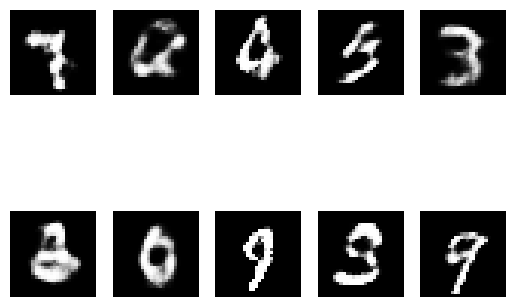

In [4]:
import matplotlib.pyplot as plt

# Sample random noise
random_latent_vectors = np.random.normal(size=(10, latent_dim))

# Decode them to fake images
generated_images = decoder.predict(random_latent_vectors)

# Rescale images 0 - 1
generated_images = 0.5 * generated_images + 0.5

# Plot the generated images
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(generated_images[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

plt.show()
